___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [3]:
df.head()

Rebound Signal Strength nHz  Rock Density kg/m3
0                    72.945124            2.456548
1                    14.229877            2.601719
2                    36.597334            1.967004
3                     9.578899            2.300439
4                    21.765897            2.452374

In [4]:
df.describe().transpose()

count       mean        std       min        25%  \
Rebound Signal Strength nHz  300.0  49.725766  28.341792  0.700227  25.685798   
Rock Density kg/m3           300.0   2.225063   0.314512  1.500000   1.987830   

                                   50%        75%        max  
Rebound Signal Strength nHz  50.602886  74.854294  98.831658  
Rock Density kg/m3            2.268597   2.476944   2.750000

In [5]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

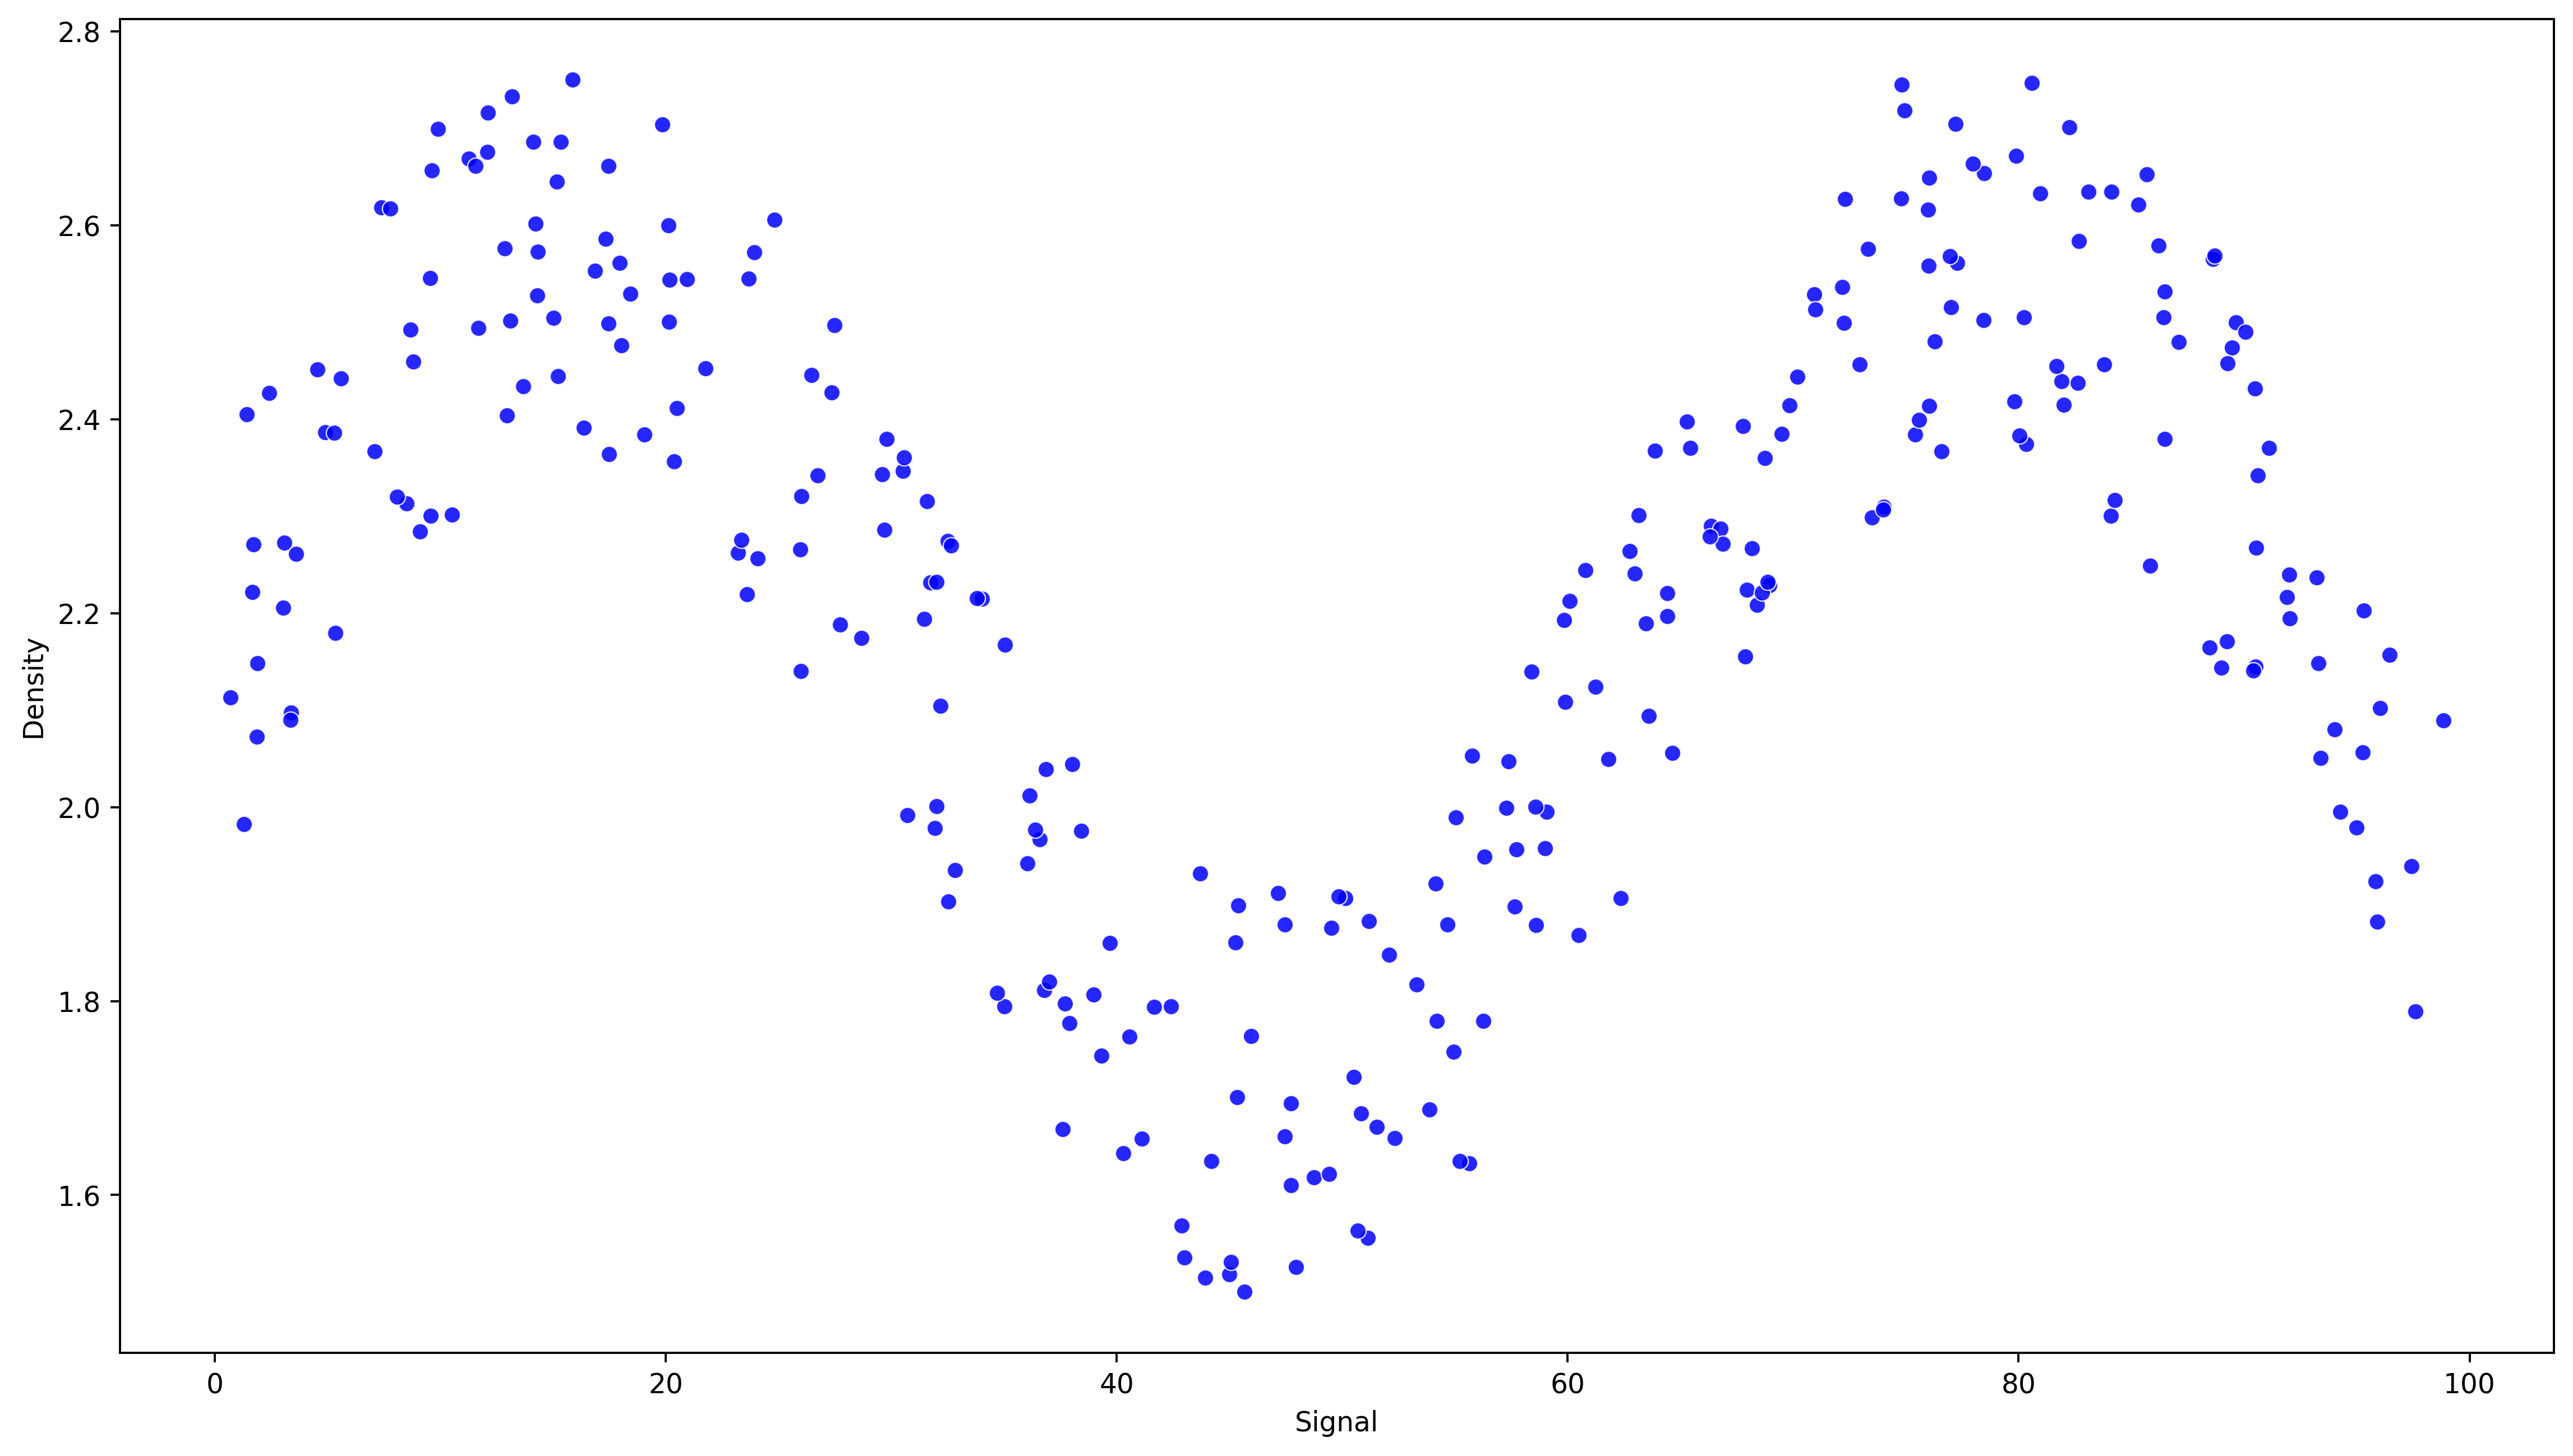

In [6]:
plt.figure(figsize=(16,9),dpi=350)
sns.scatterplot(x='Signal',y='Density',data=df,color='blue',alpha=0.85)

---
---

## Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [7]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

-----

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
lr_preds = lr_model.predict(X_test)

In [14]:
lr_preds

array([2.23359595, 2.18852203, 2.21007915, 2.22537131, 2.26700463,
       2.28390863, 2.19984275, 2.19114142, 2.27546684, 2.19260034,
       2.28747491, 2.25959801, 2.21301834, 2.25829662, 2.19272076,
       2.20778099, 2.22687024, 2.24276501, 2.24784166, 2.18948631,
       2.25311564, 2.1873493 , 2.19407969, 2.22181865, 2.21021147,
       2.2169971 , 2.18479482, 2.20145804, 2.18959358, 2.20857754,
       2.24046039, 2.20891008, 2.28113834, 2.22967592, 2.24044781,
       2.27123275, 2.25173935, 2.27925346, 2.26737628, 2.19204855,
       2.25799212, 2.29160359, 2.21795893, 2.21907591, 2.22693046,
       2.27035245, 2.2061273 , 2.2533859 , 2.28580531, 2.18499916,
       2.22665656, 2.24340818, 2.23619779, 2.2594298 , 2.19282679,
       2.25257543, 2.23658808, 2.24349514, 2.27119779, 2.27438607,
       2.20885956, 2.25142925, 2.29032218, 2.22980202, 2.21713391,
       2.19851077, 2.19808994, 2.26419764, 2.24241039, 2.2443909 ,
       2.19497475, 2.20256938, 2.25498687, 2.23086225, 2.24844

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mean_absolute_error(y_test,lr_preds)

0.2791432507004504

In [17]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.33675462001149936

<AxesSubplot:xlabel='Signal', ylabel='Density'>

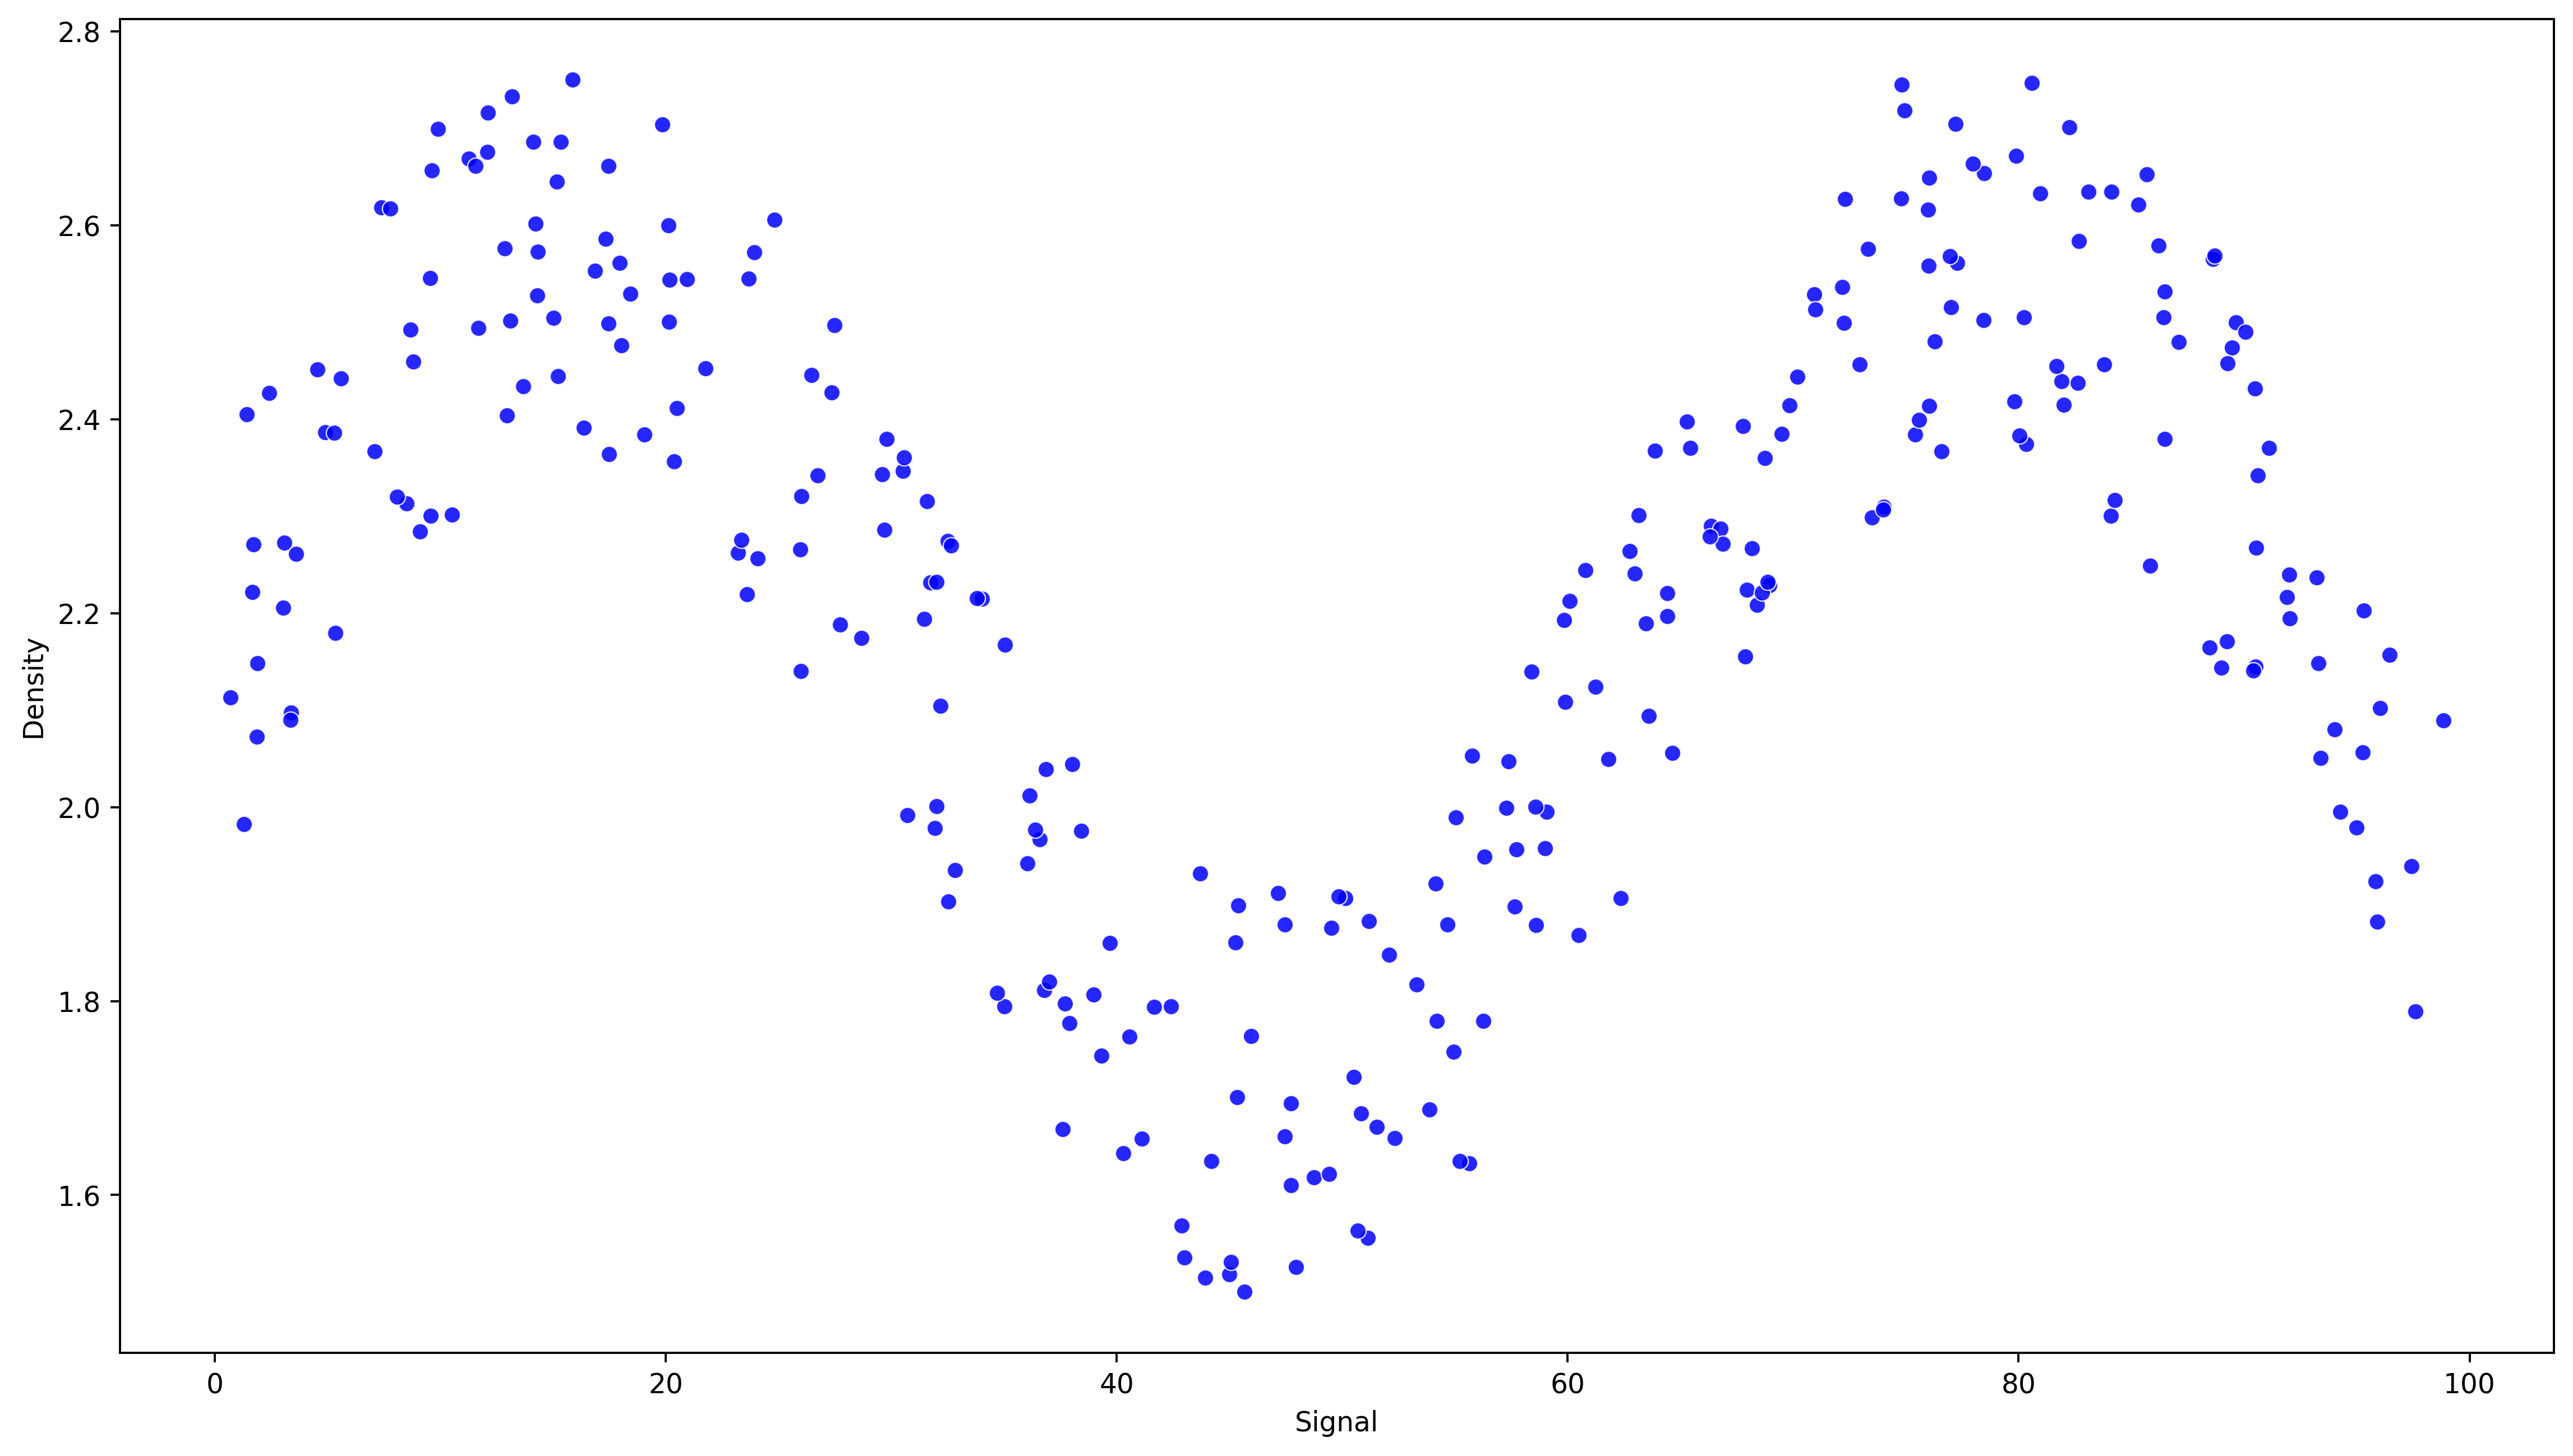

In [18]:
plt.figure(figsize=(16,9),dpi=350)
sns.scatterplot(x='Signal',y='Density',data=df,color='blue',alpha=0.85)

What does the fit look like?

In [19]:
signal_range = np.arange(0,100)

In [20]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

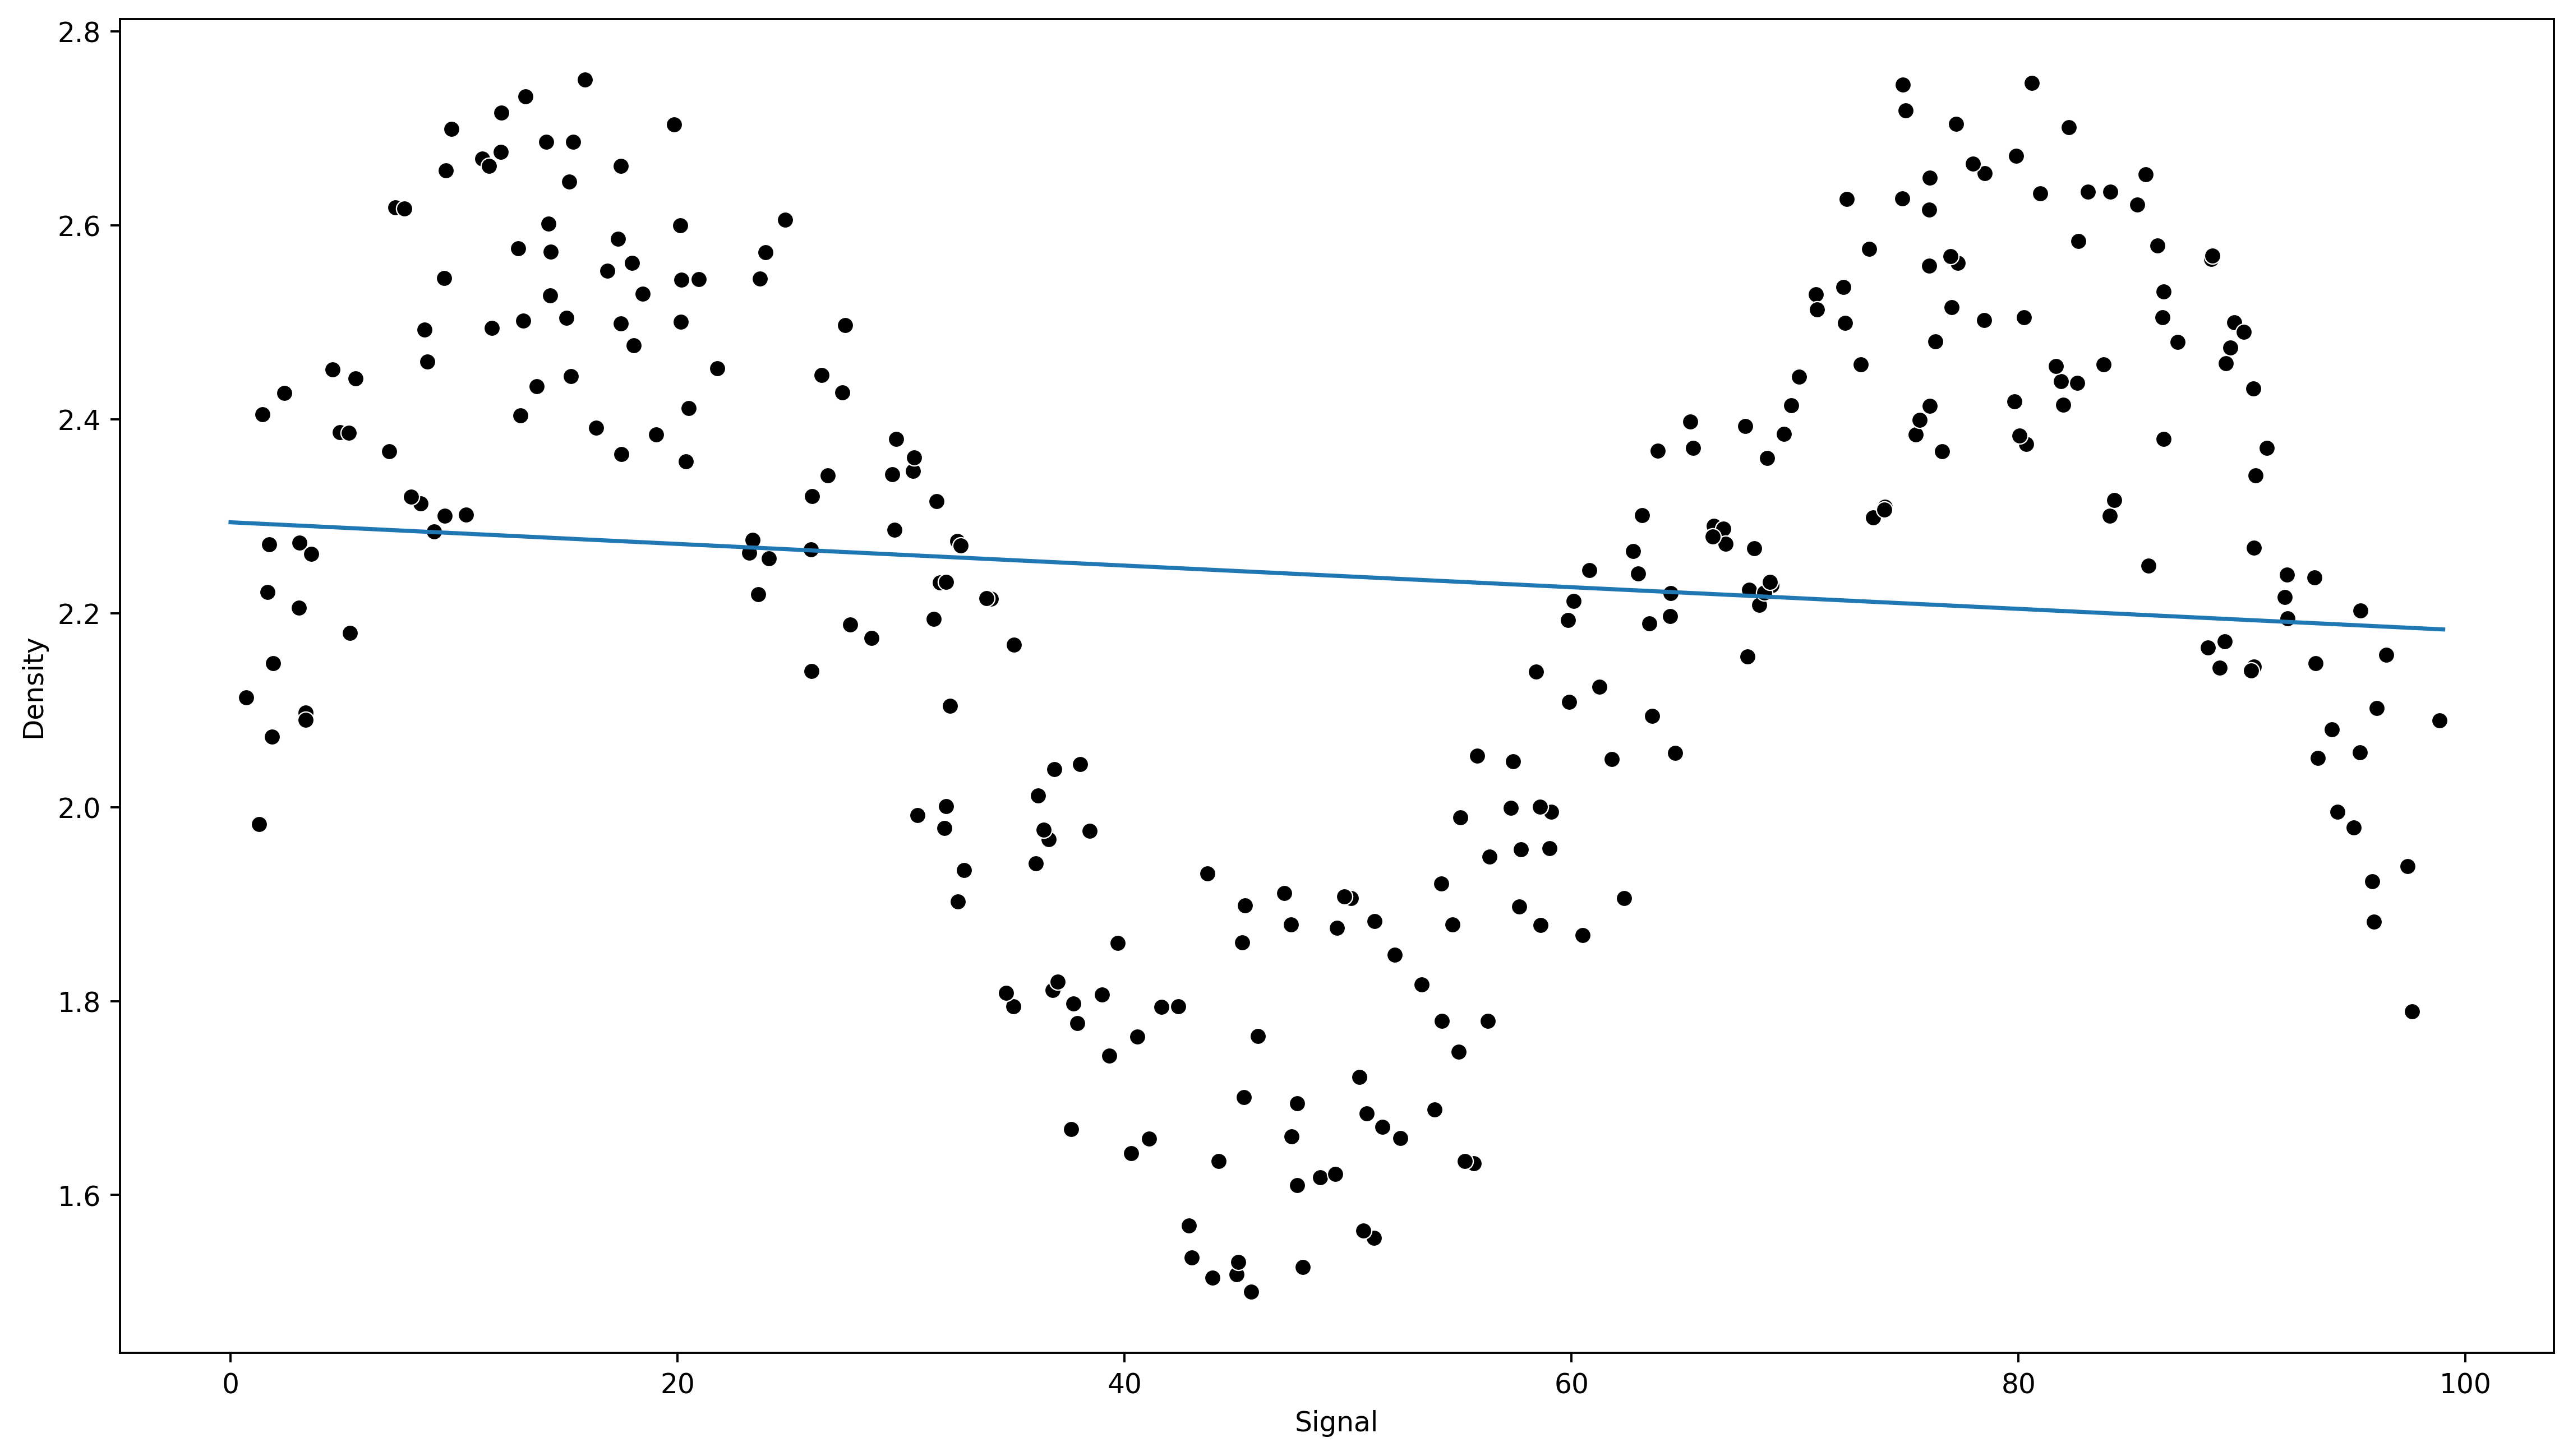

In [21]:
plt.figure(figsize=(16,9),dpi=350)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output)

---

# Polynomial Regression

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

## Function to Help Run Models

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE : {rmse}\n')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,6),dpi=250)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output,color='red')

In [24]:
model=LinearRegression()
# run_model(model,X_train,y_train,X_test,y_test)

## Pipeline for Poly Orders

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pipe = make_pipeline(PolynomialFeatures(5),LinearRegression())

MAE: 0.11730414881751597
RMSE : 0.13976216941006733



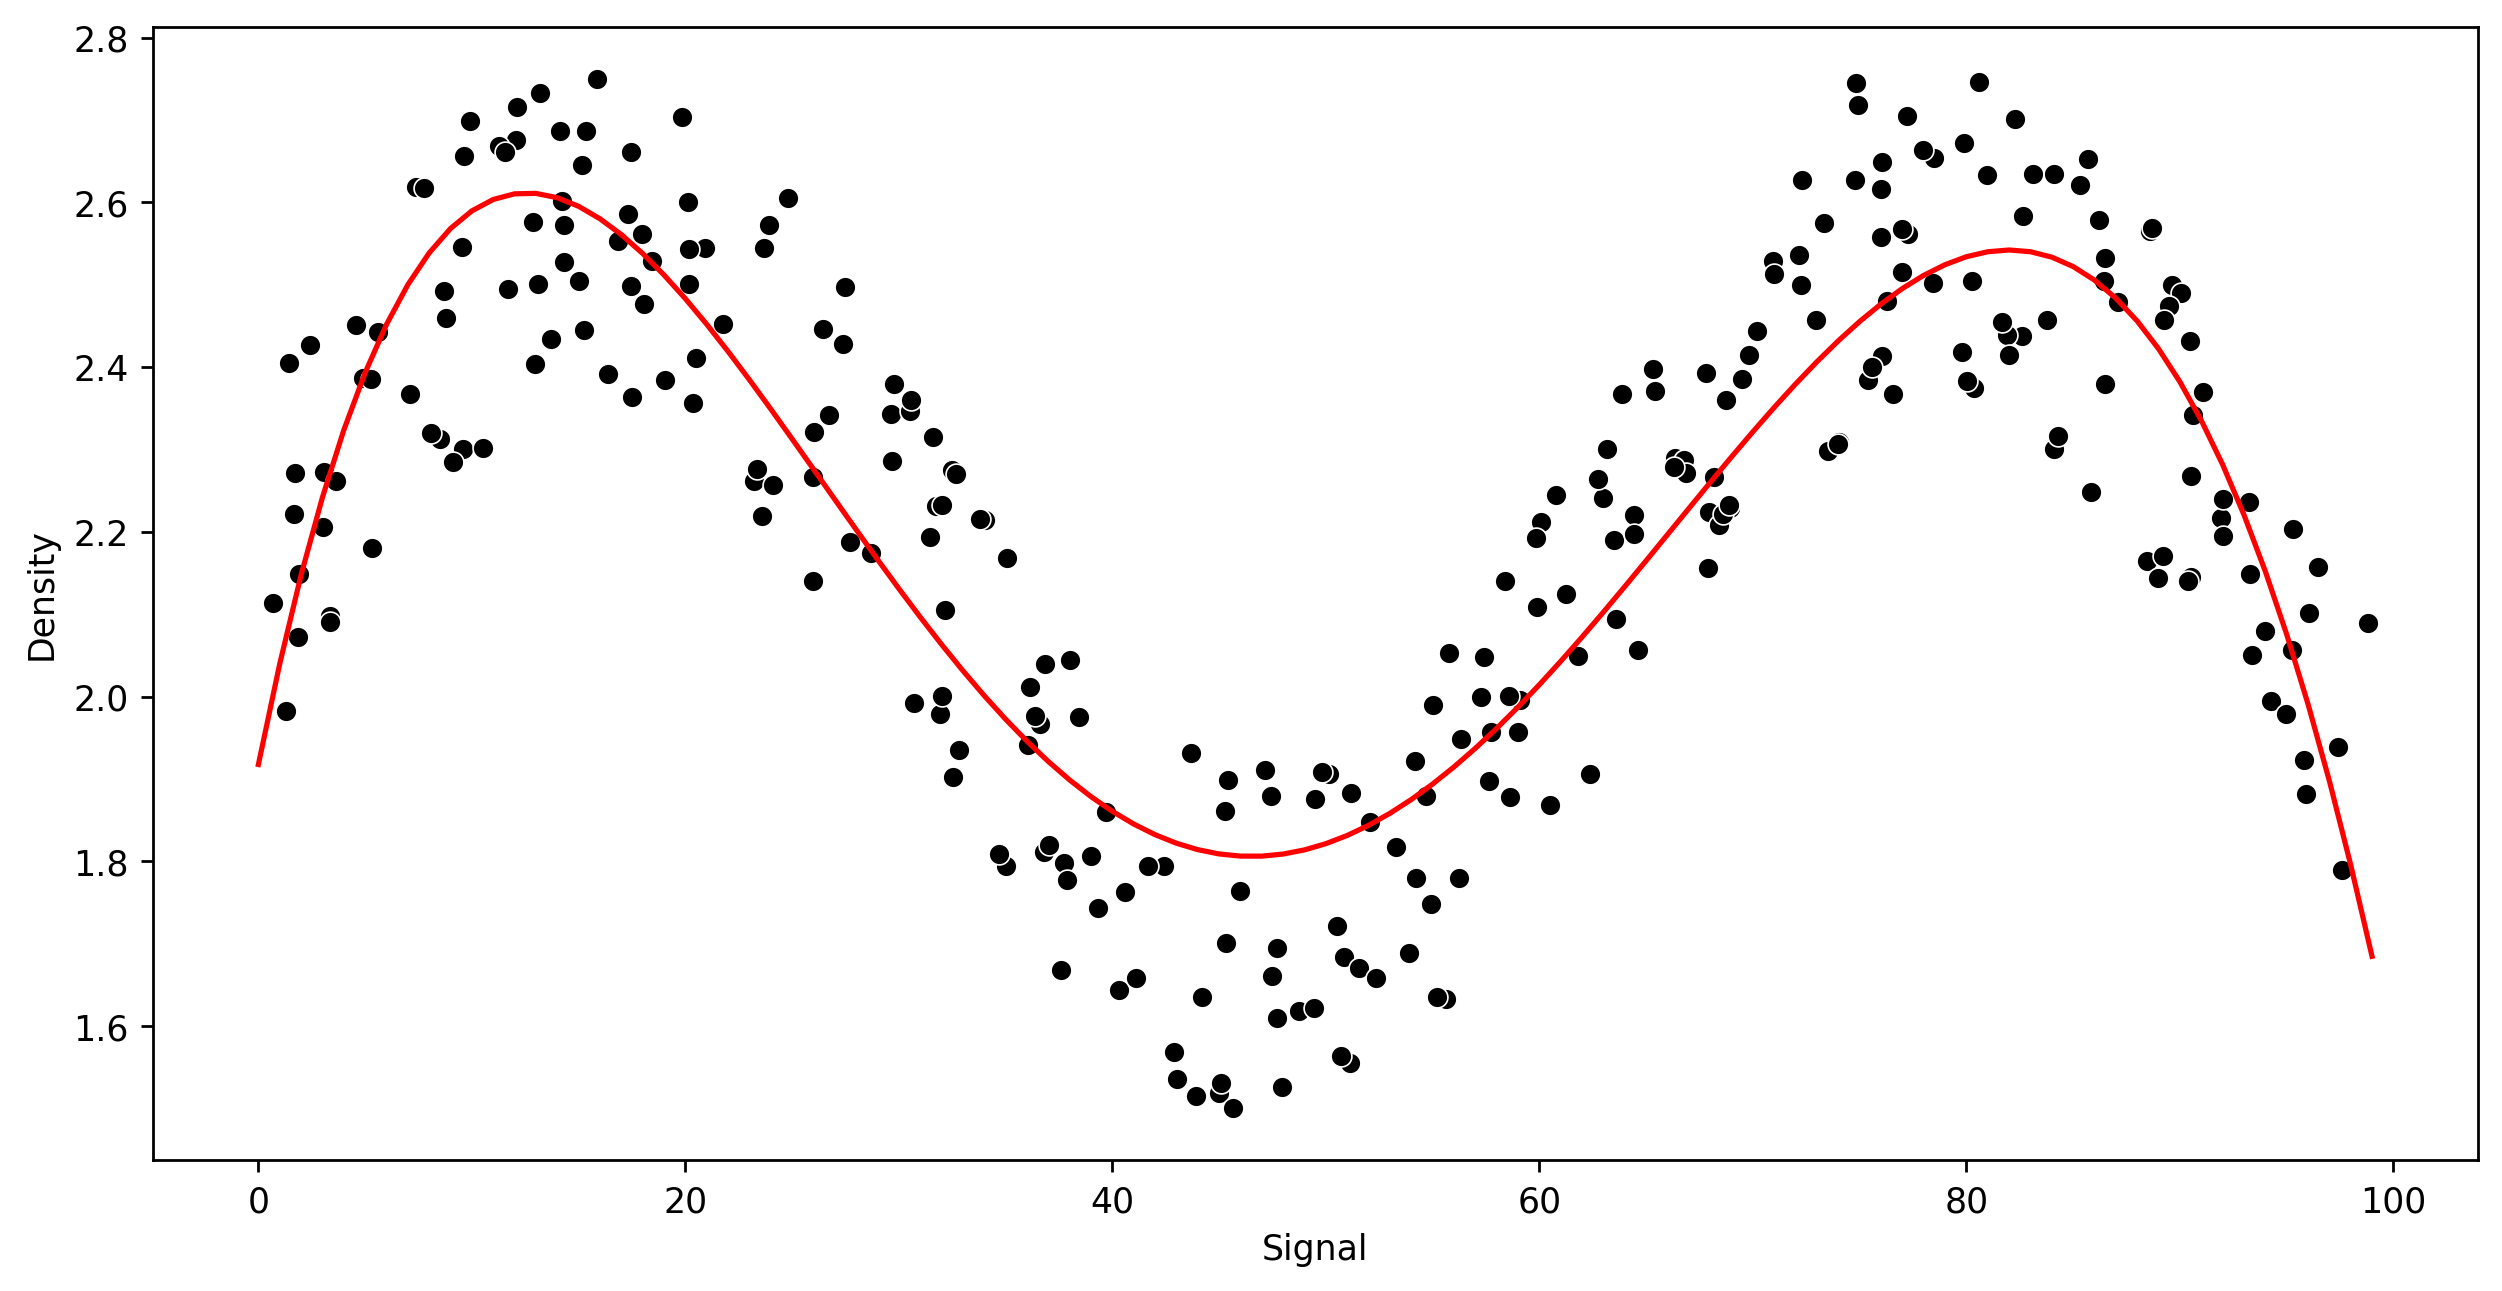

In [27]:
run_model(pipe,X_train,y_train,X_test,y_test)

## Comparing Various Polynomial Orders

MAE: 0.11191292873588503
RMSE : 0.13265853205697828



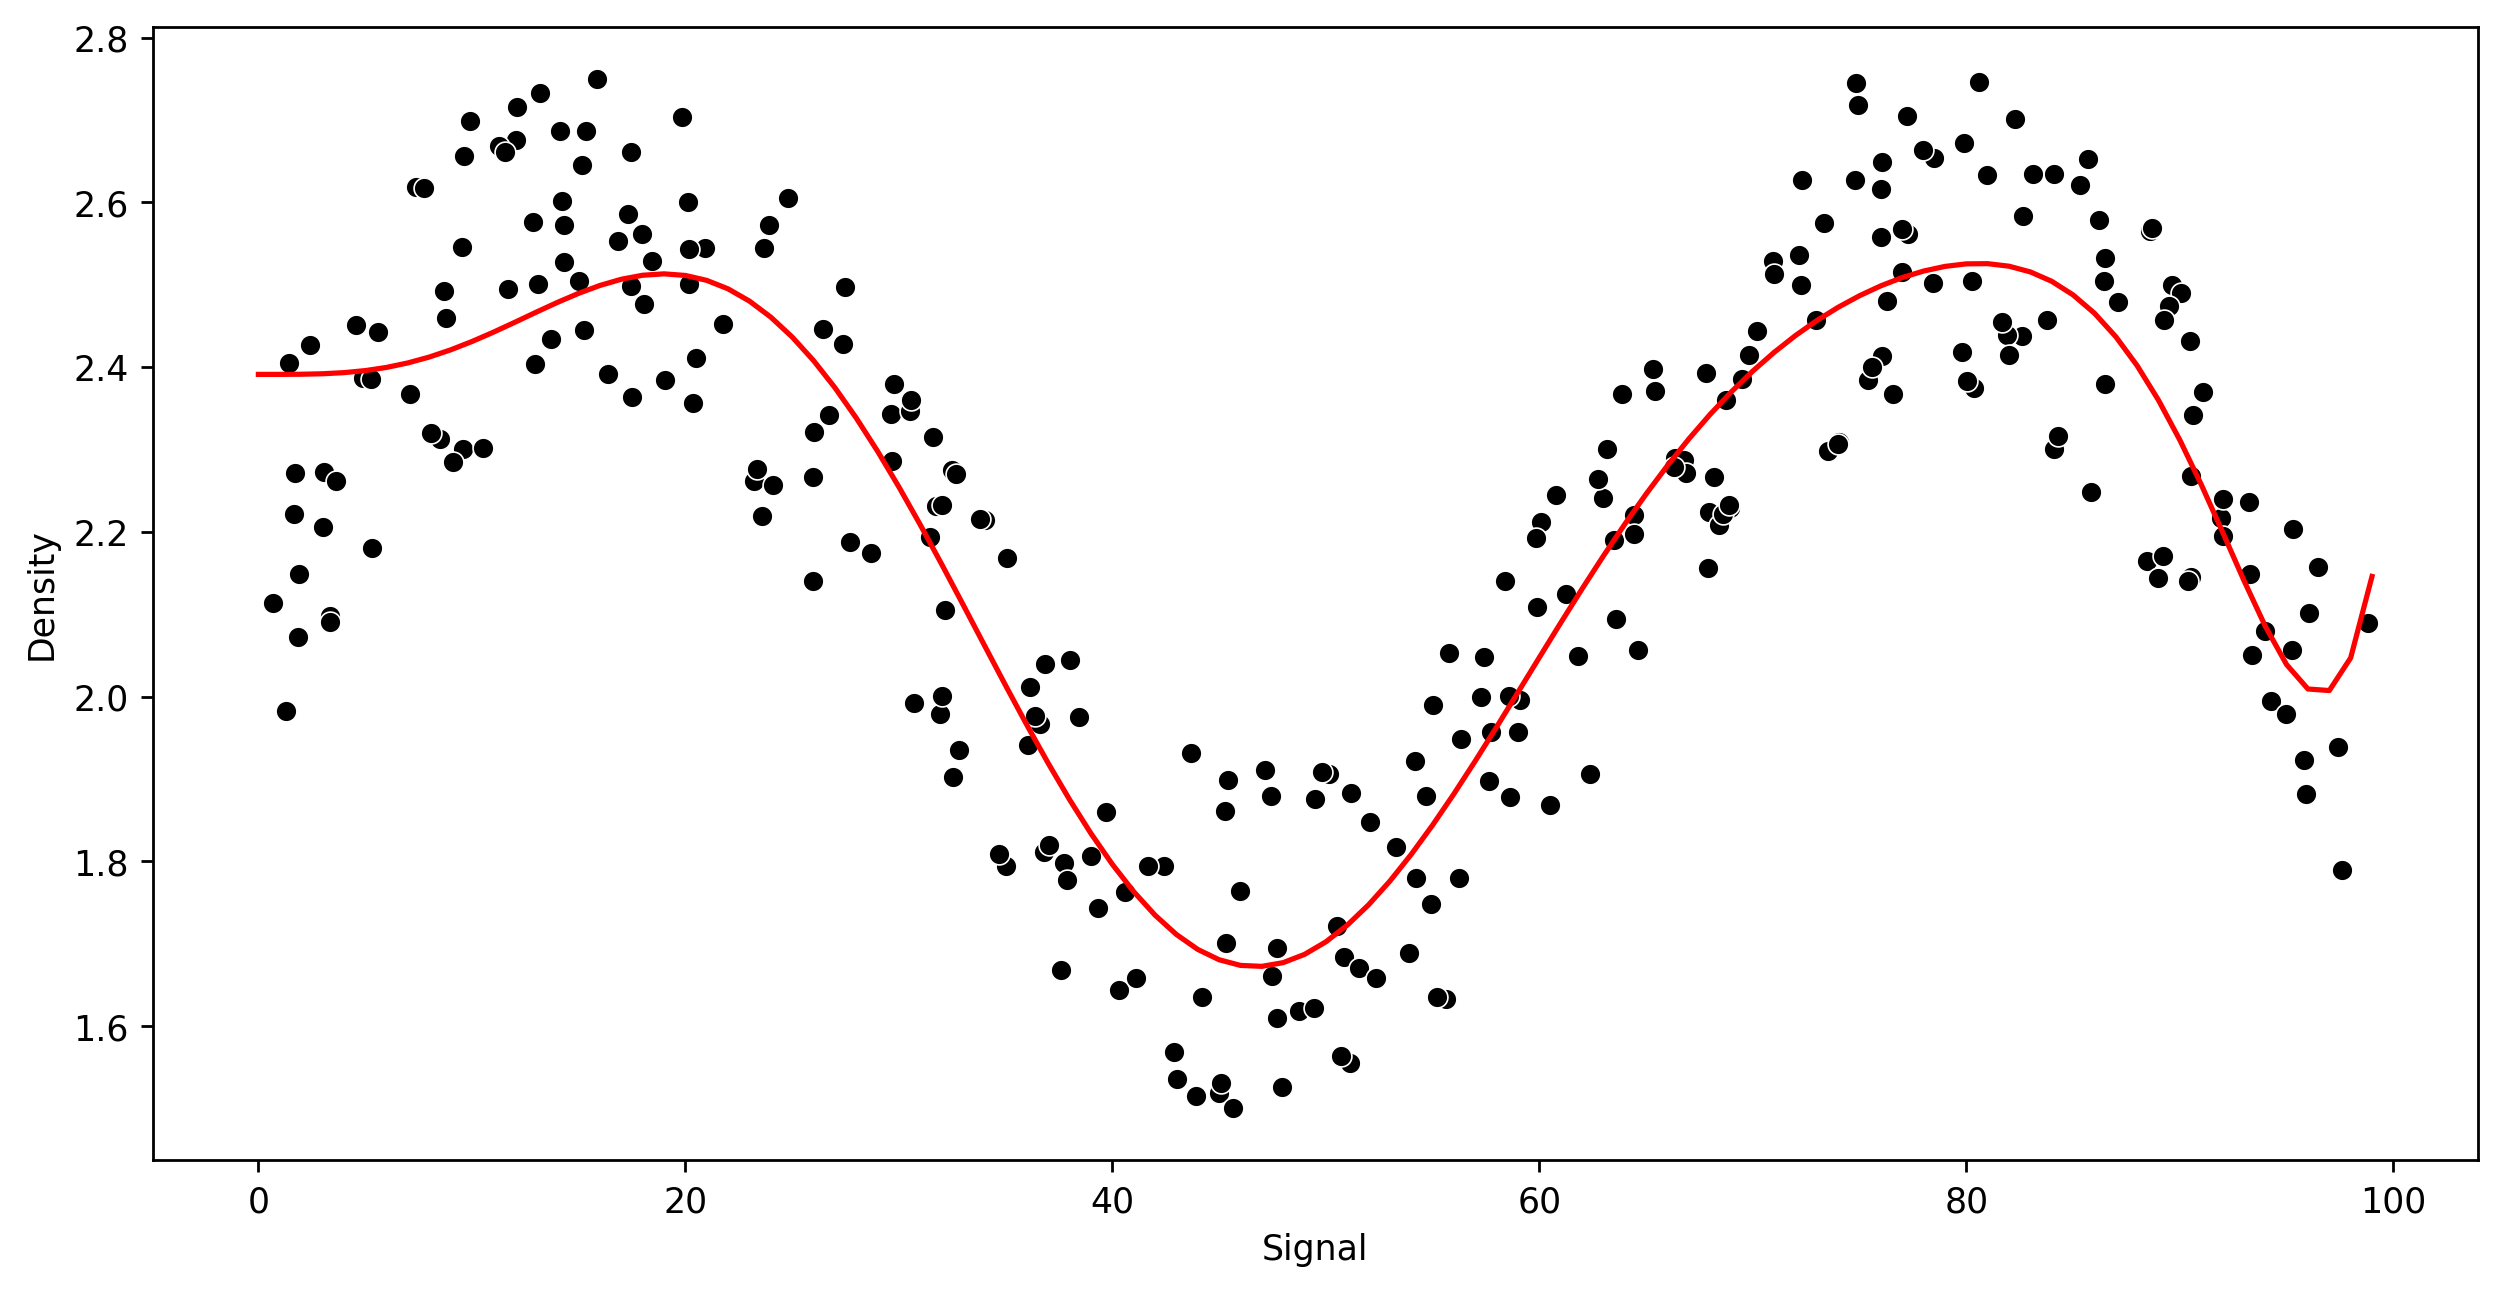

In [28]:
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

----

## KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

K value: 1
MAE: 0.15424063948855013
RMSE : 0.1911640267223586

K value: 2
MAE: 0.12951832499185334
RMSE : 0.15610379081511533

K value: 3
MAE: 0.12947801179329232
RMSE : 0.15479269374504107

K value: 5
MAE: 0.12199389996167243
RMSE : 0.14696736171792615

K value: 7
MAE: 0.1189022237251697
RMSE : 0.13936478525209944

K value: 10
MAE: 0.1182765765553767
RMSE : 0.13770623599194007

K value: 15
MAE: 0.11638118238641741
RMSE : 0.13766799159384238

K value: 20
MAE: 0.12089758301068933
RMSE : 0.144006282239078

K value: 25
MAE: 0.12902449725108237
RMSE : 0.15237023363330437



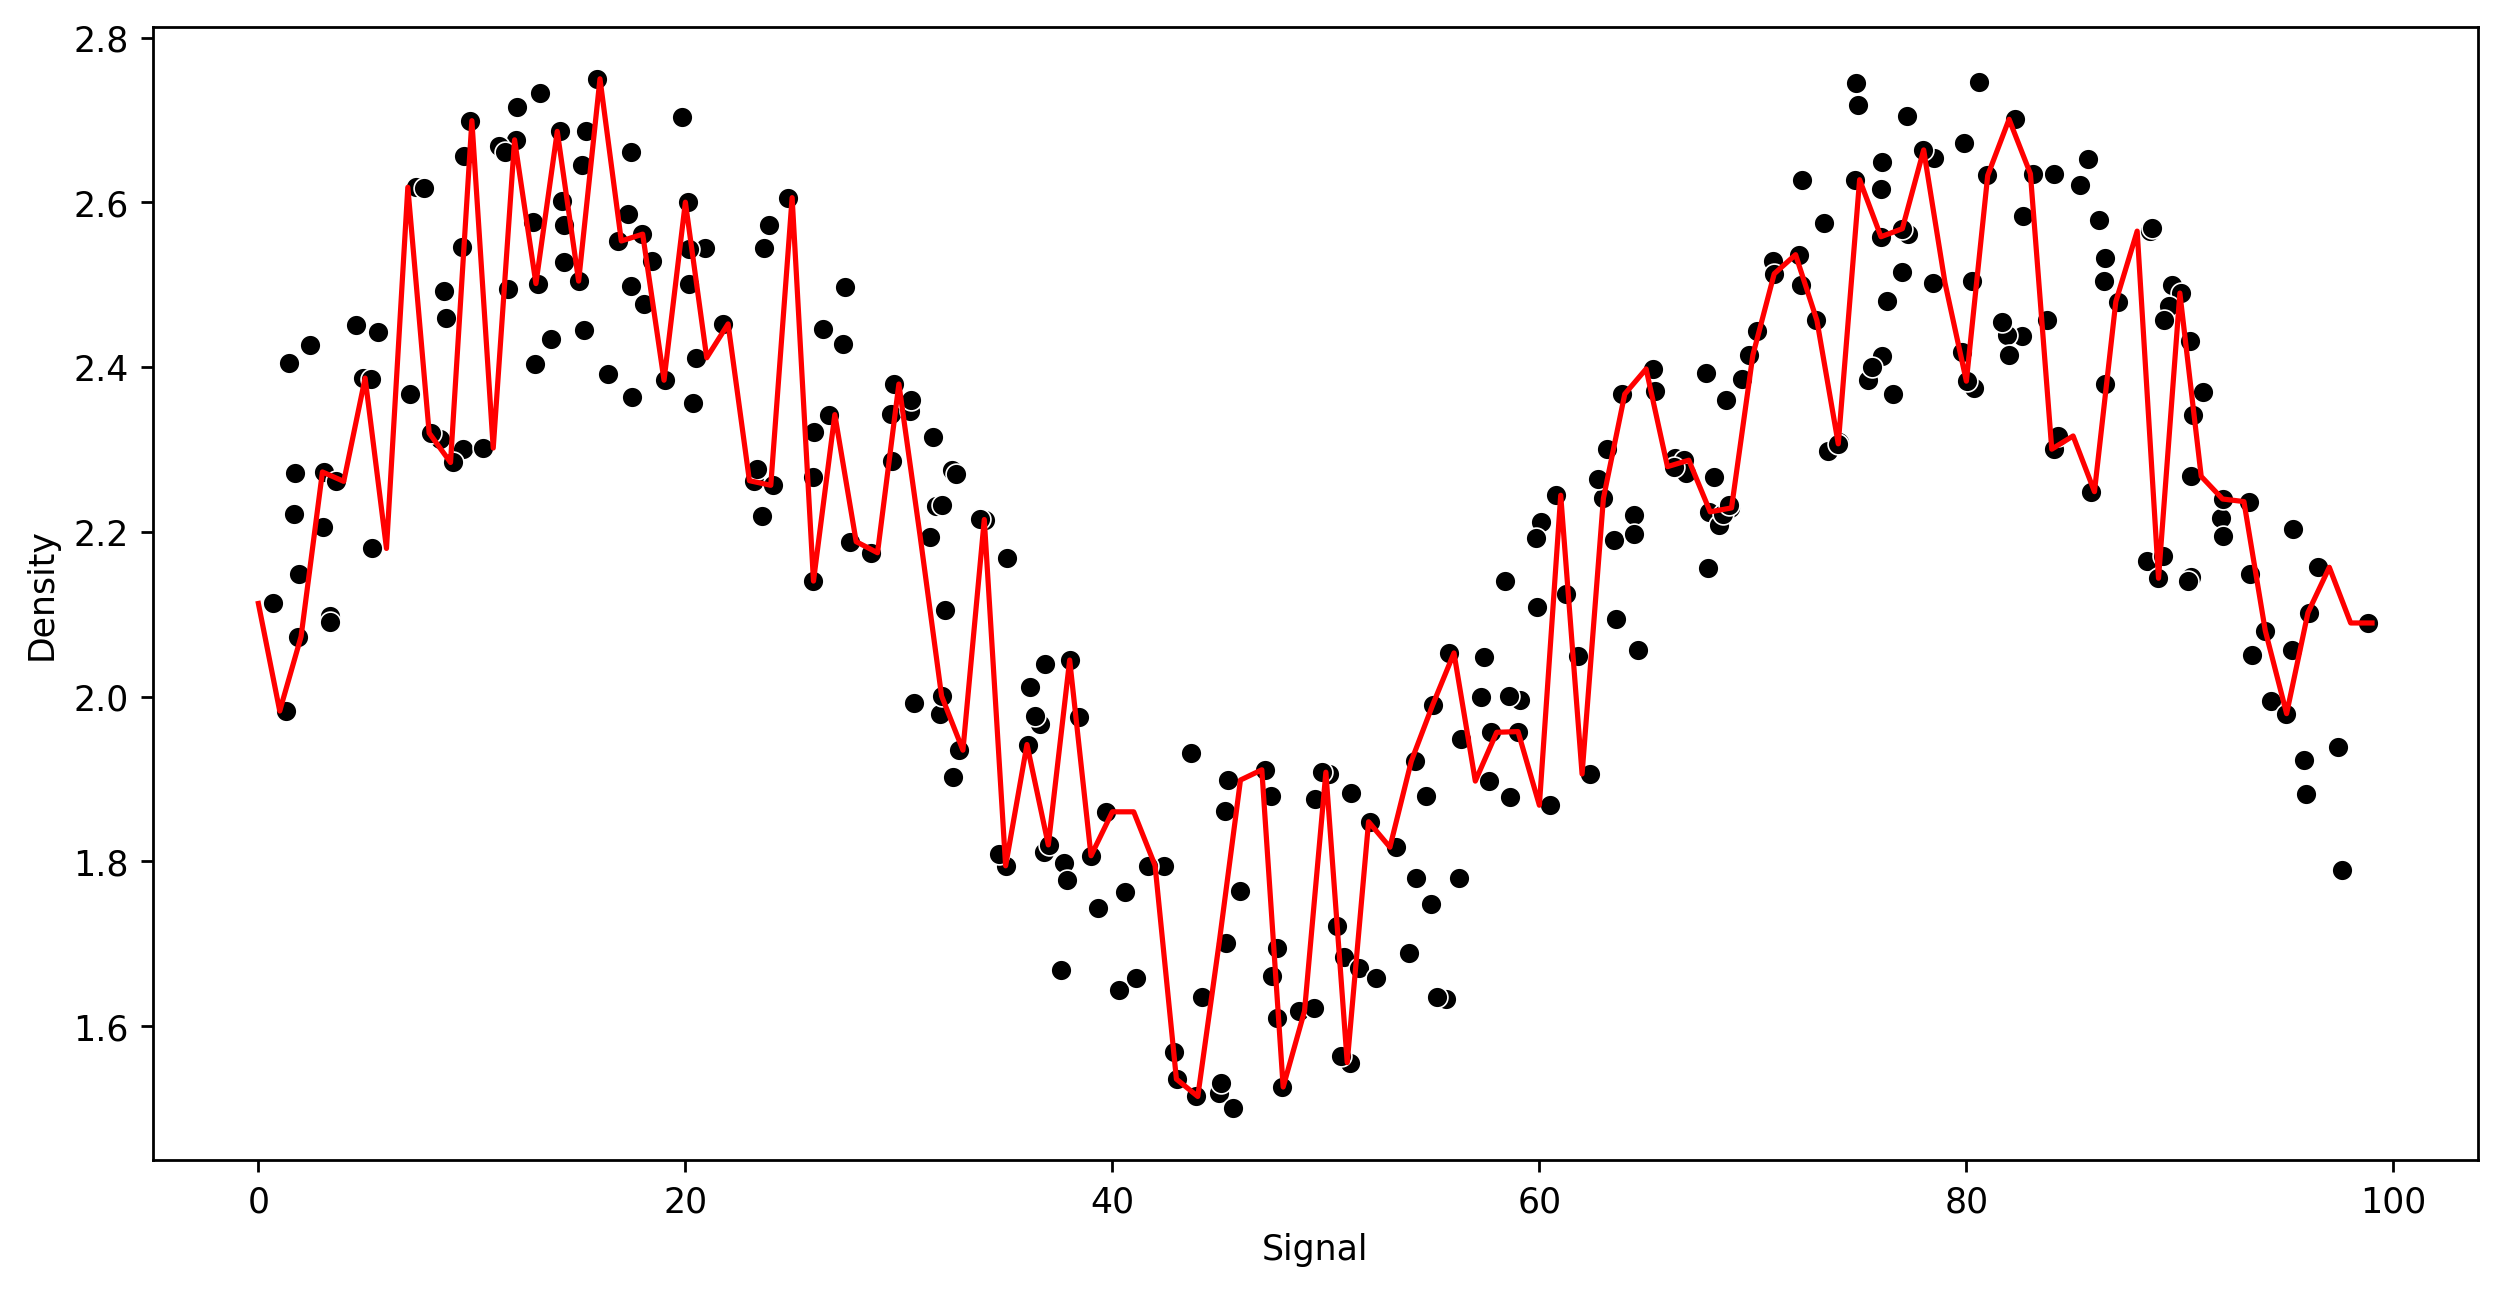

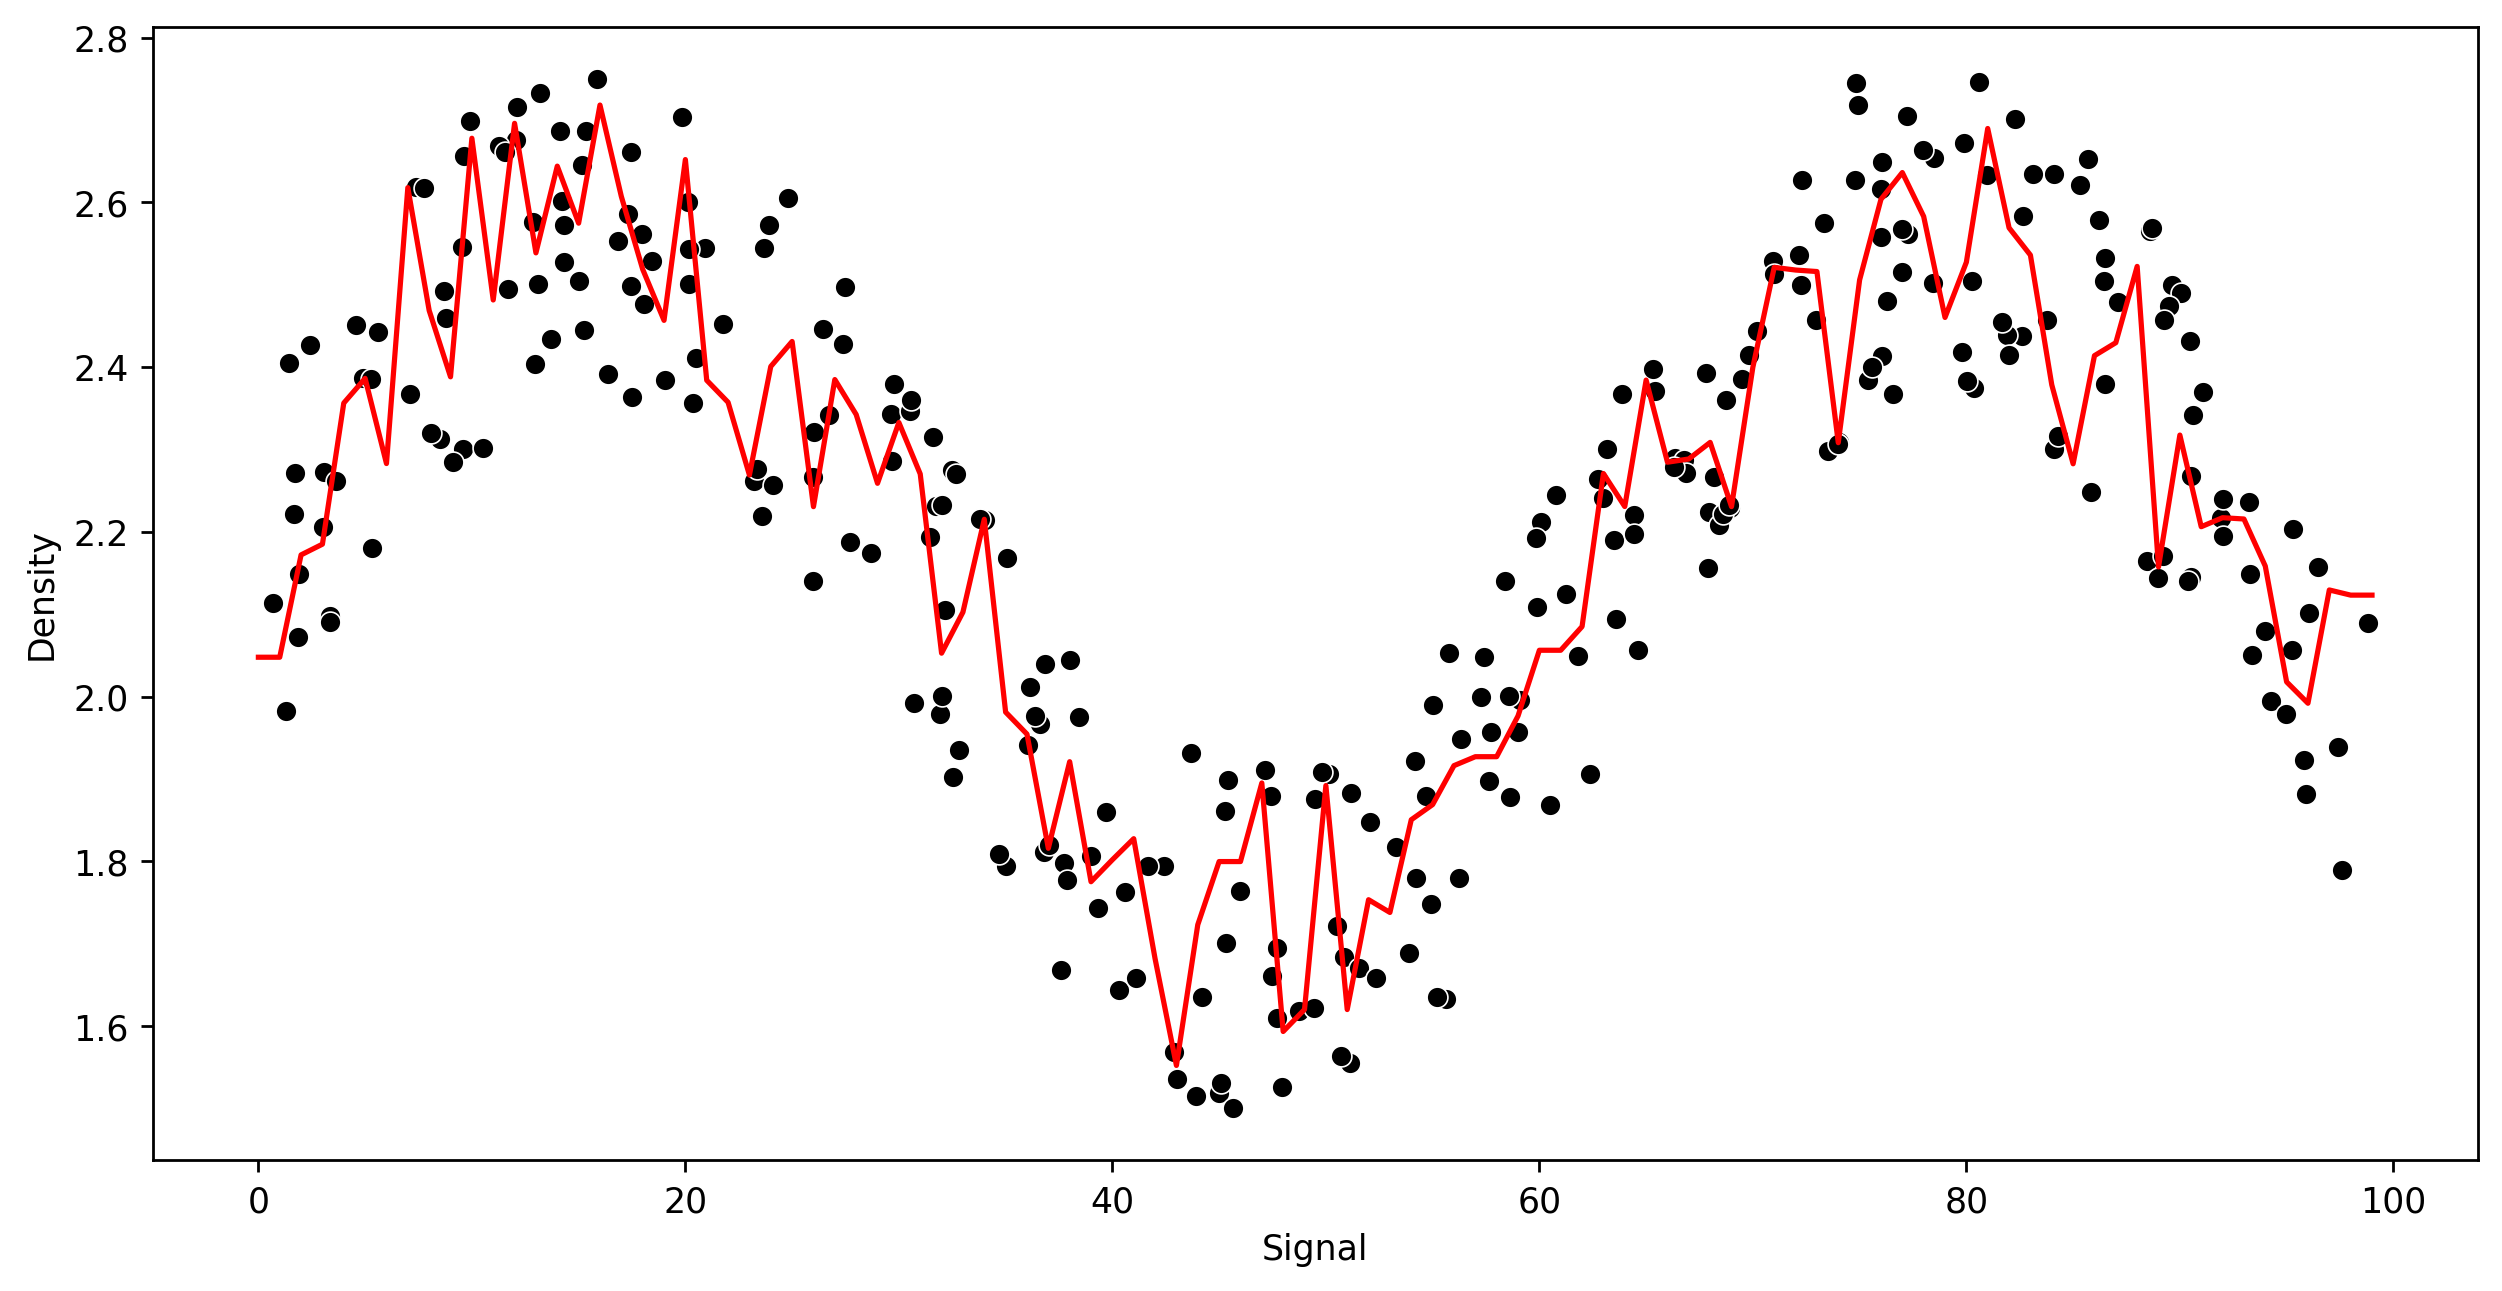

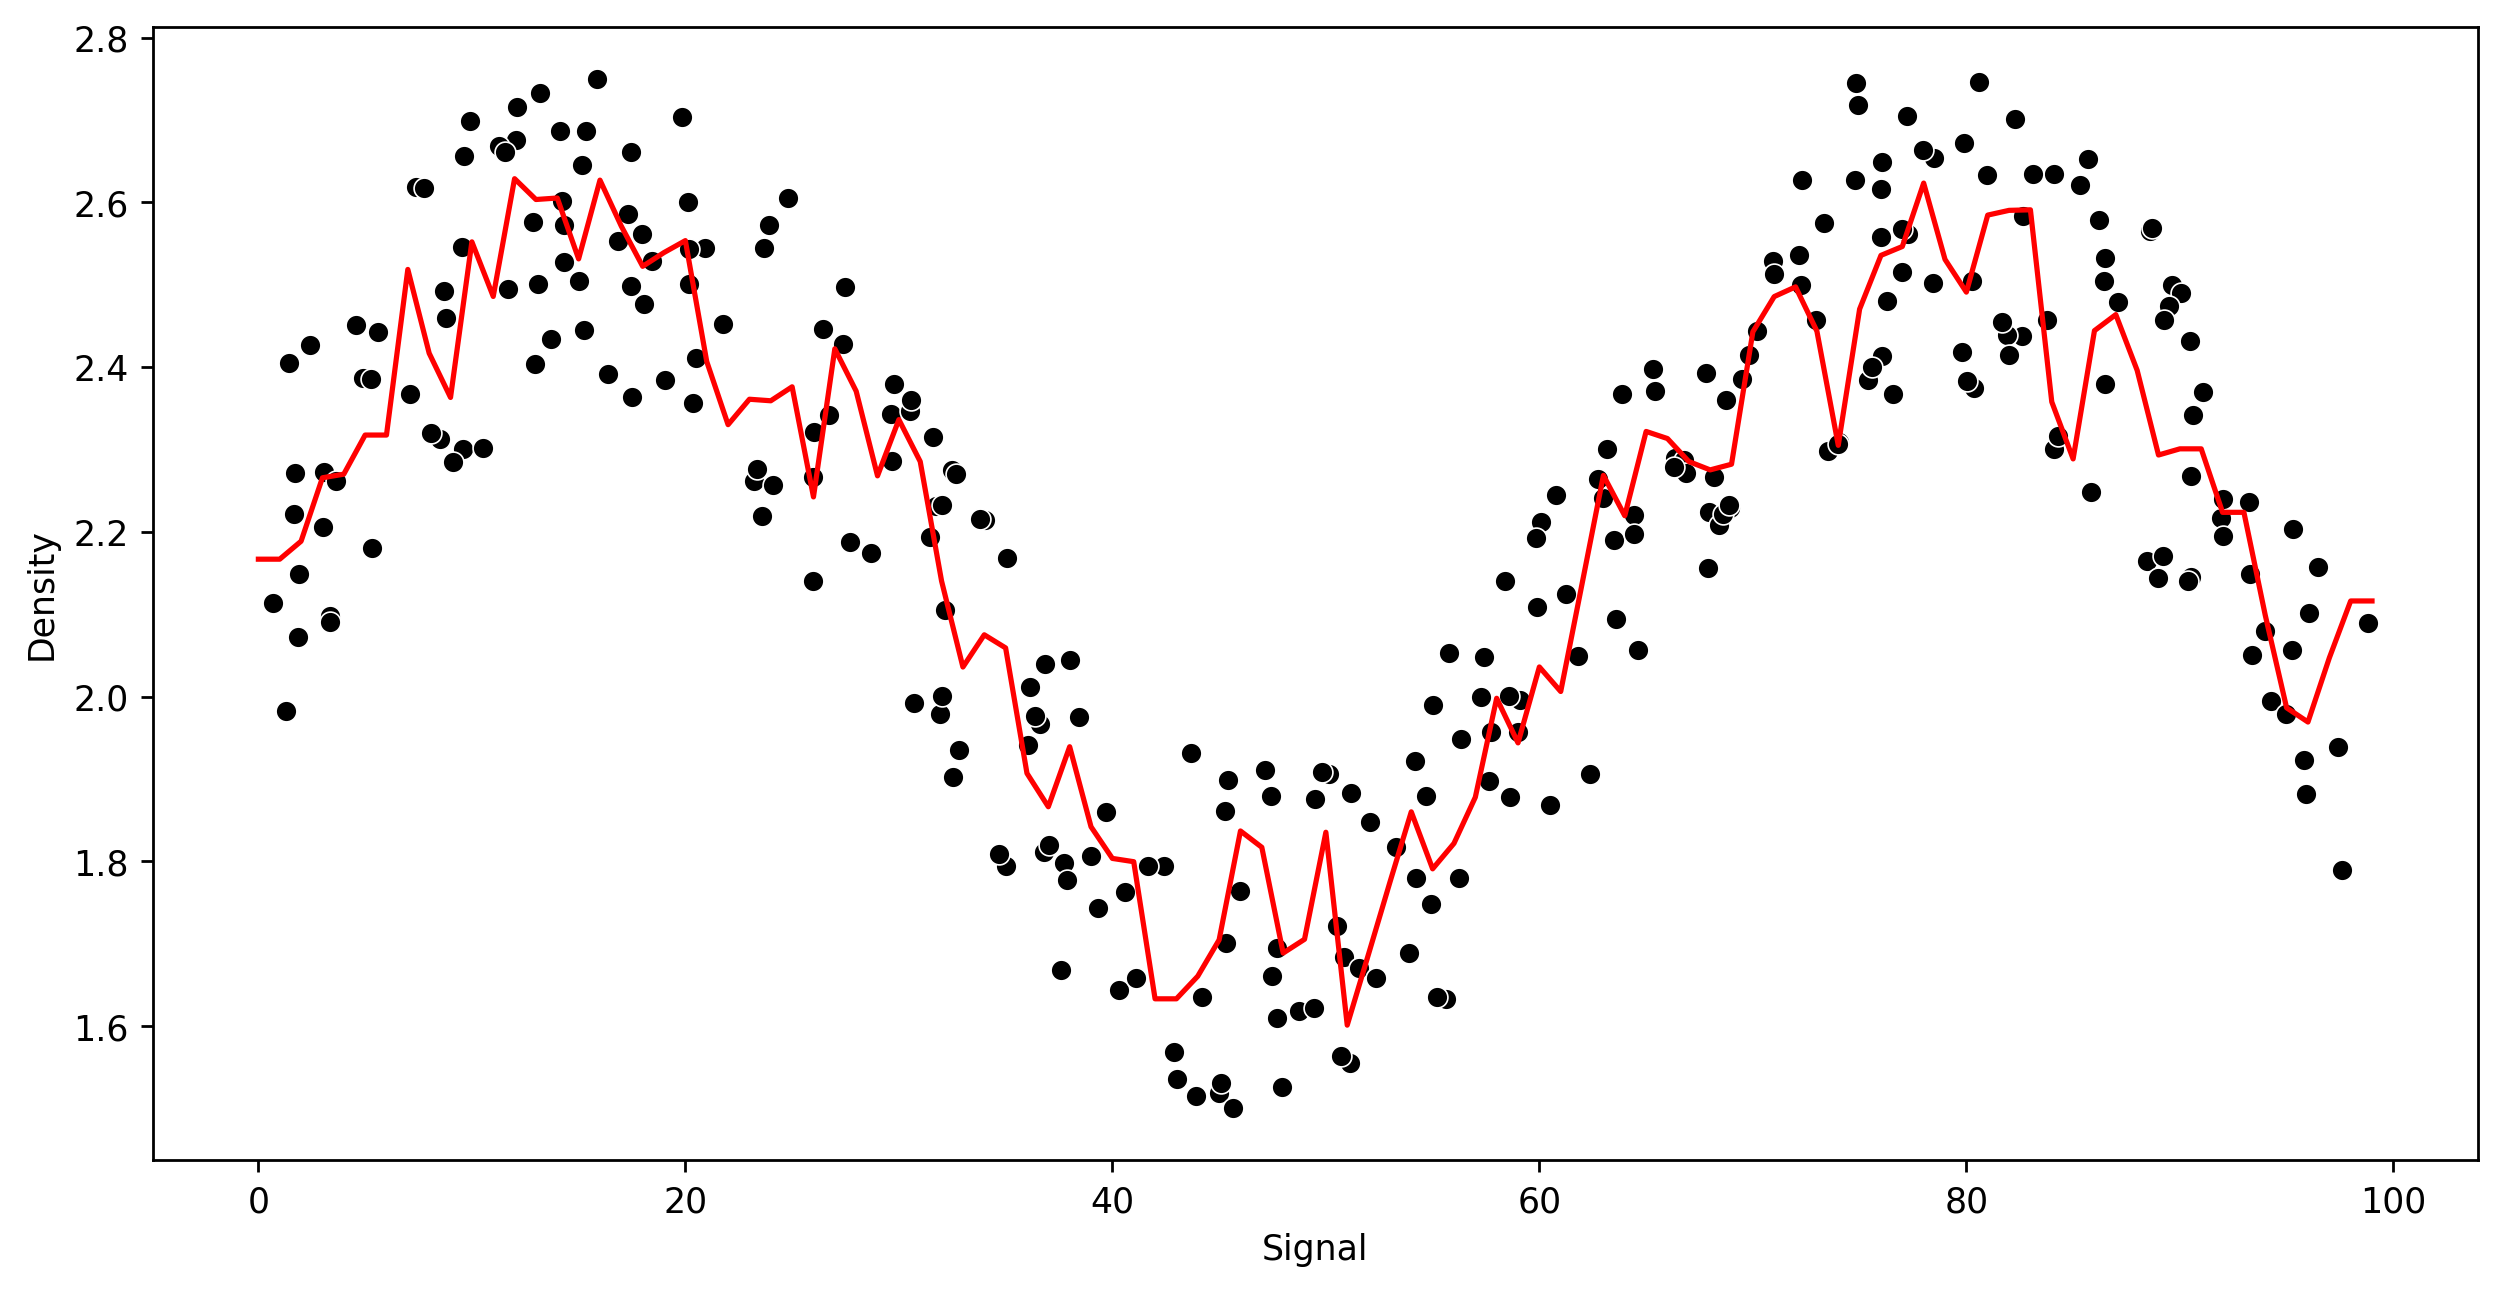

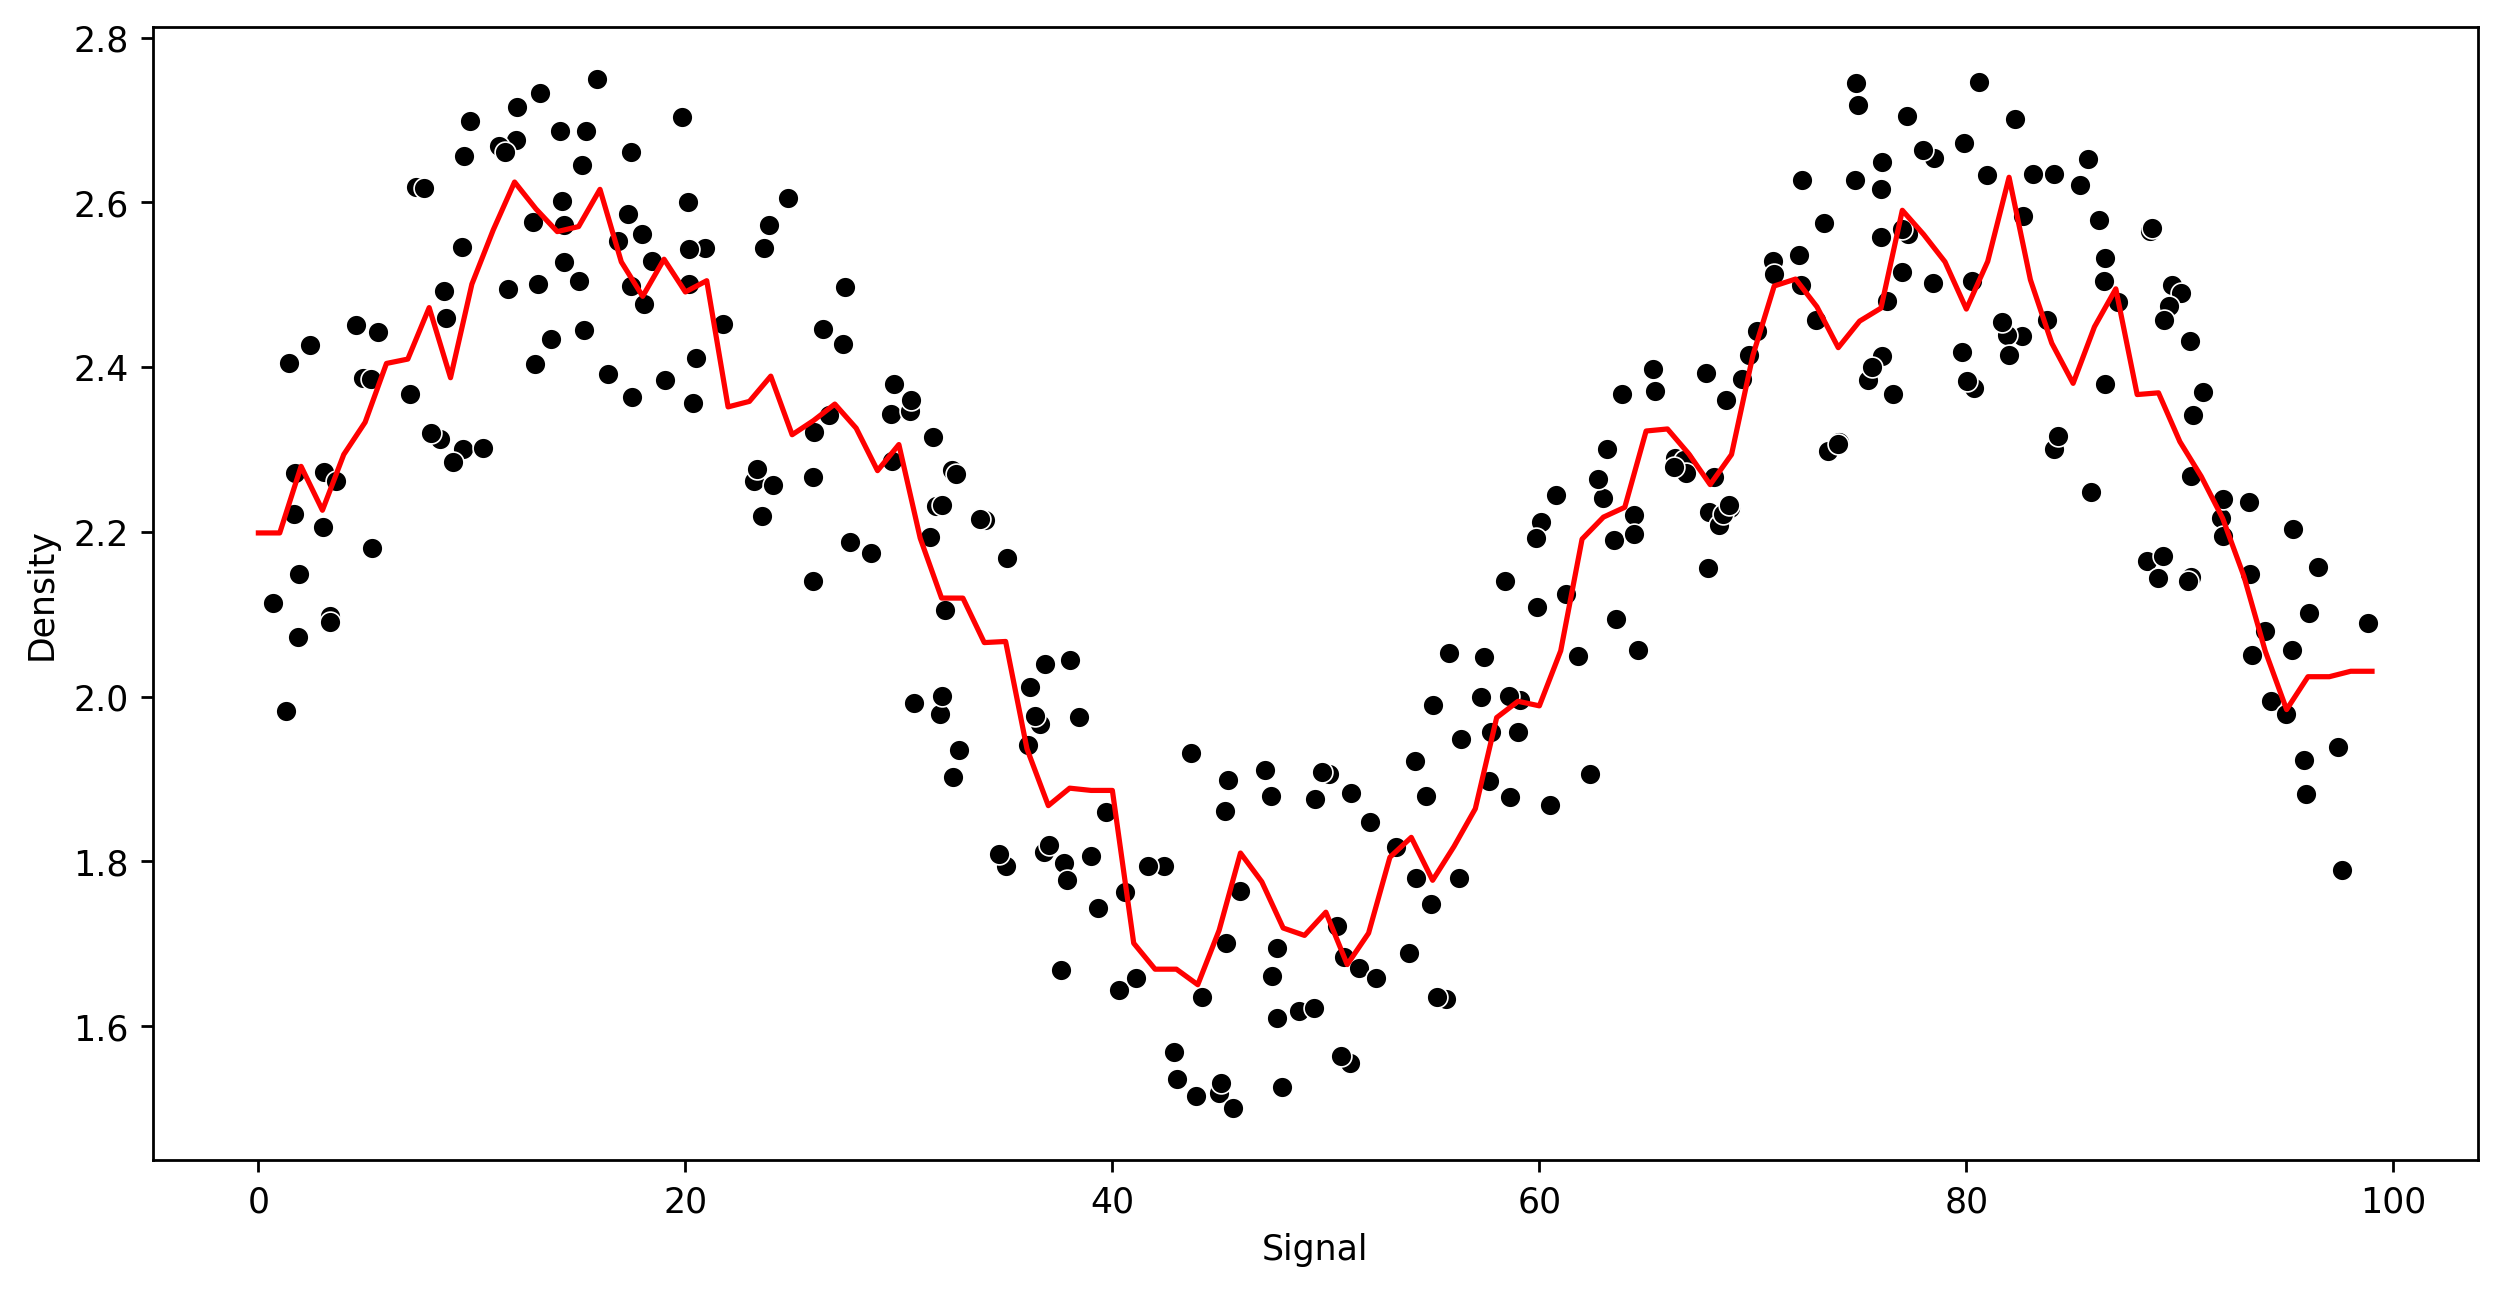

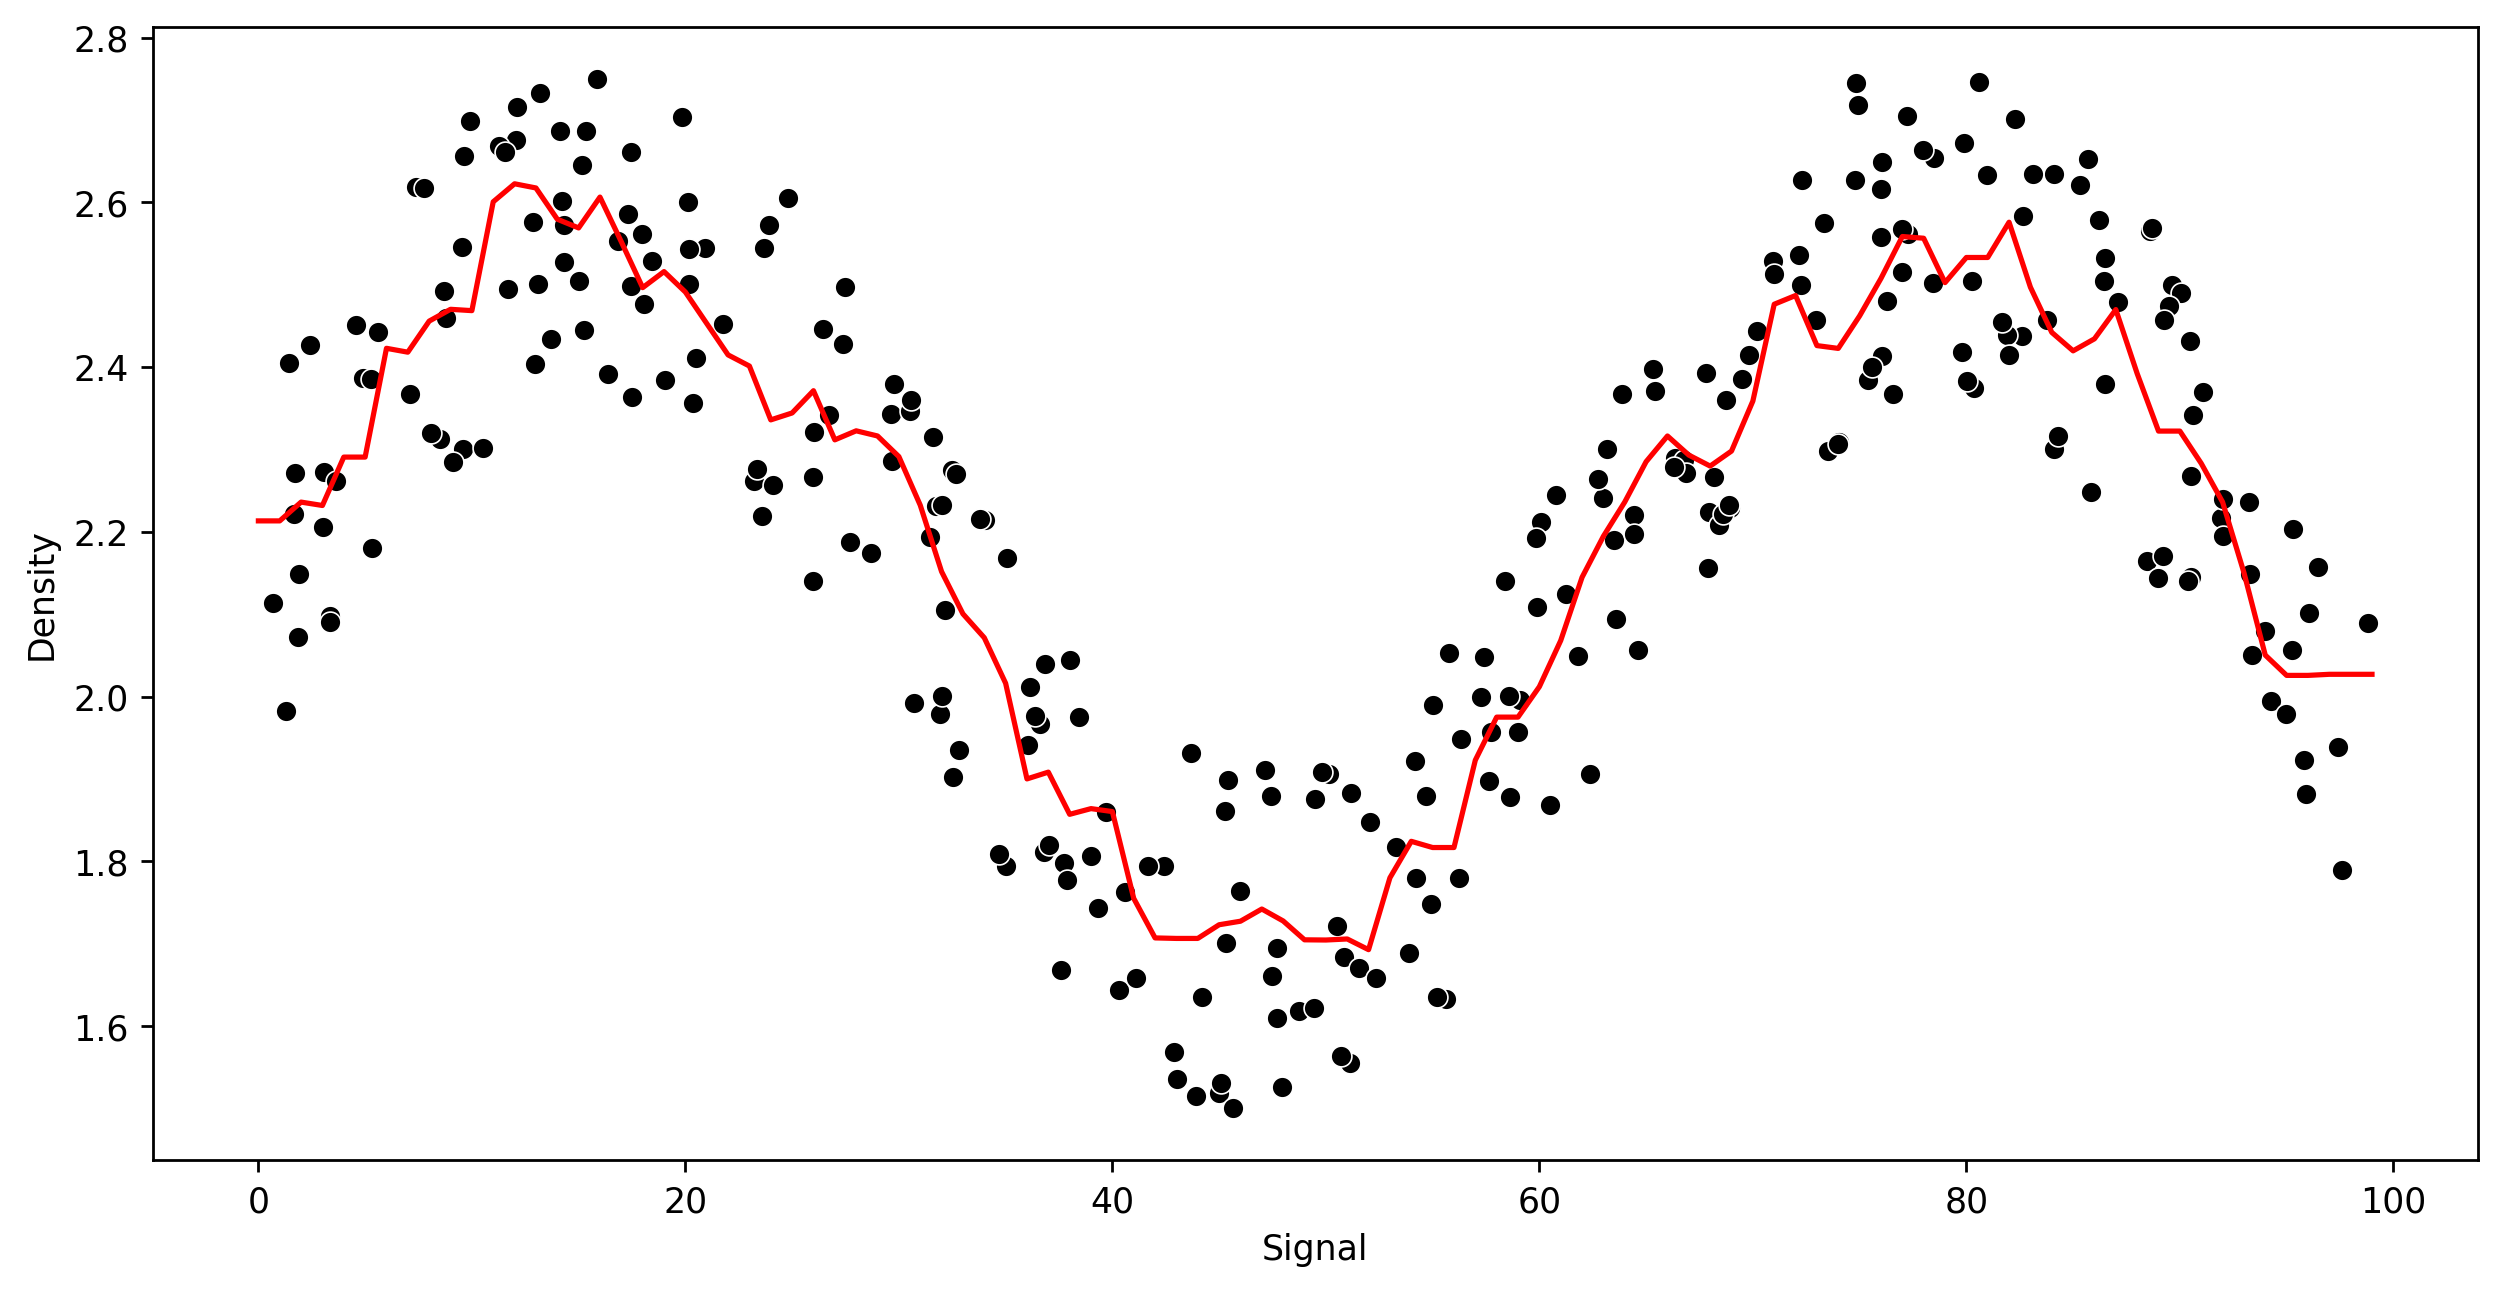

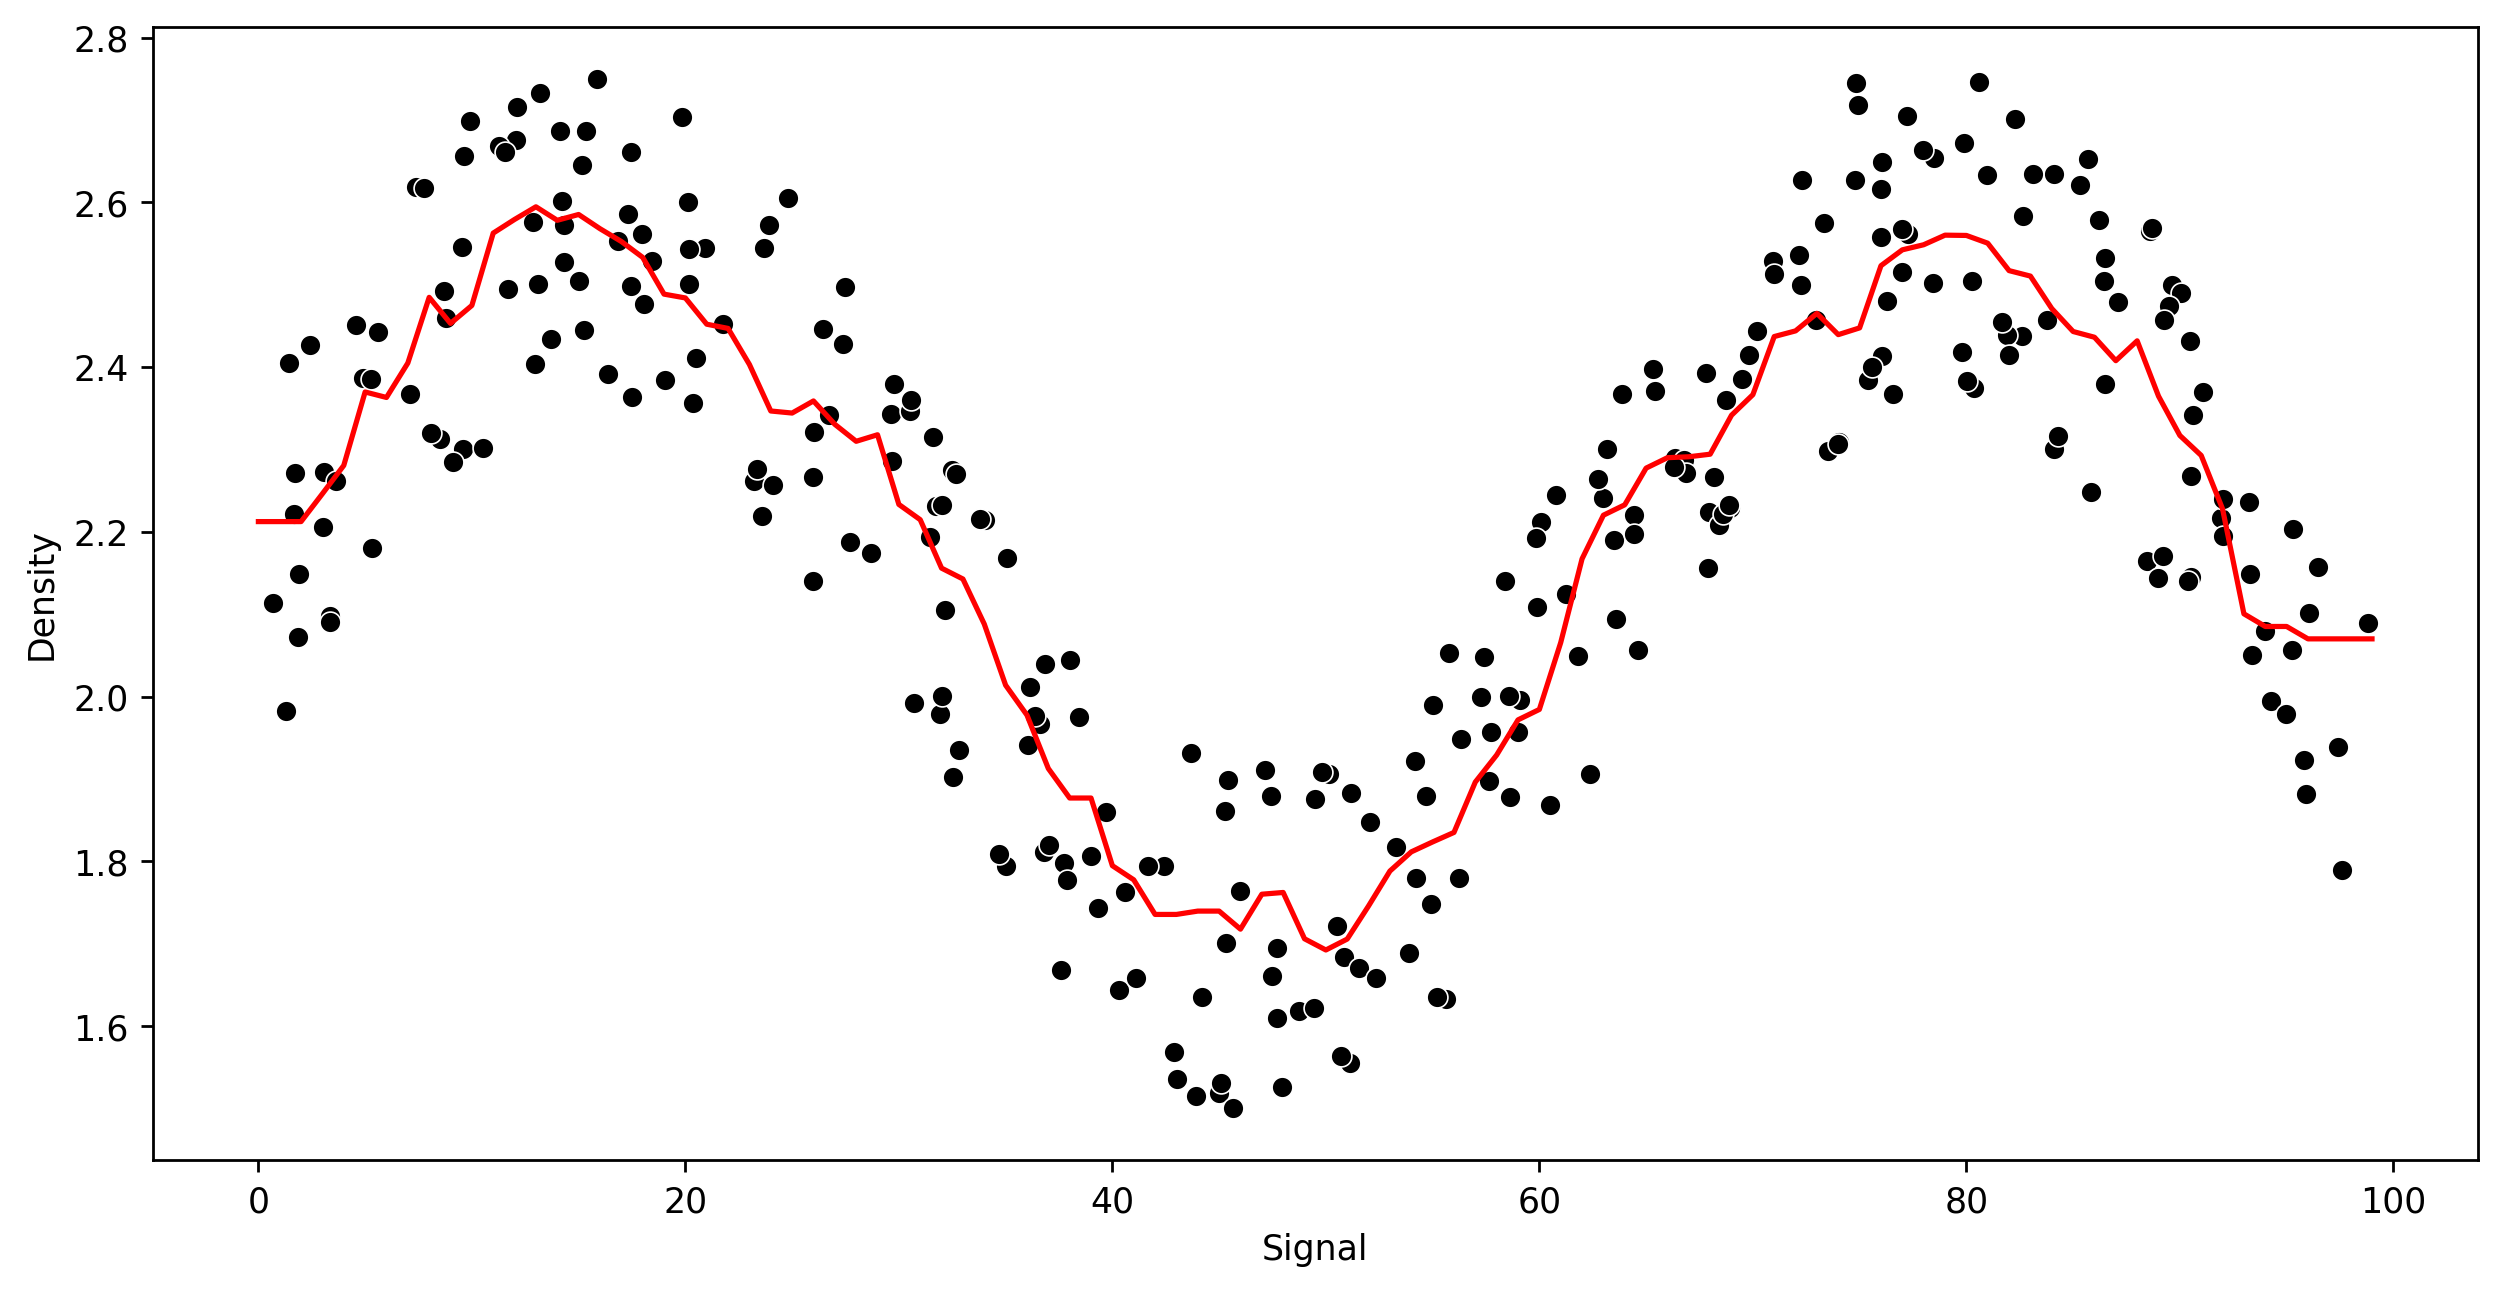

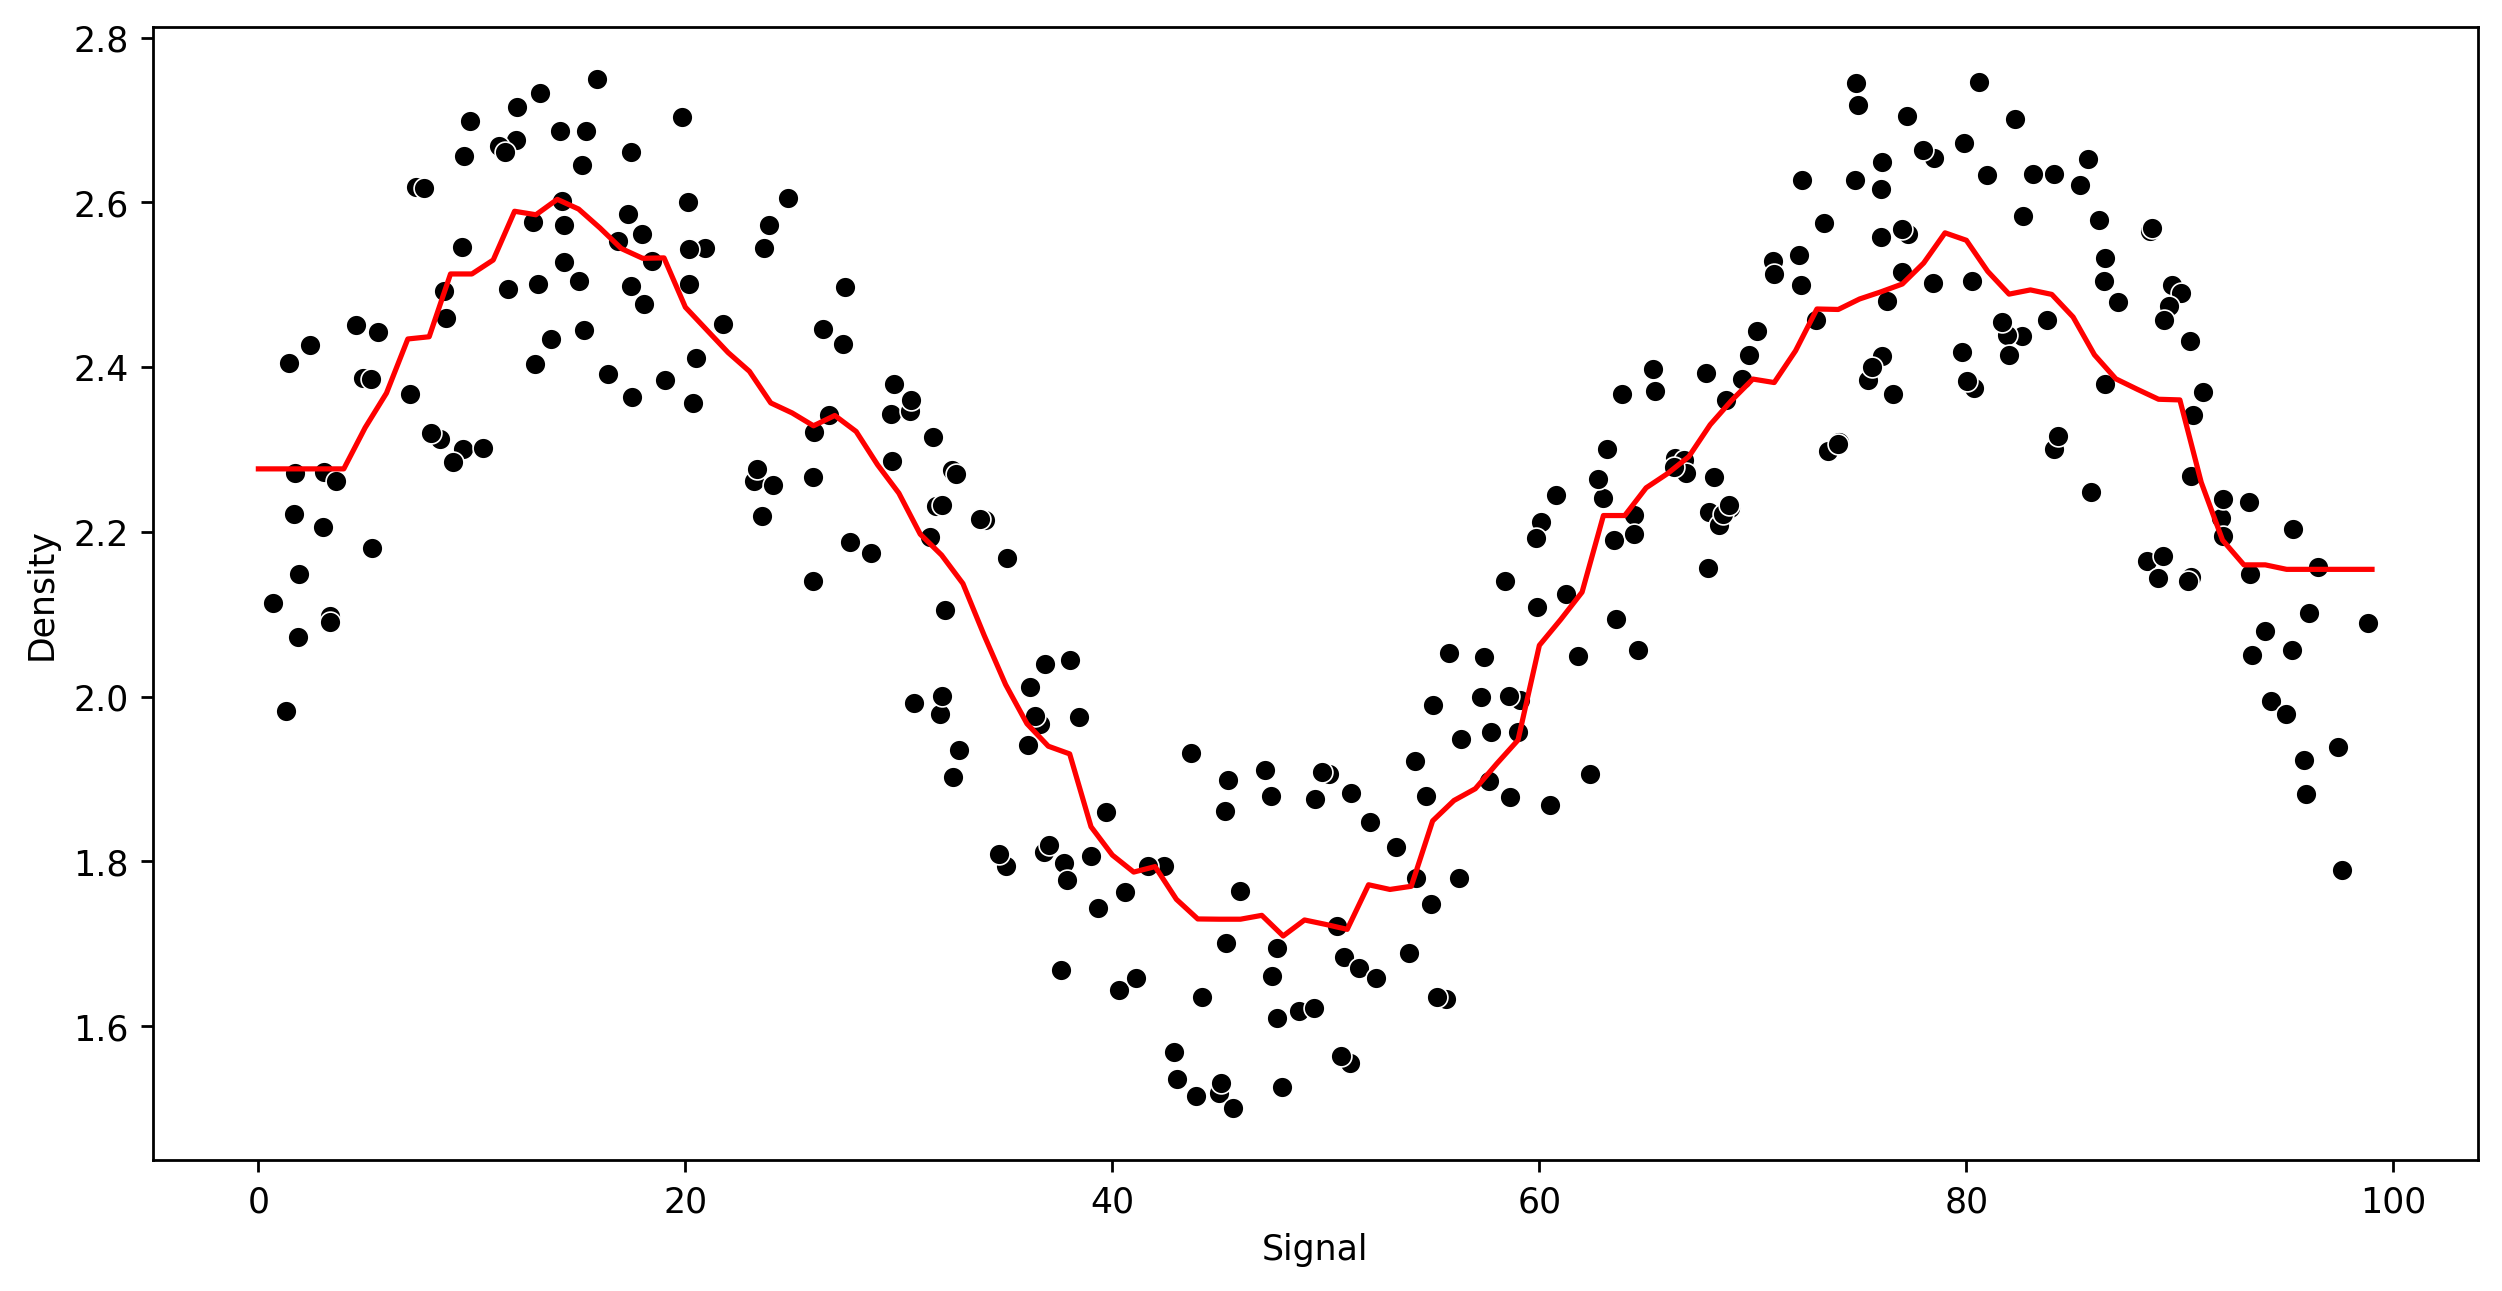

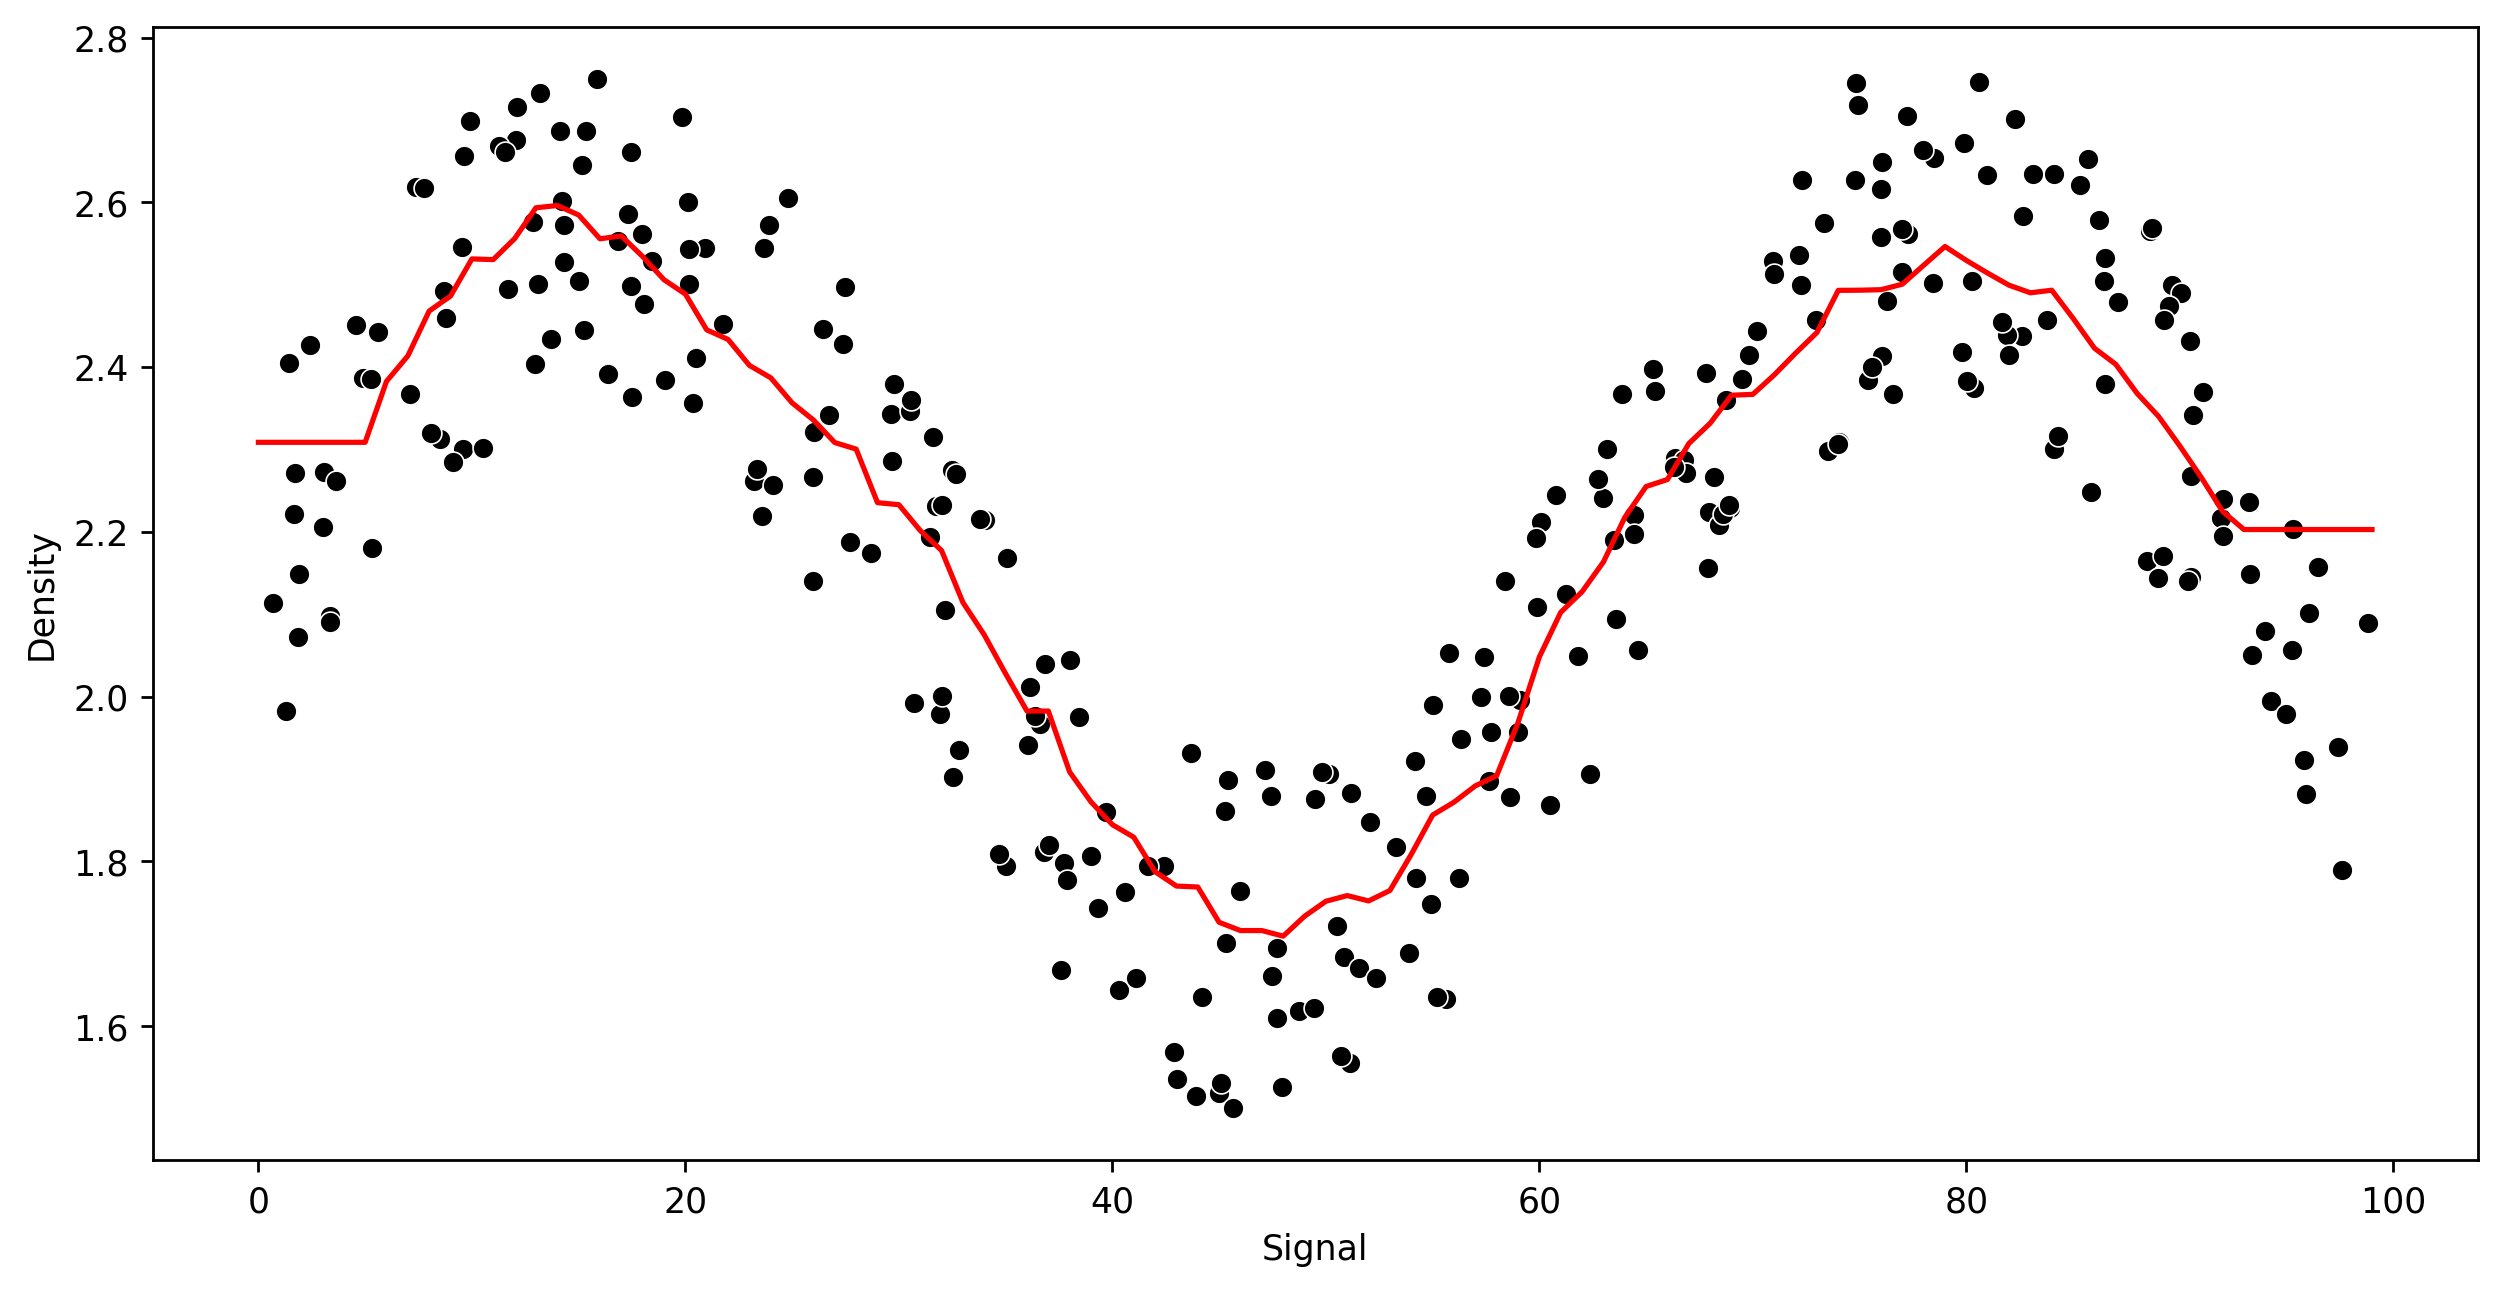

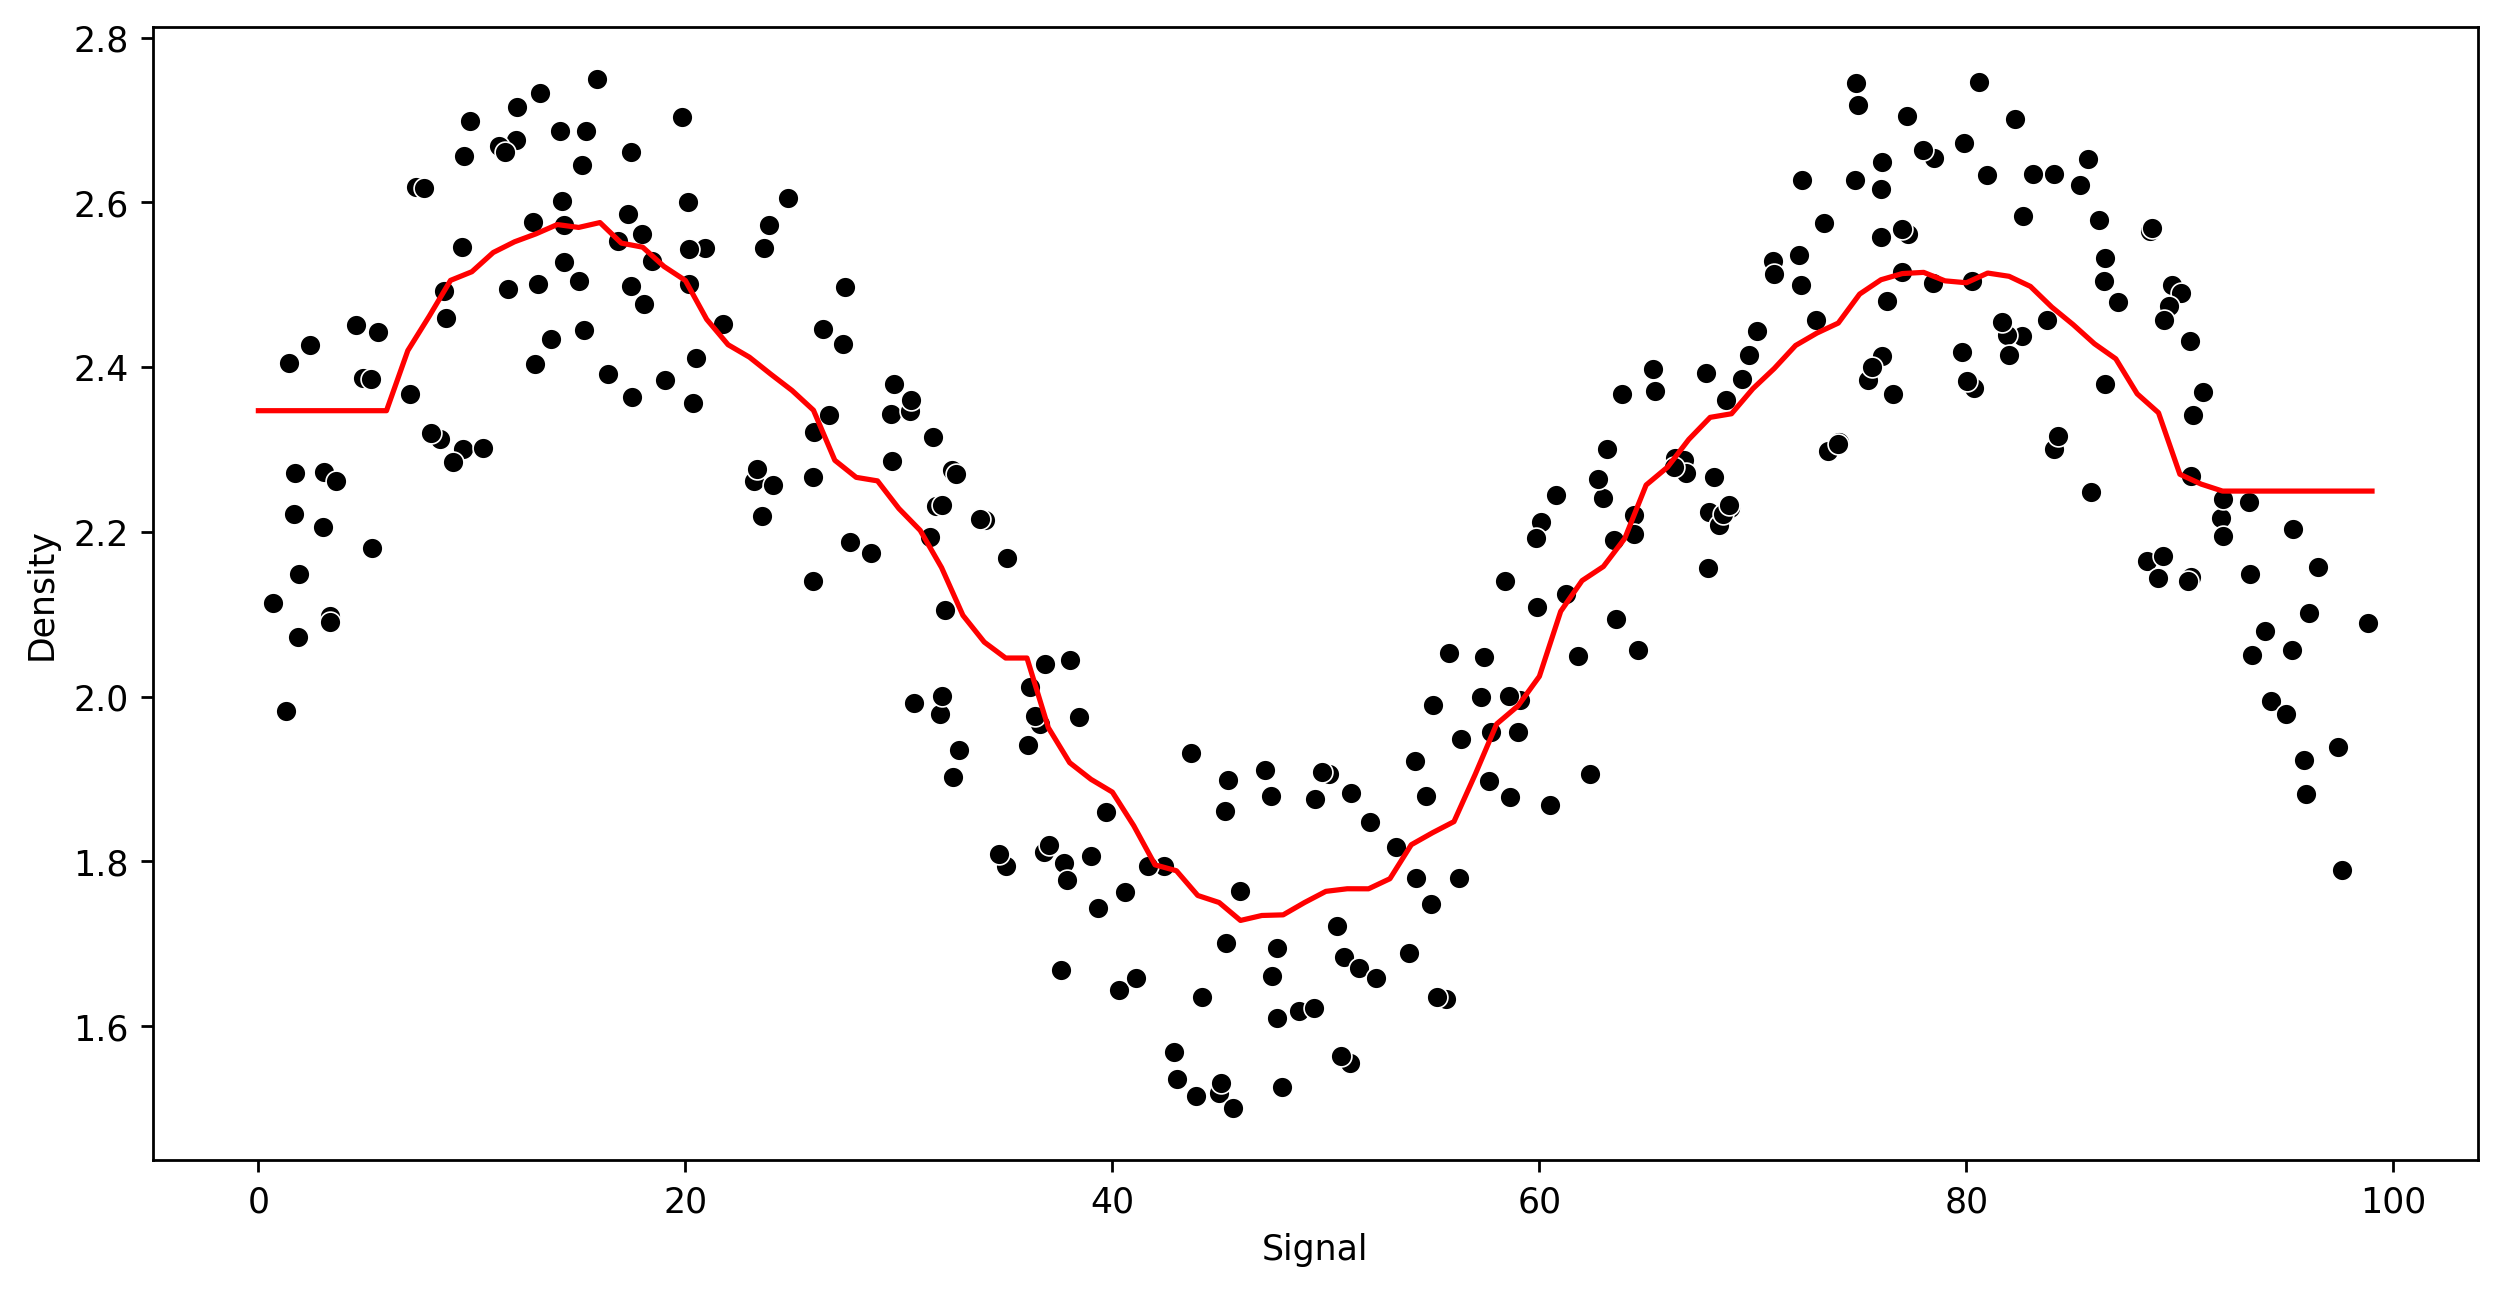

In [30]:
preds = {}
k_values = [1,2,3,5,7,10,15,20,25]
for n in k_values:
    print(f'K value: {n}')
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.15424063948855013
RMSE : 0.1911640267223586



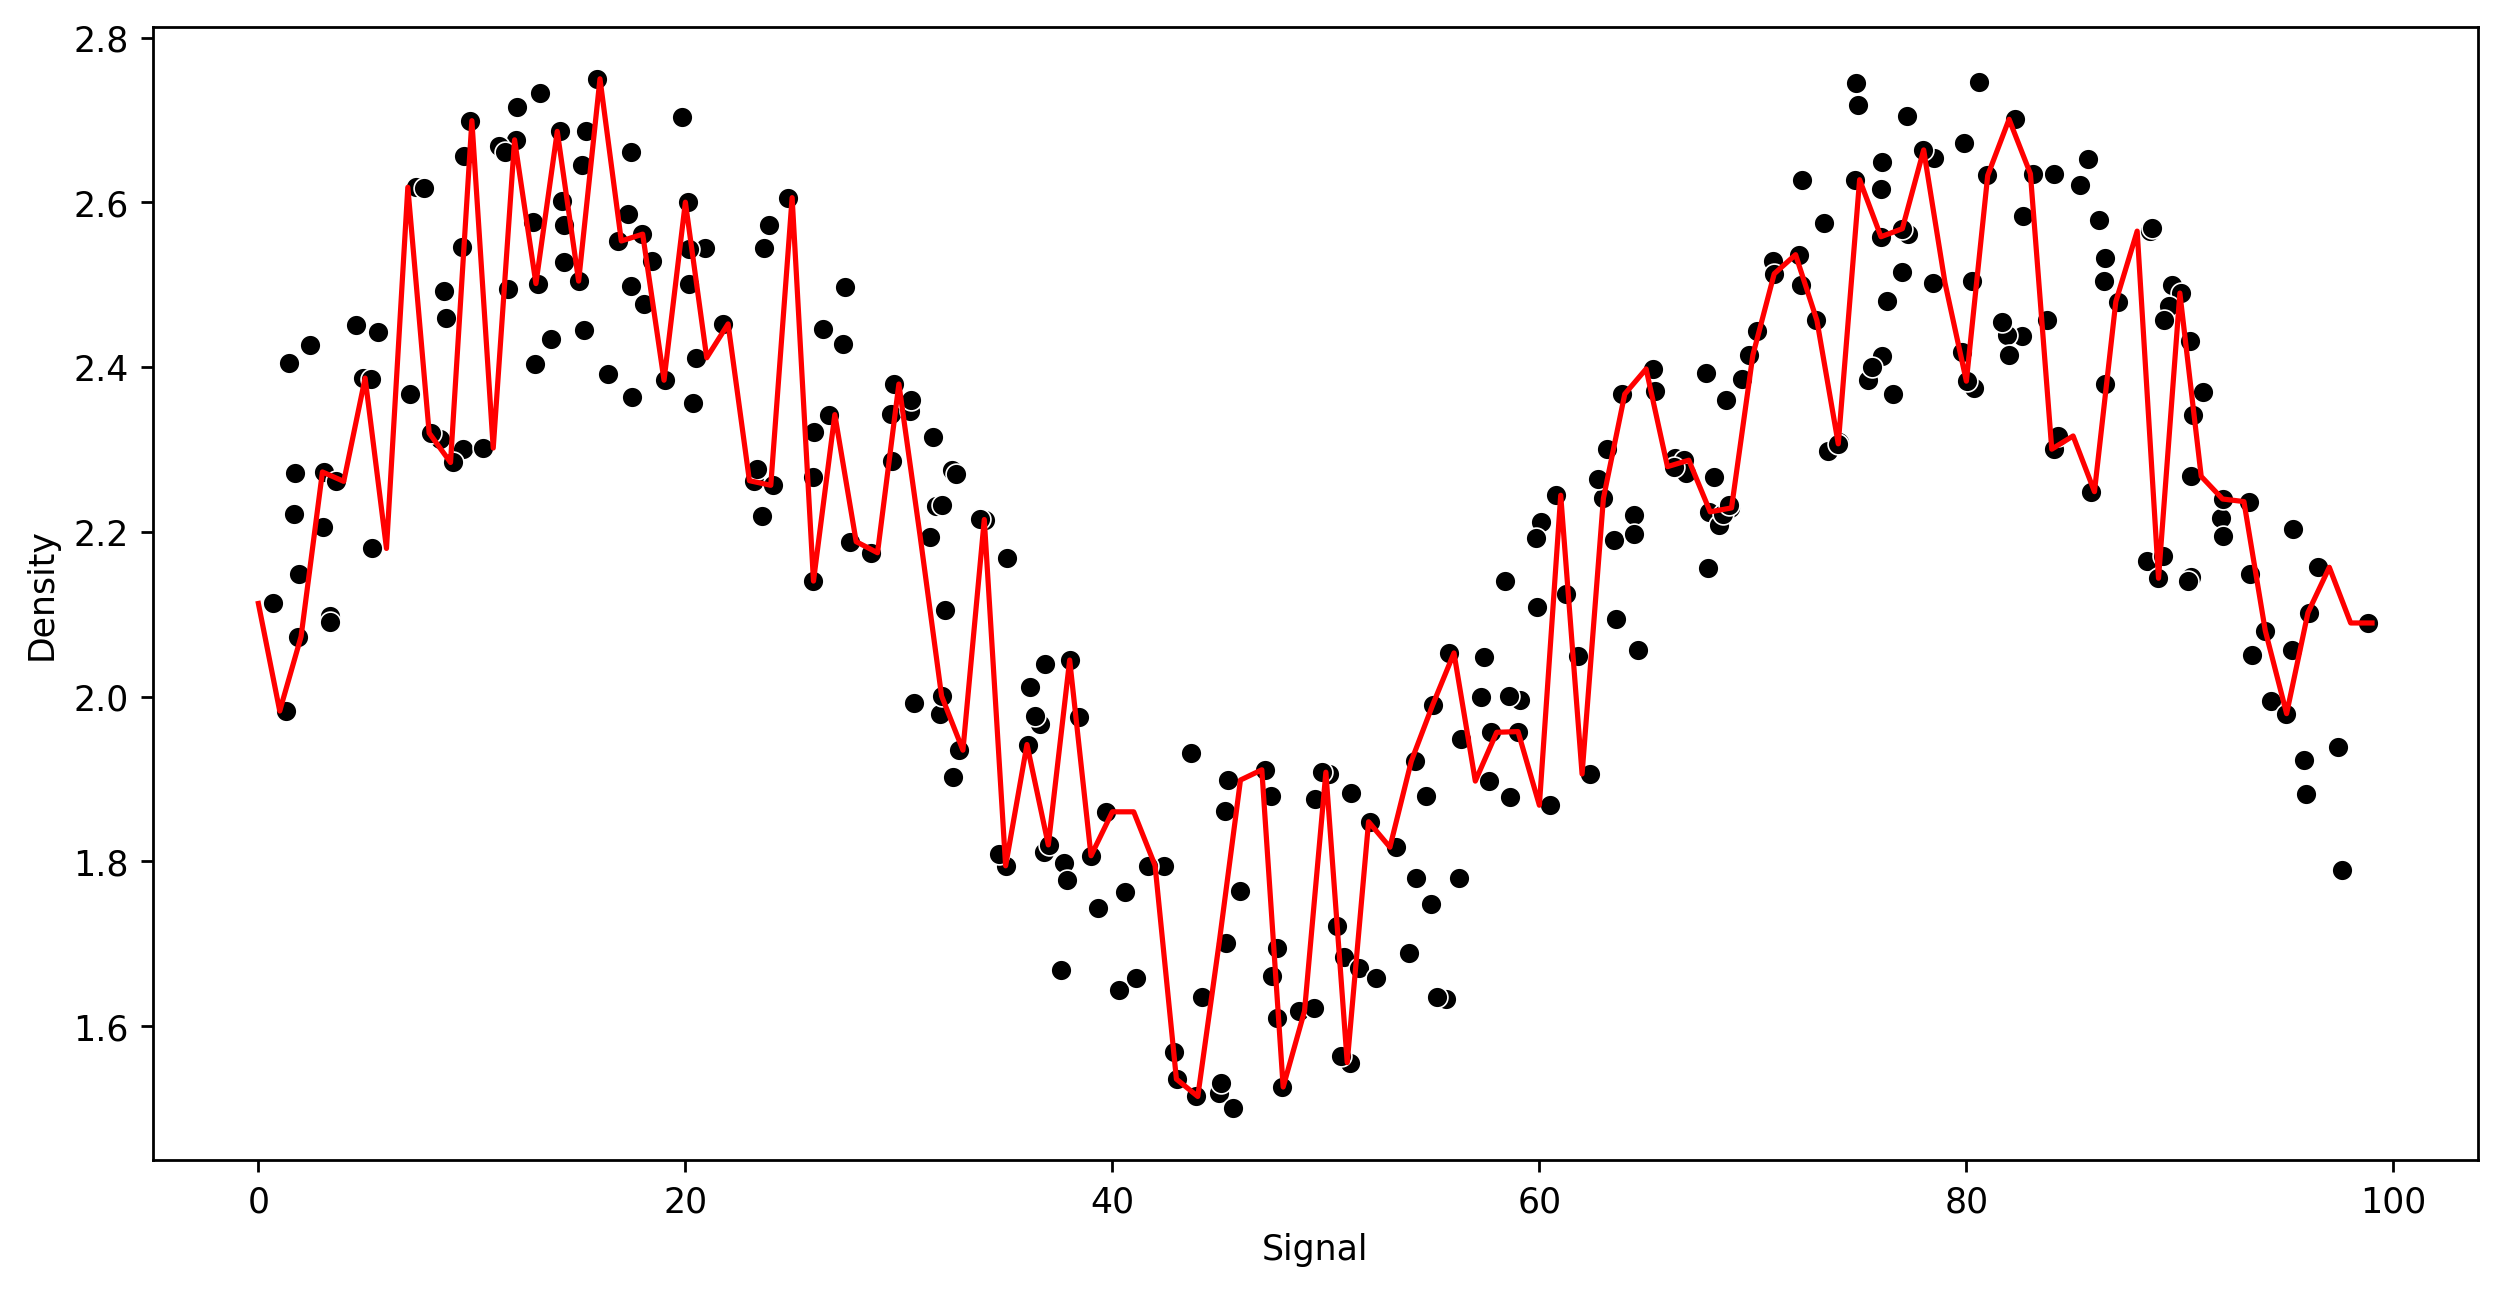

In [32]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [33]:
model.get_n_leaves()

210

----

## Support Vector Regression

In [34]:
from sklearn.svm import SVR

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {'C':[0.001,0.01,0.1,1,2,3,5,10,13,25,50,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [37]:
grid = GridSearchCV(svr,param_grid)

MAE: 0.11406197706852576
RMSE : 0.1325805249811651



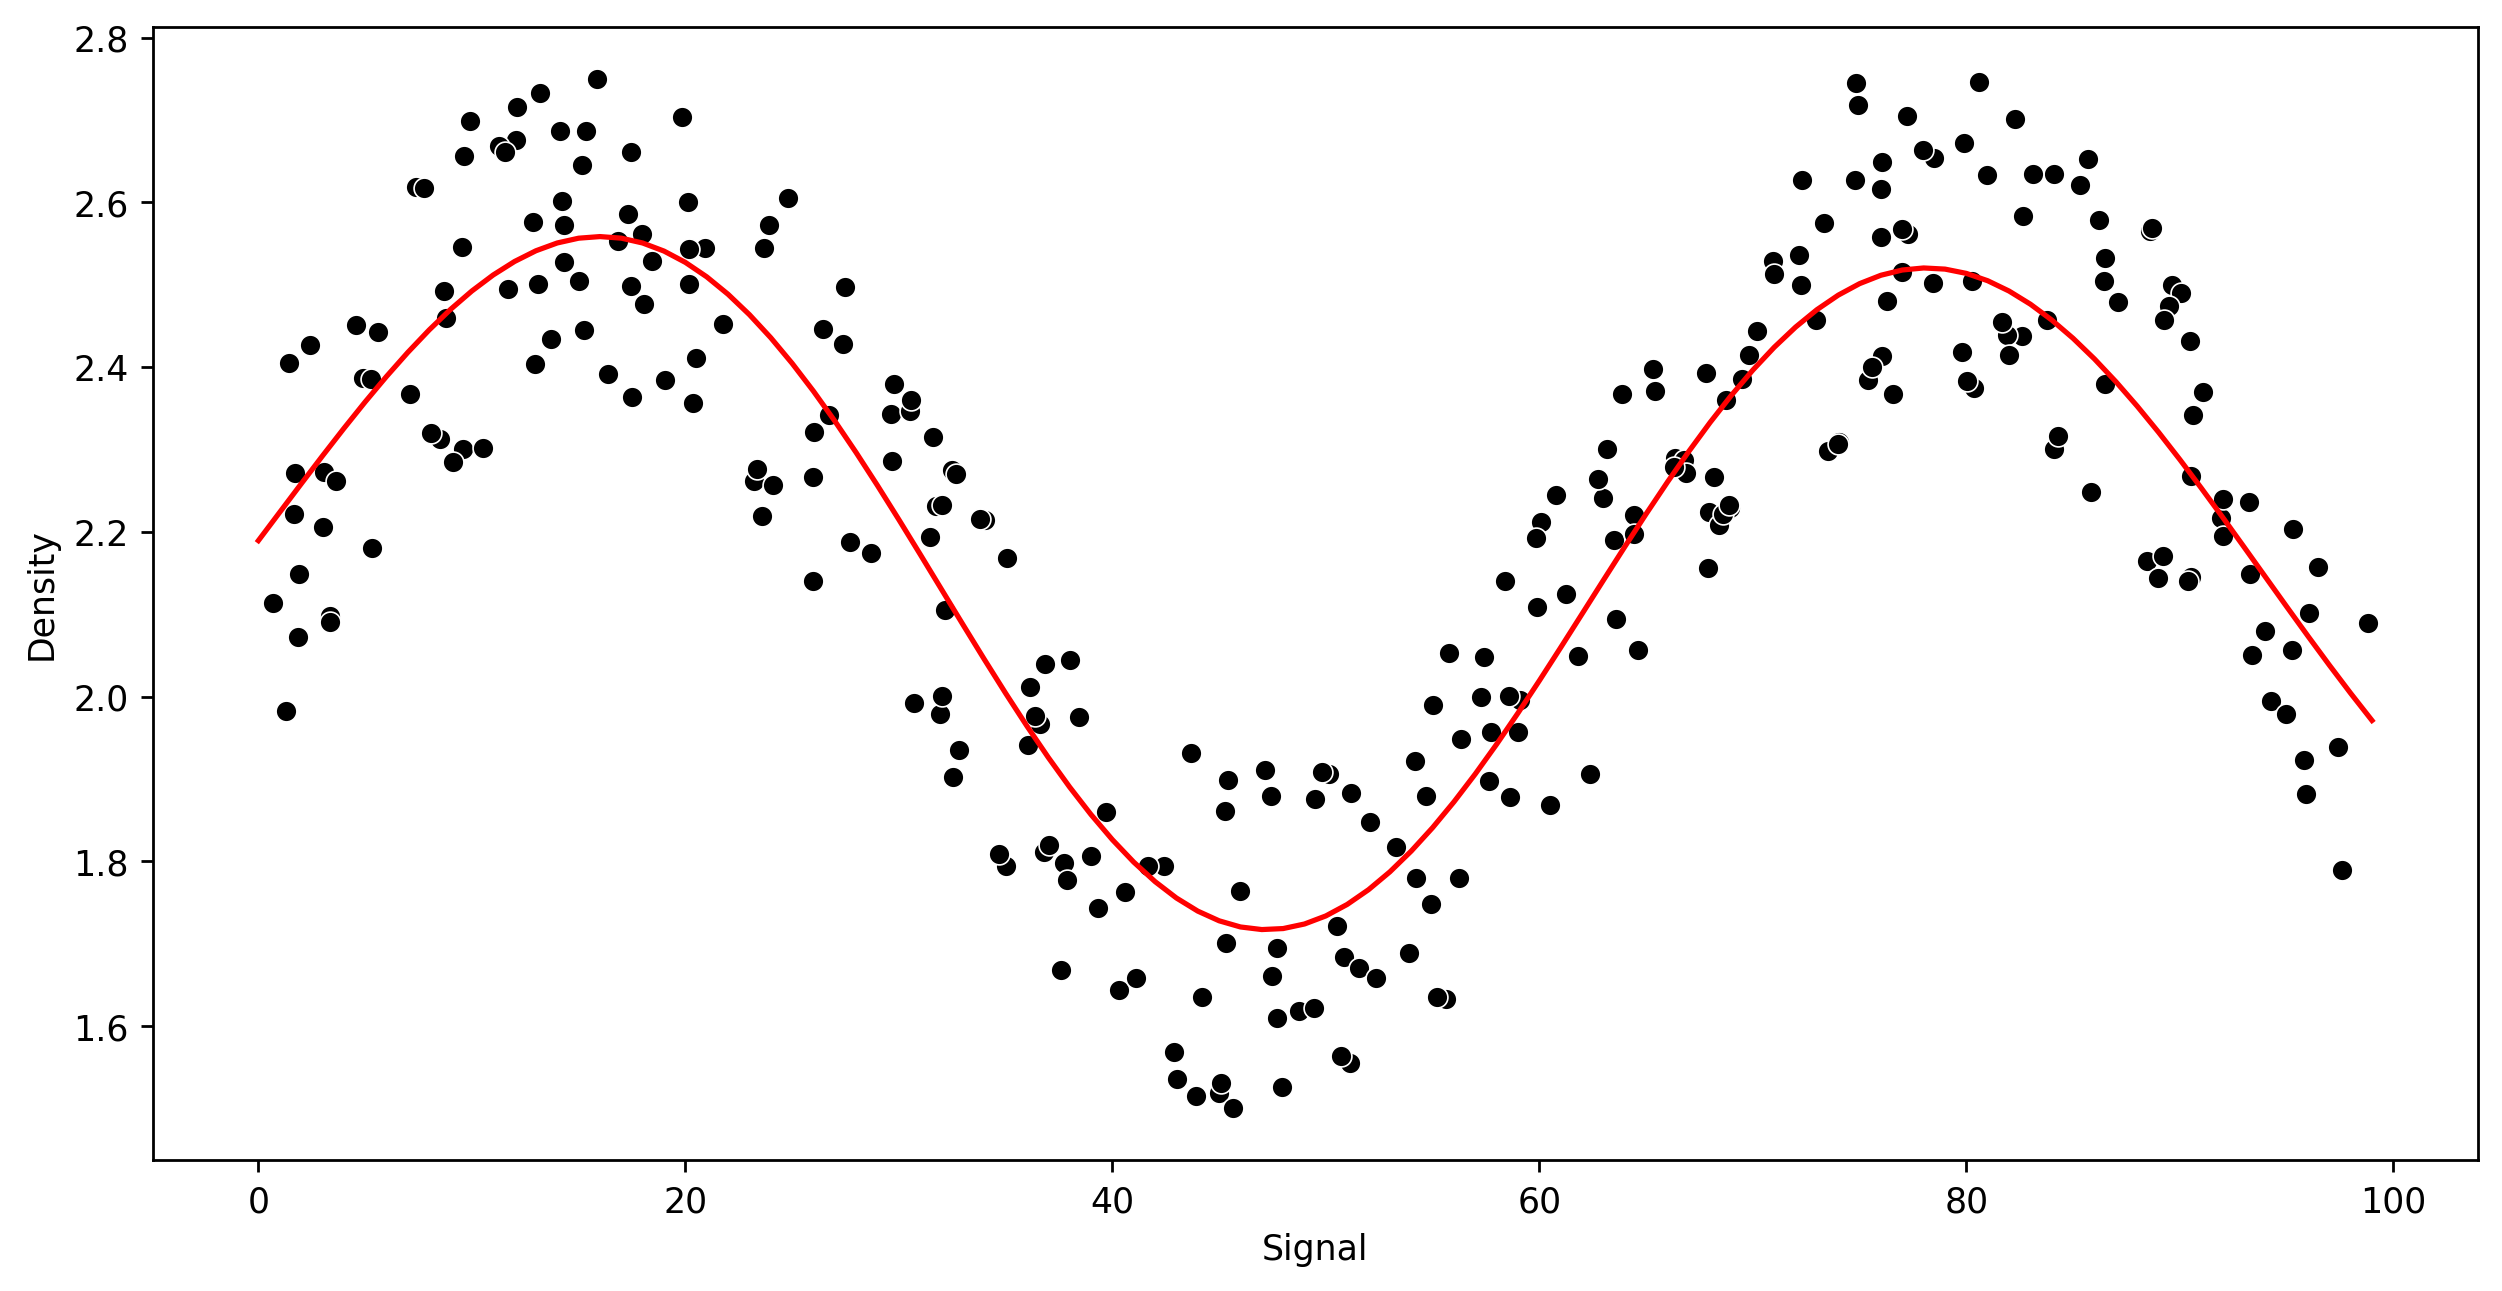

In [38]:
run_model(grid,X_train,y_train,X_test,y_test)

In [39]:
grid.best_estimator_

SVR(C=1)

---

## Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
 #help(RandomForestRegressor)

MAE: 0.14437922144637078
RMSE : 0.18156952406254442

MAE: 0.14432306348674134
RMSE : 0.17576231815005625

MAE: 0.1372246457715054
RMSE : 0.16781713543346422

MAE: 0.13824126880101545
RMSE : 0.1689535048531767

MAE: 0.12700575762260716
RMSE : 0.15452277920359014

MAE: 0.13126942980479273
RMSE : 0.16010430816932167

MAE: 0.129776538538078
RMSE : 0.15820307196496422

MAE: 0.13388039142475147
RMSE : 0.16163472134014556

MAE: 0.12972609593495807
RMSE : 0.15652526229401026

MAE: 0.1336673691141976
RMSE : 0.1615850361423495



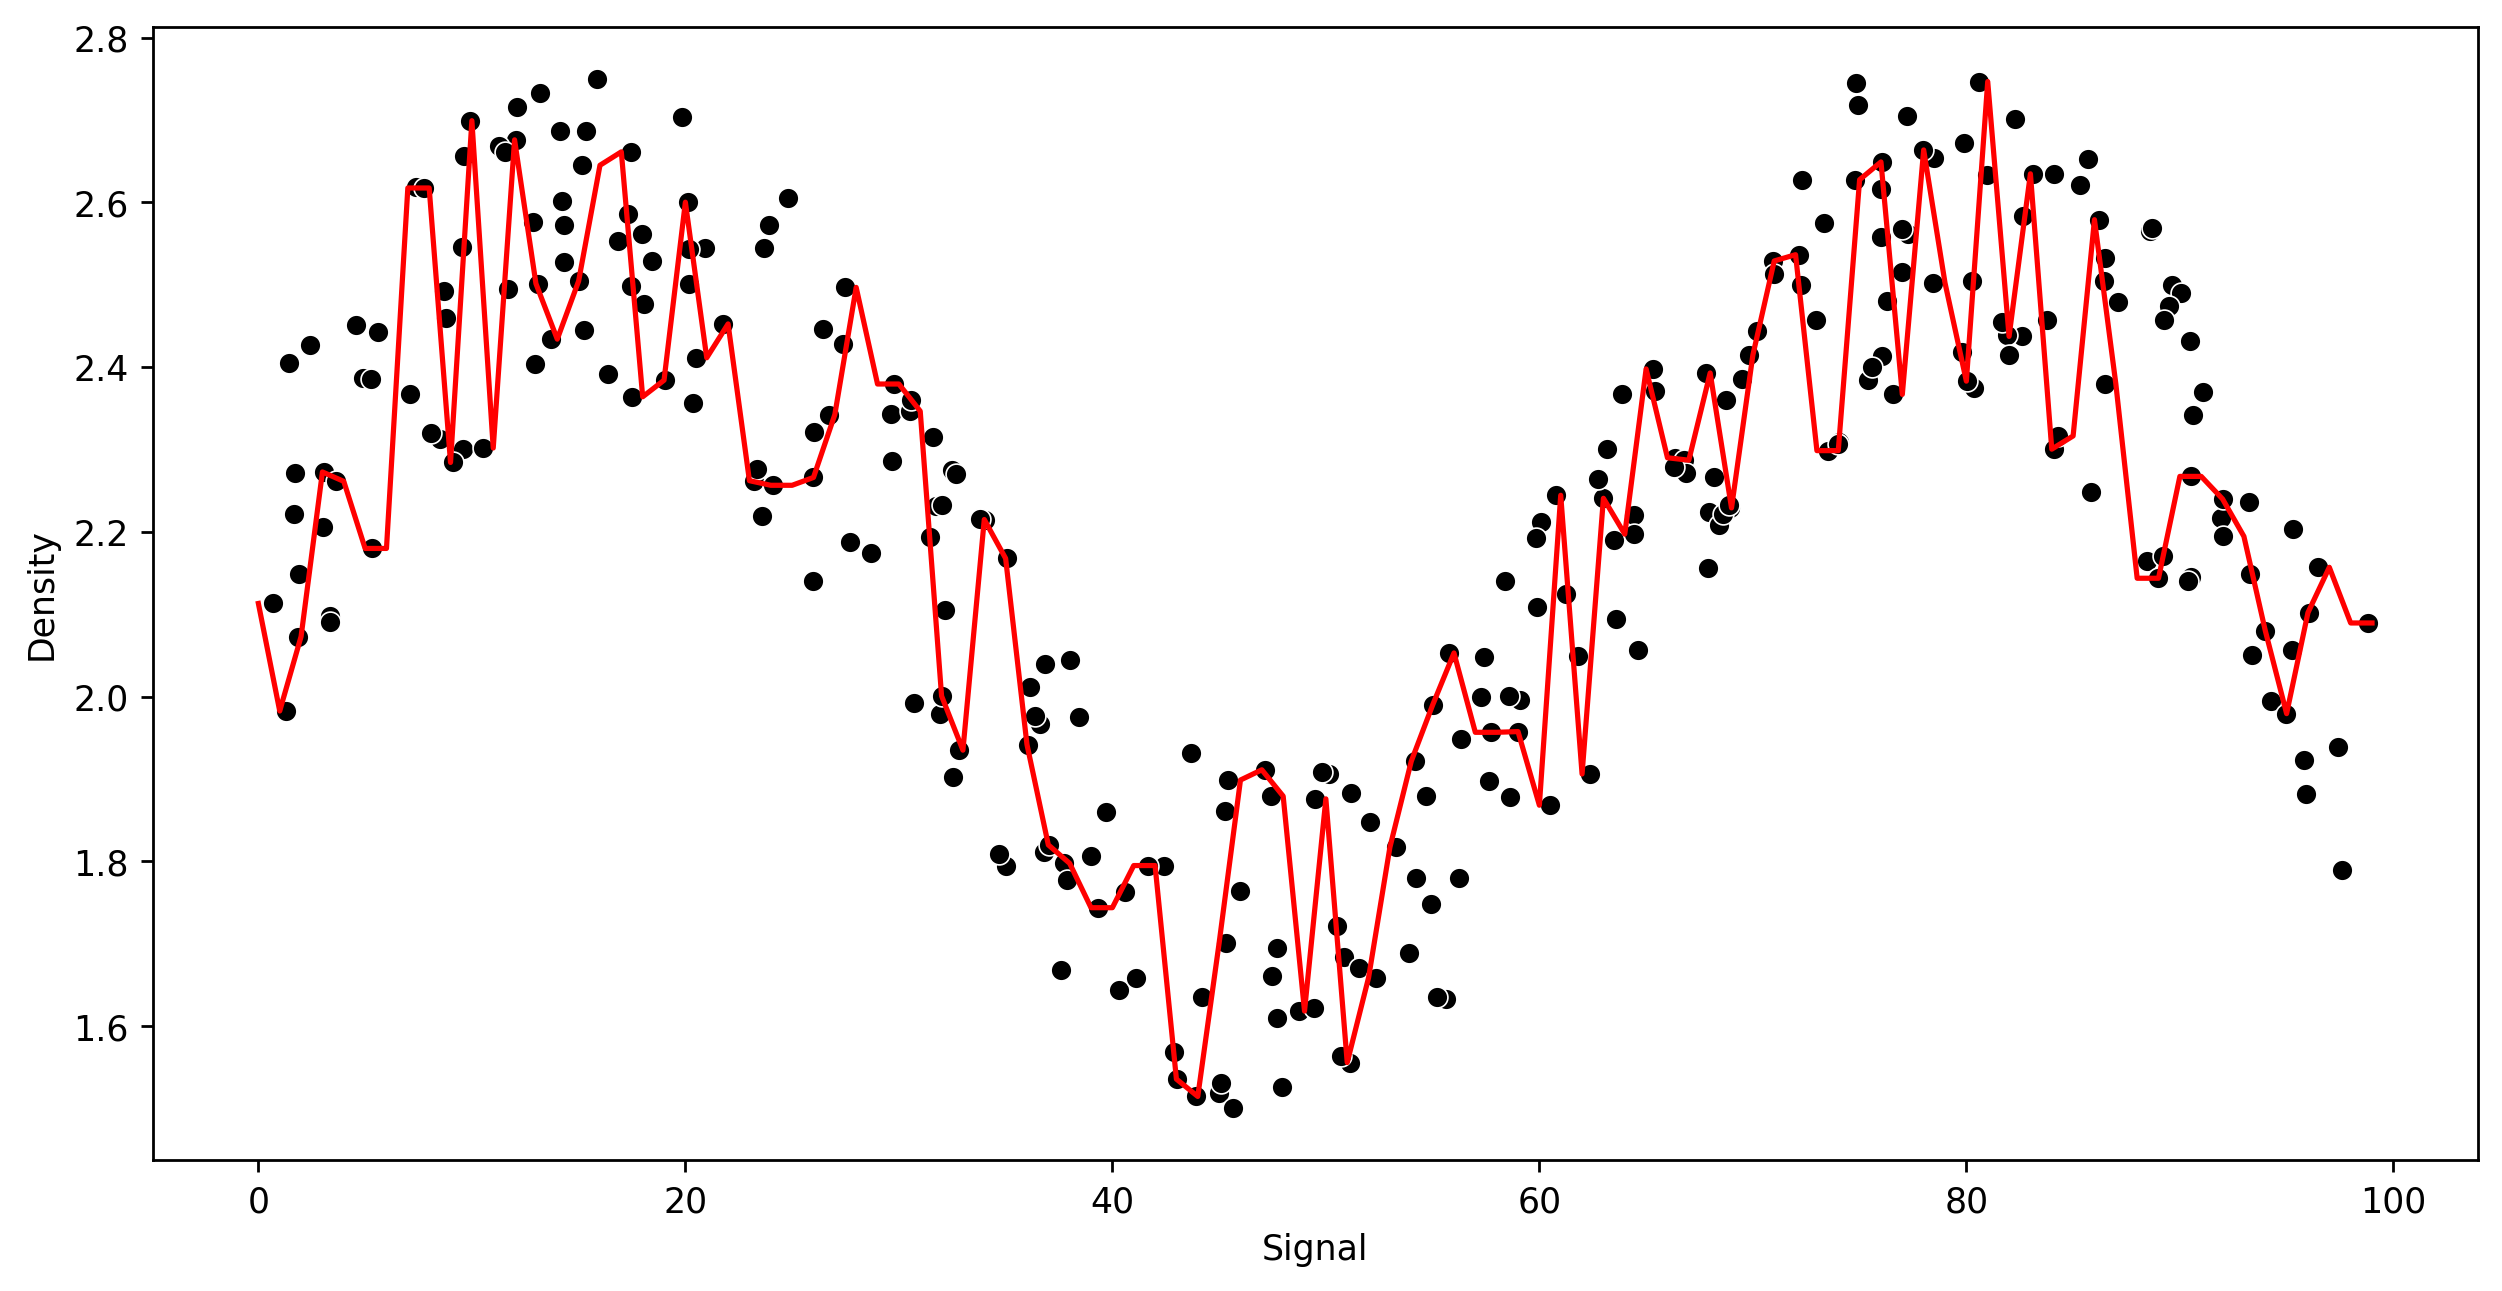

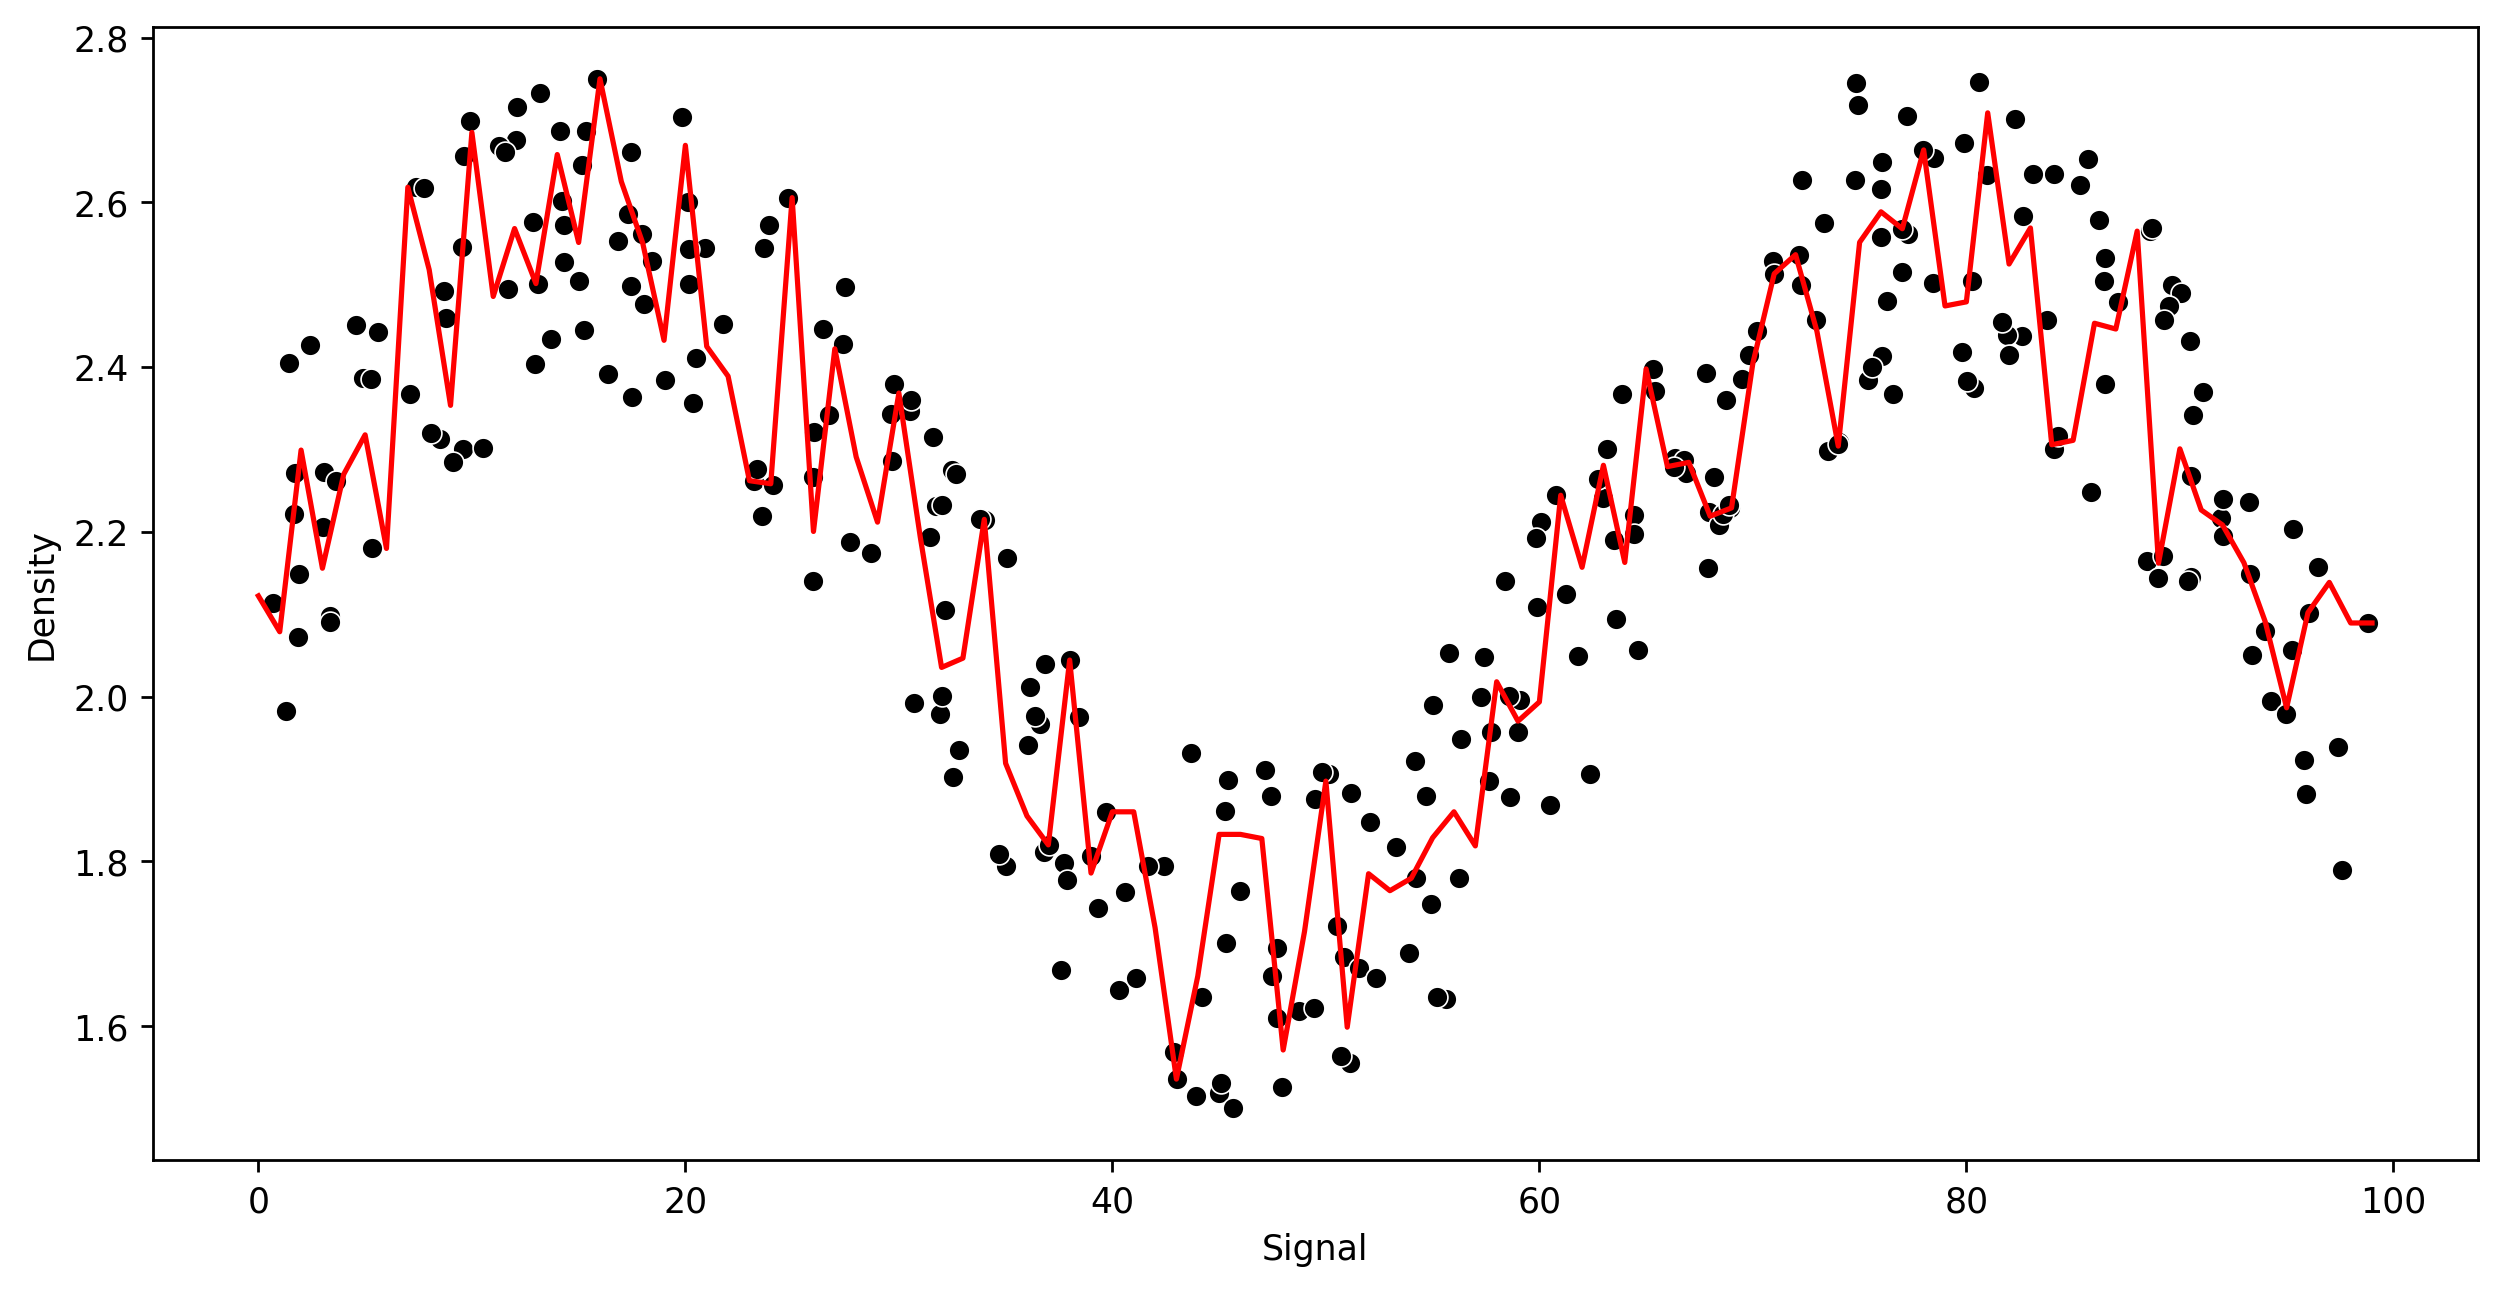

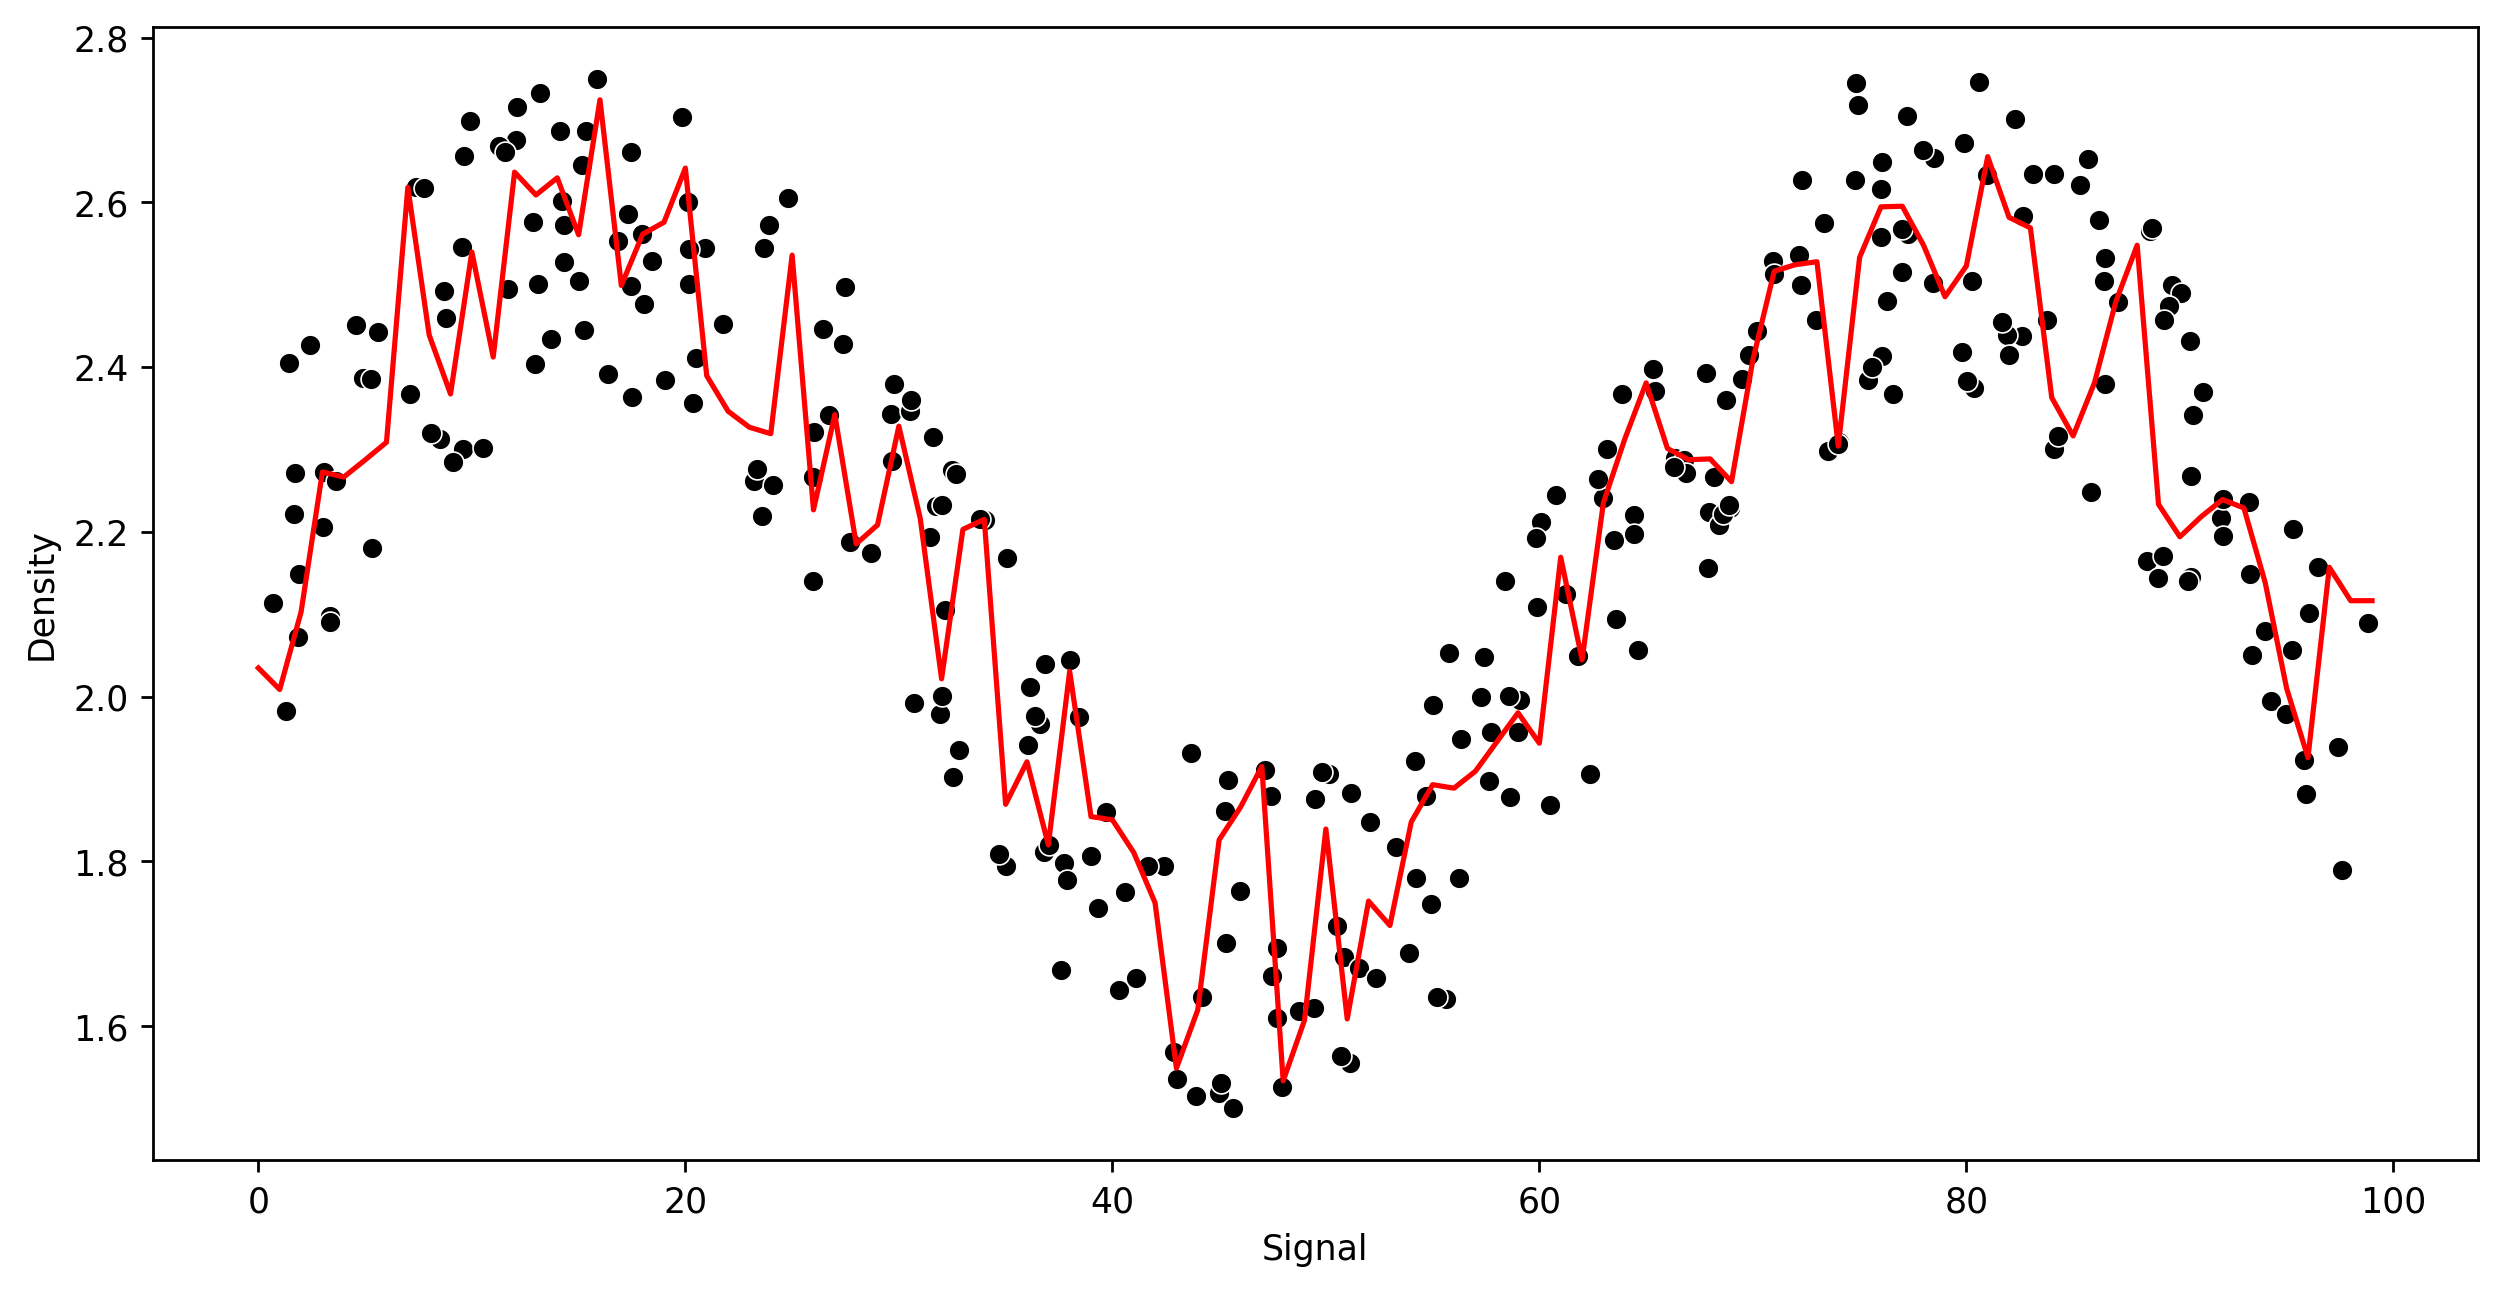

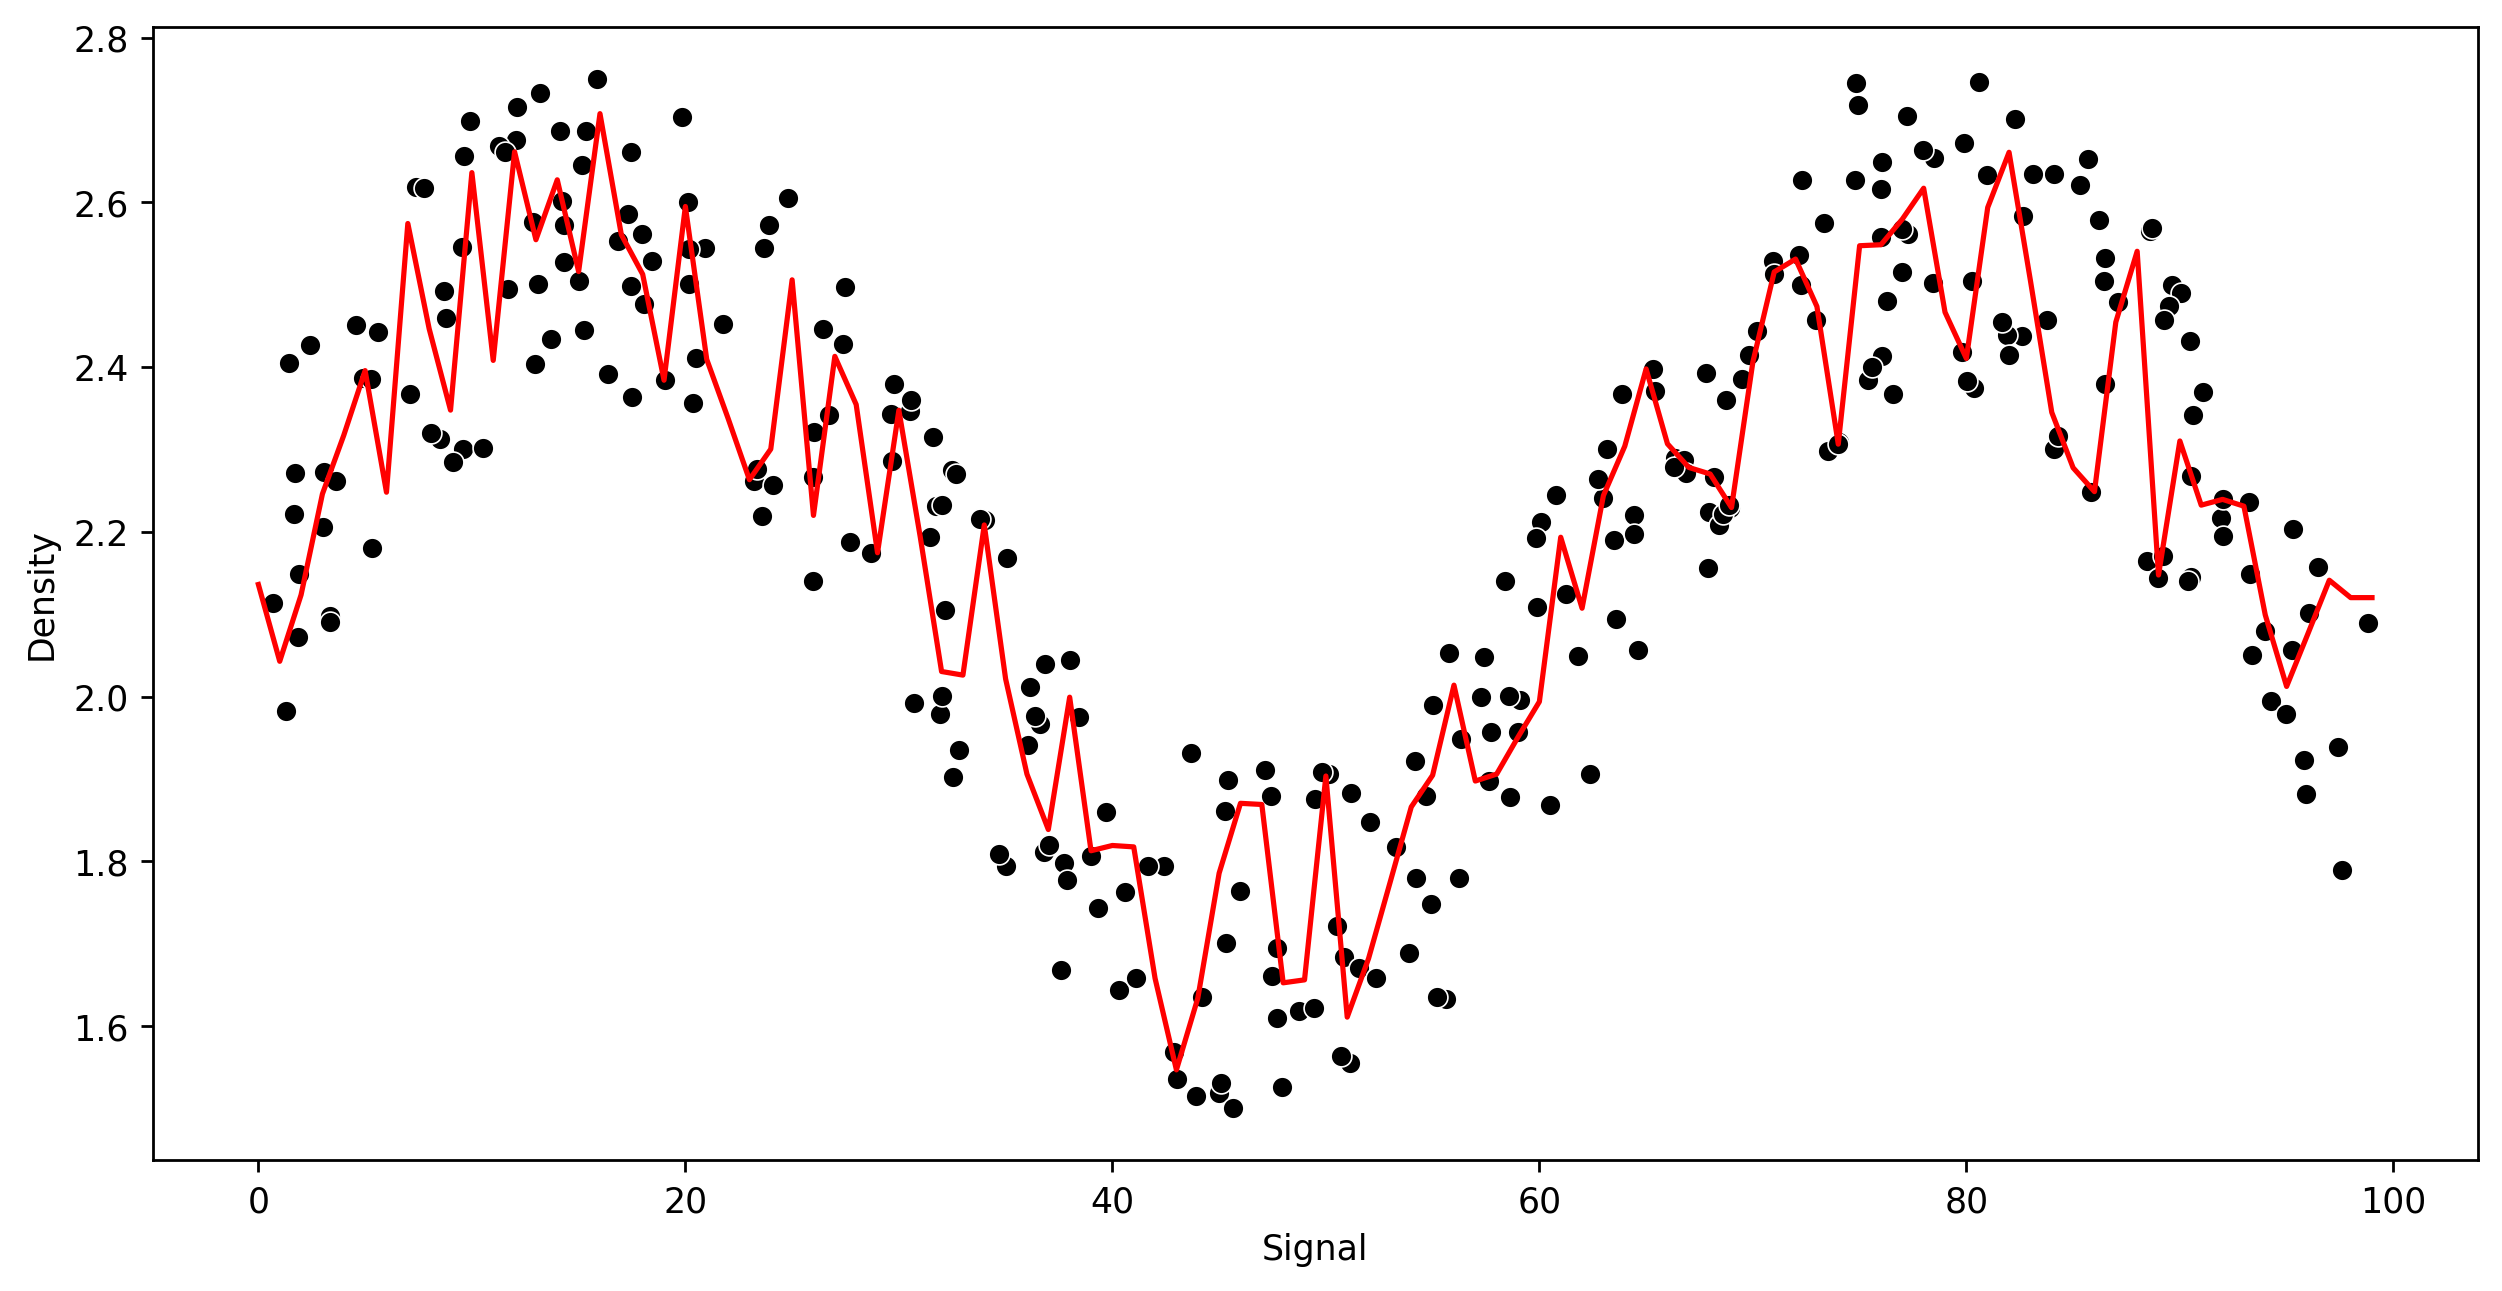

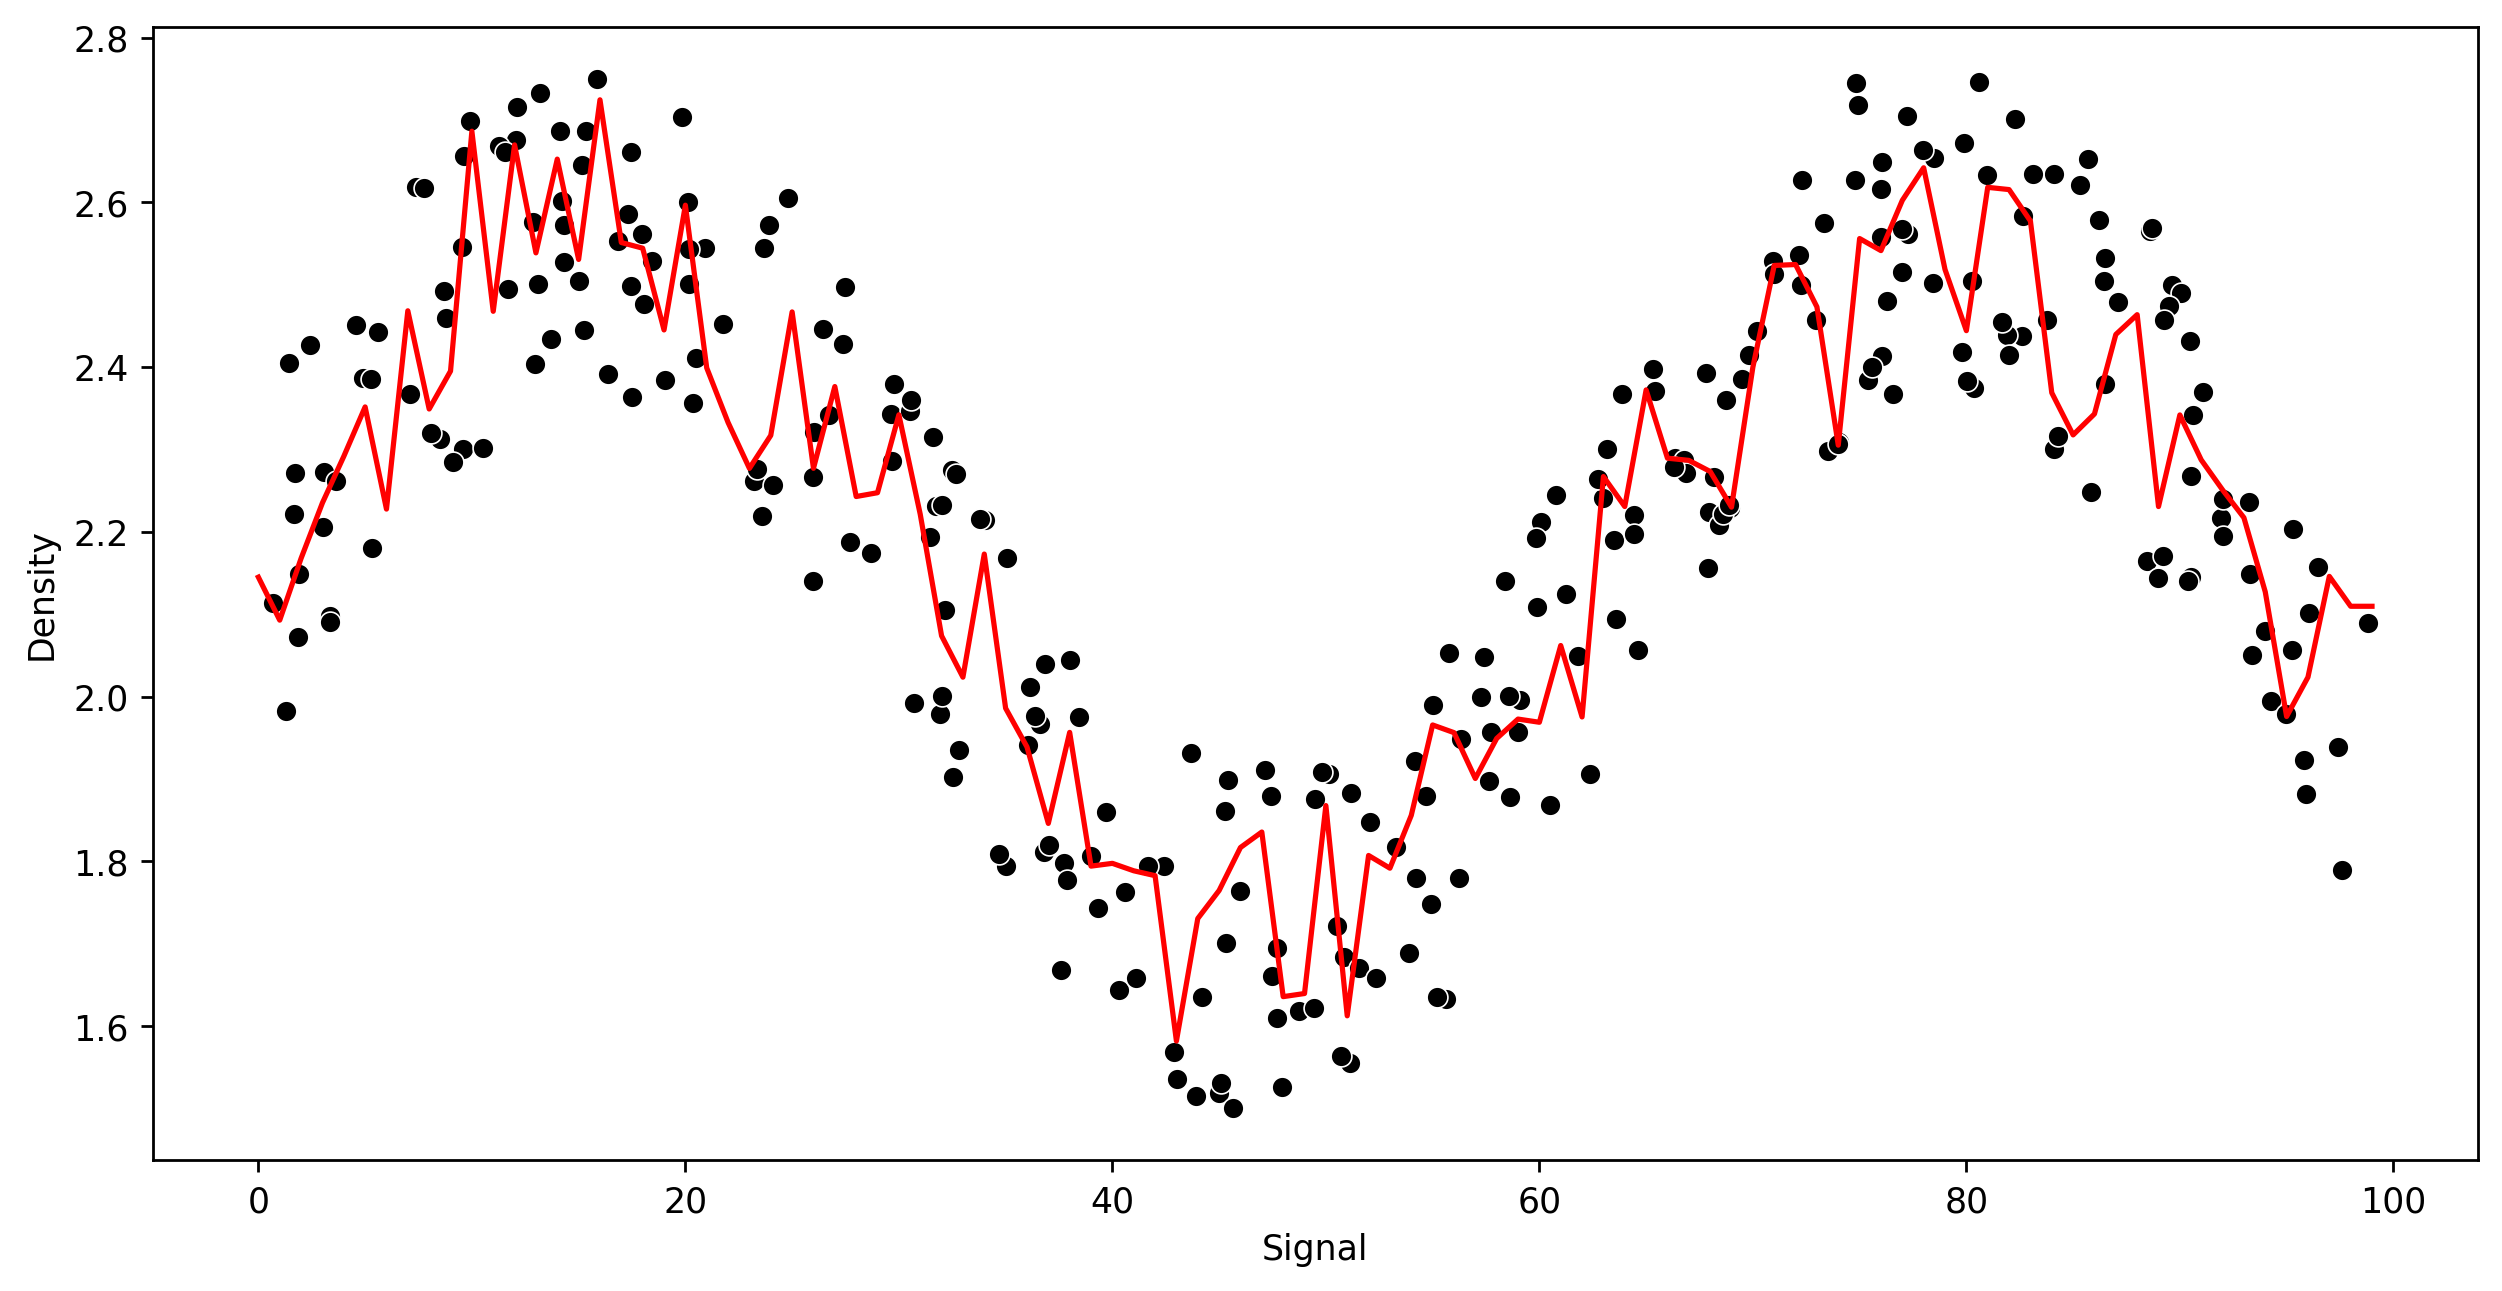

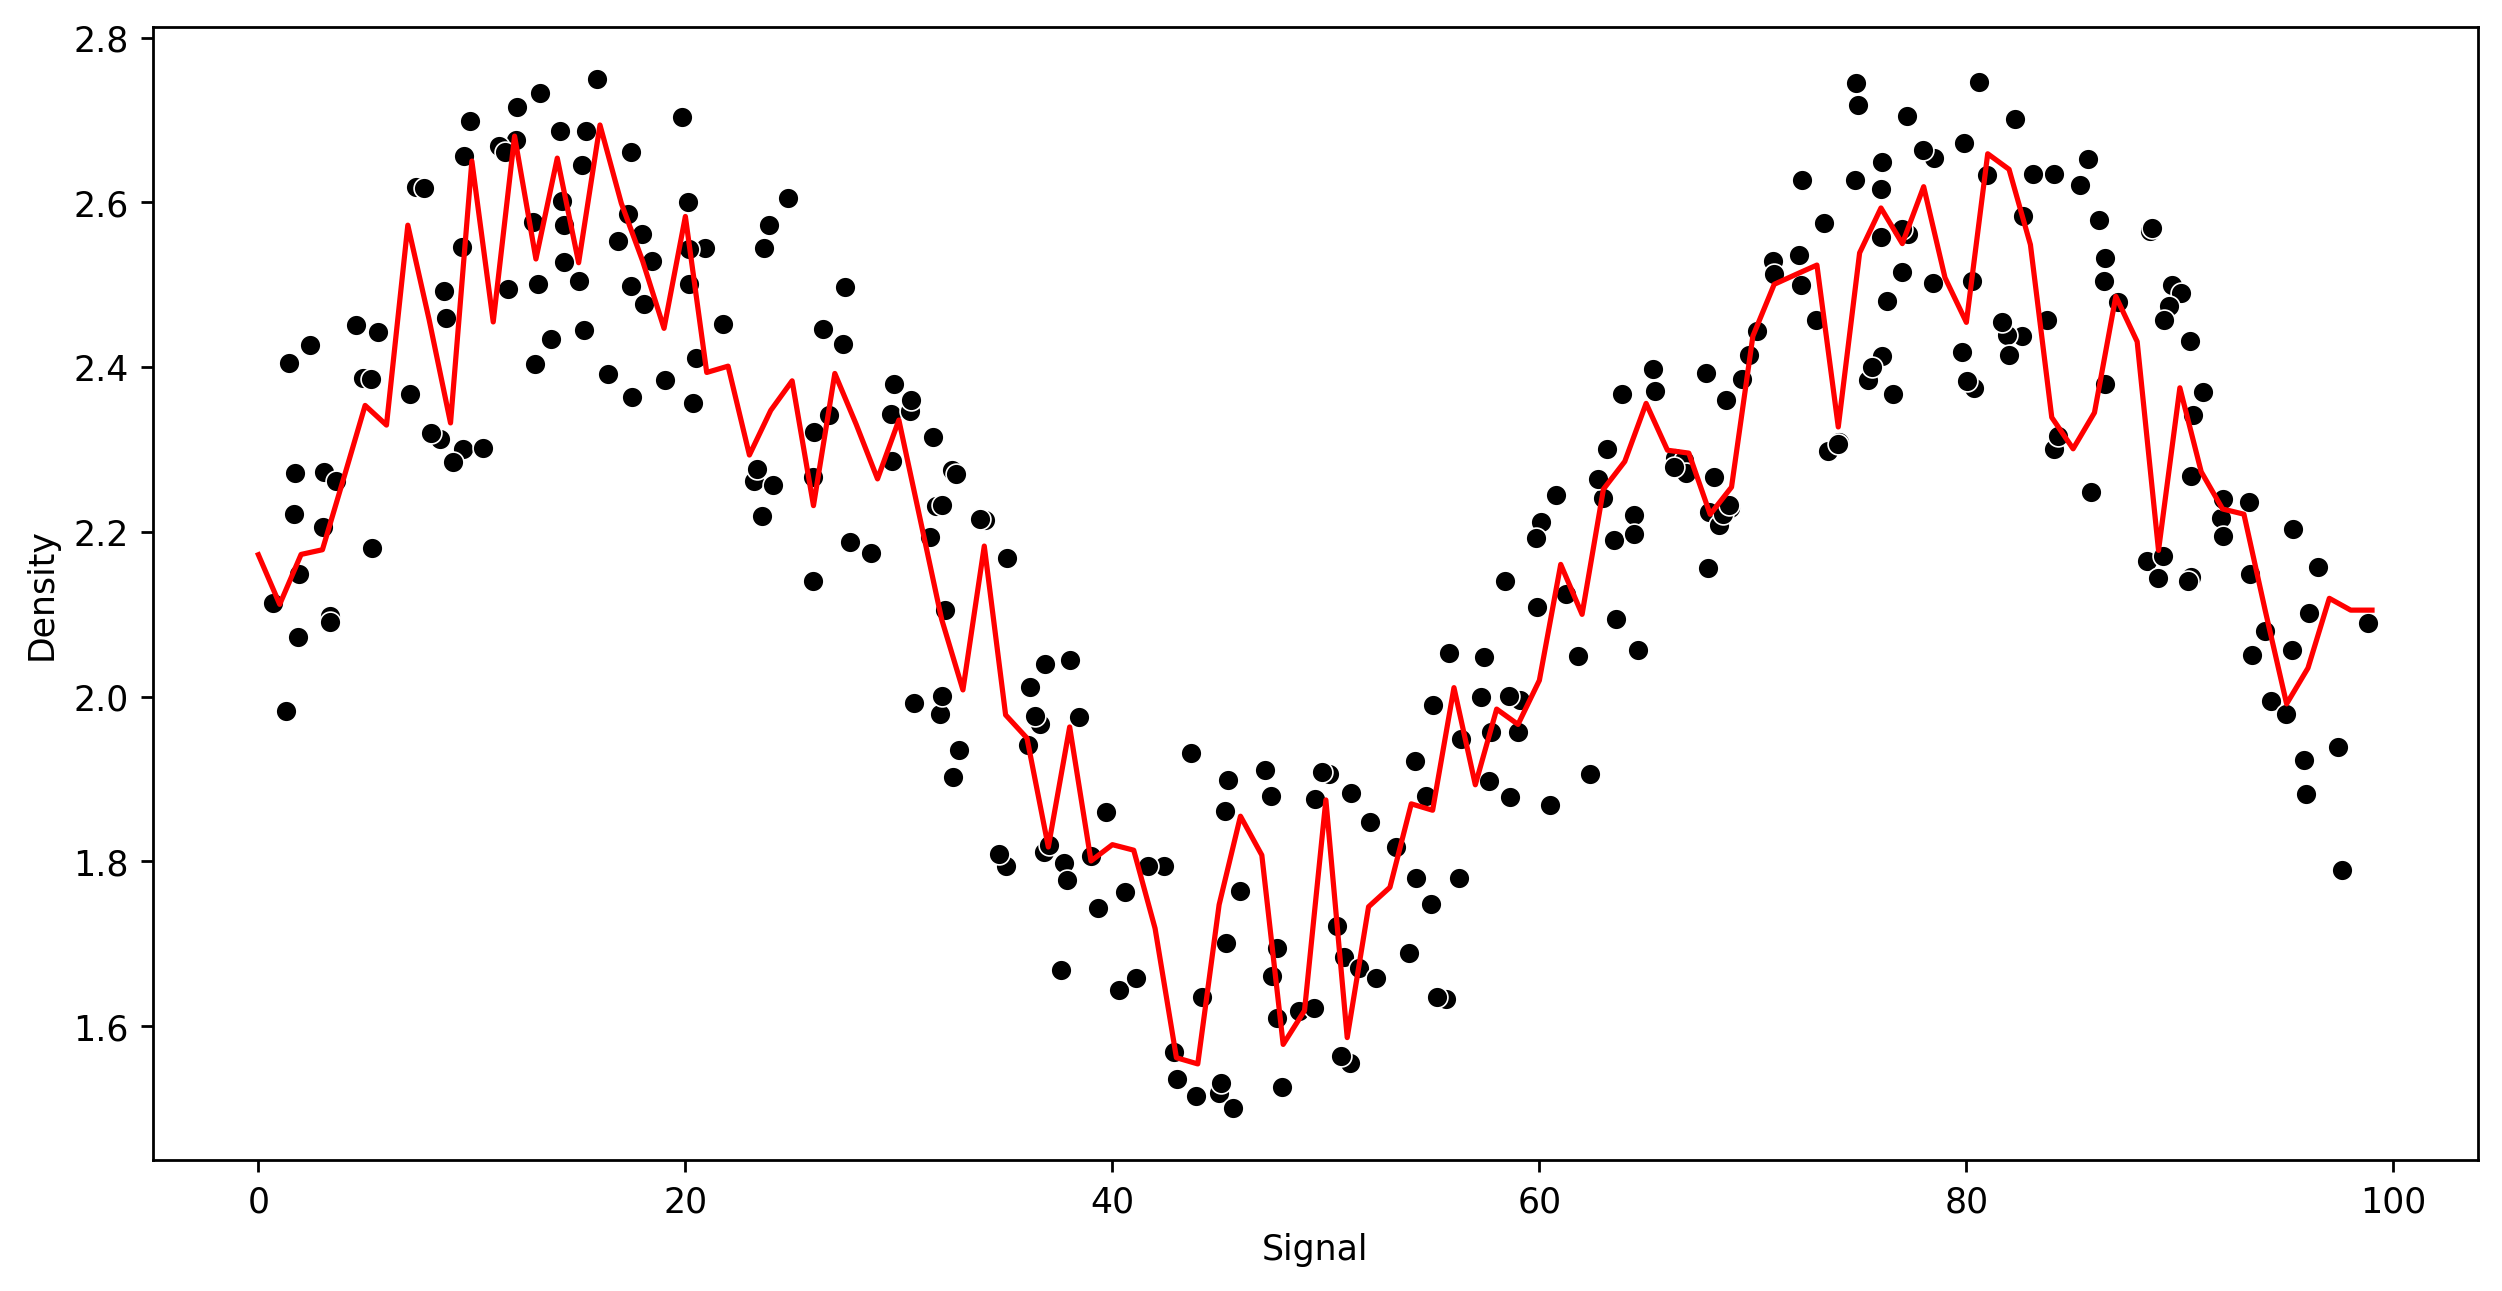

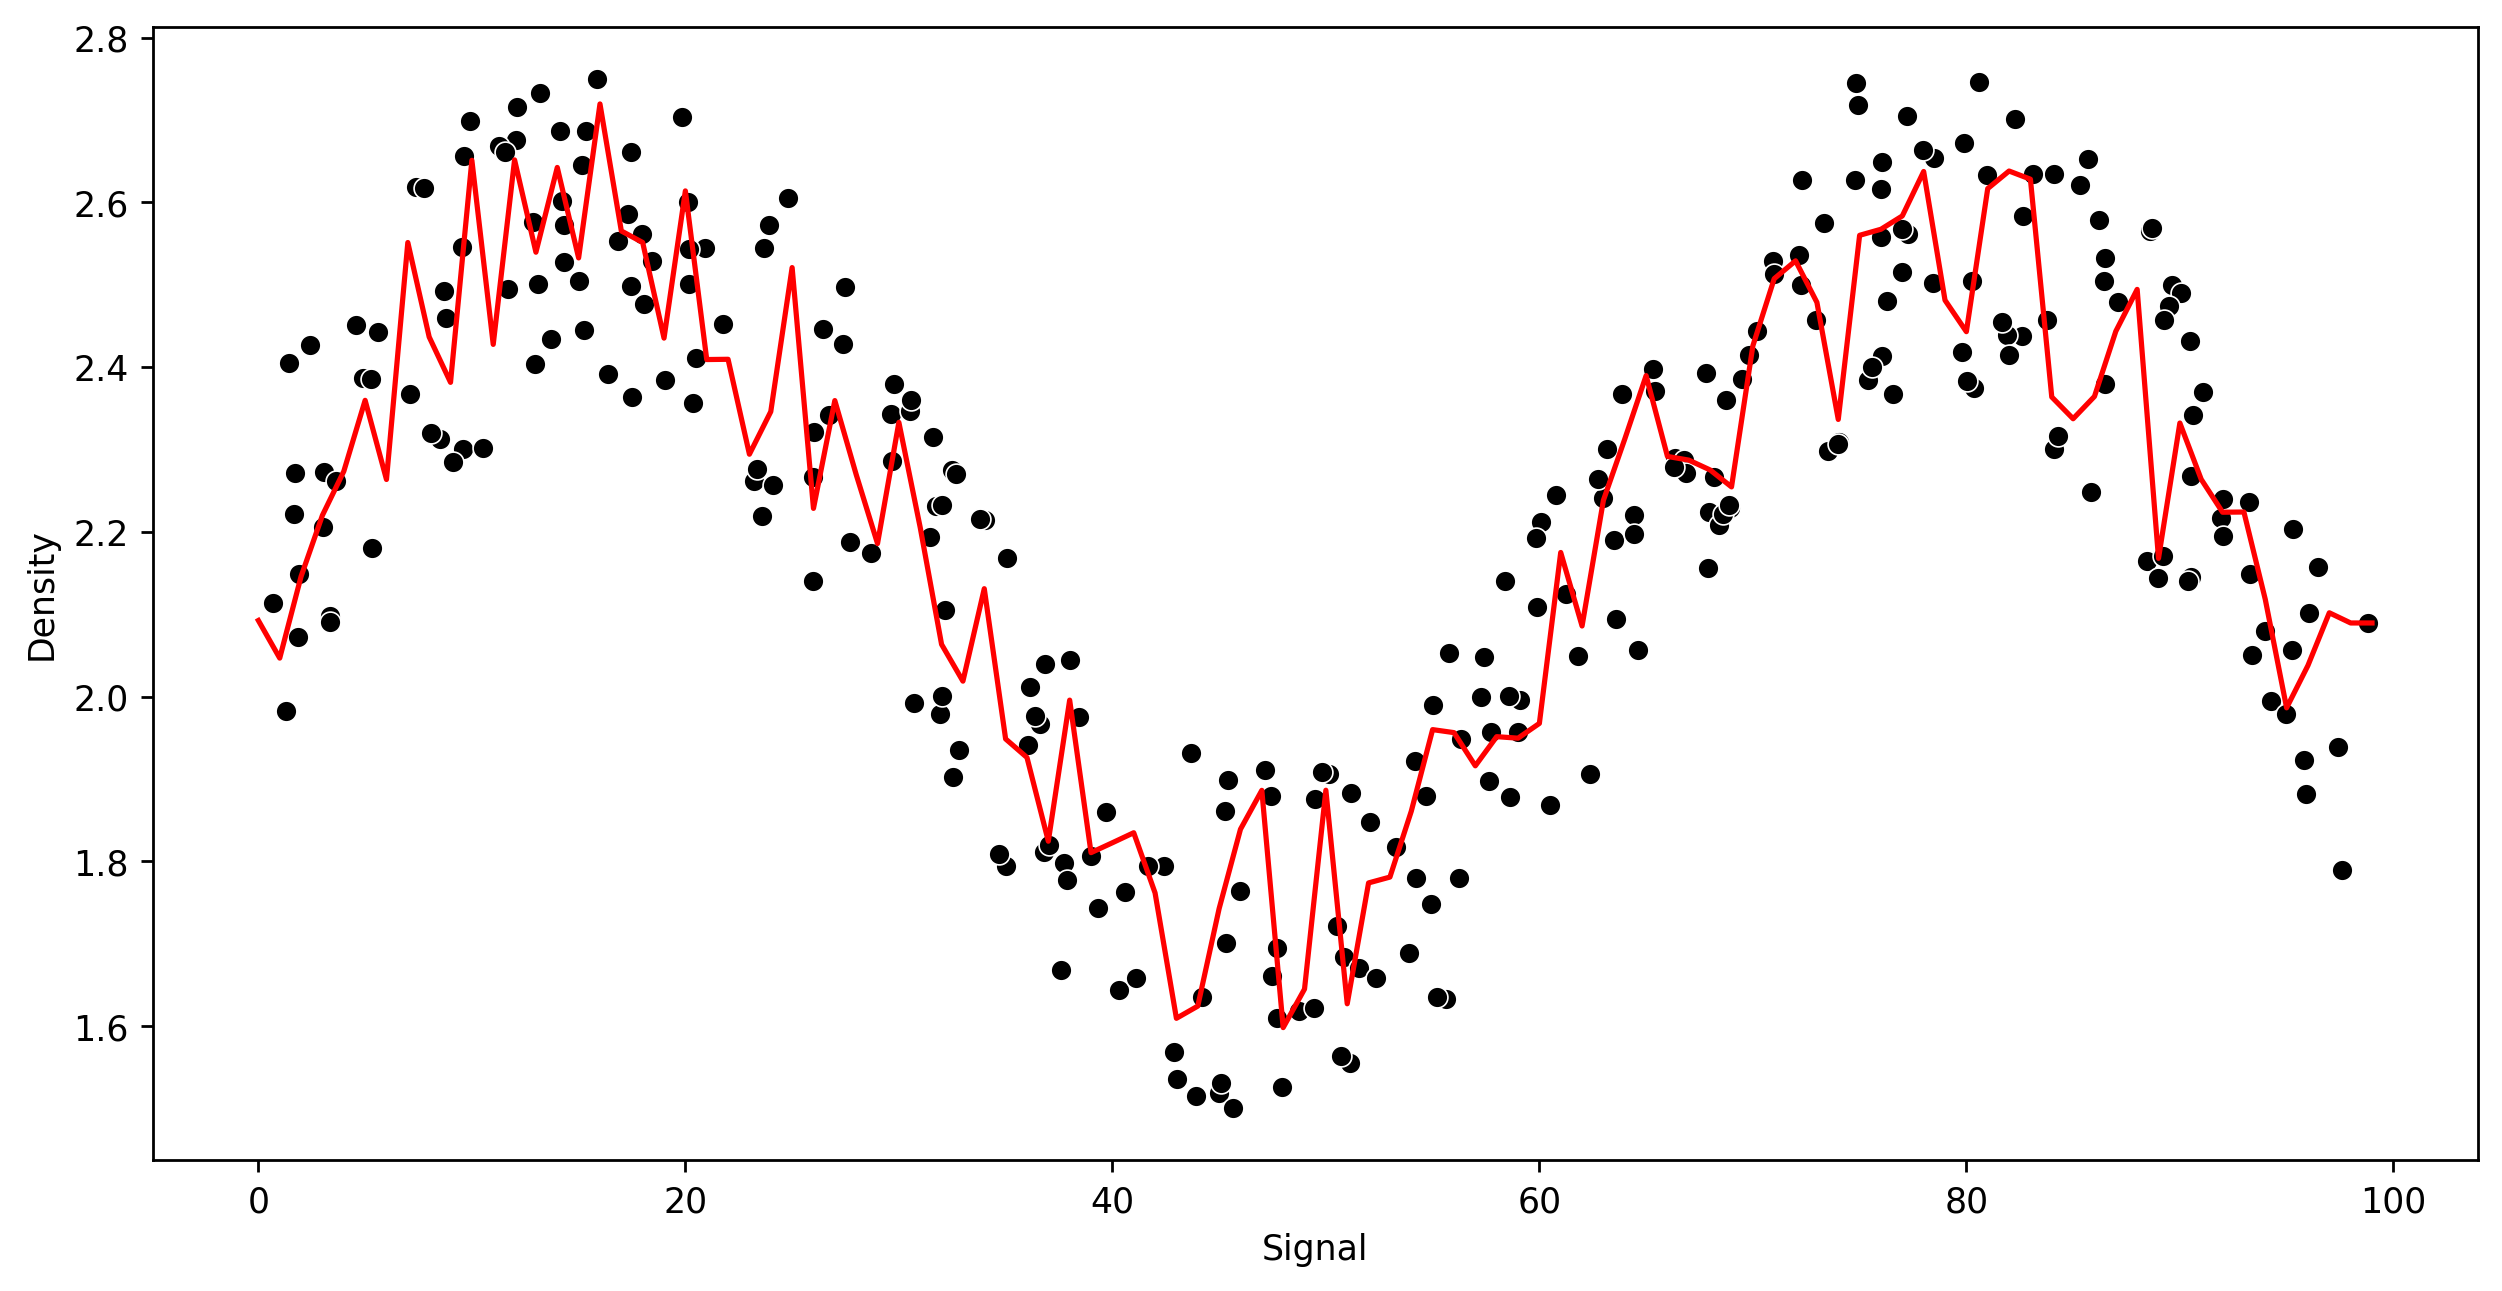

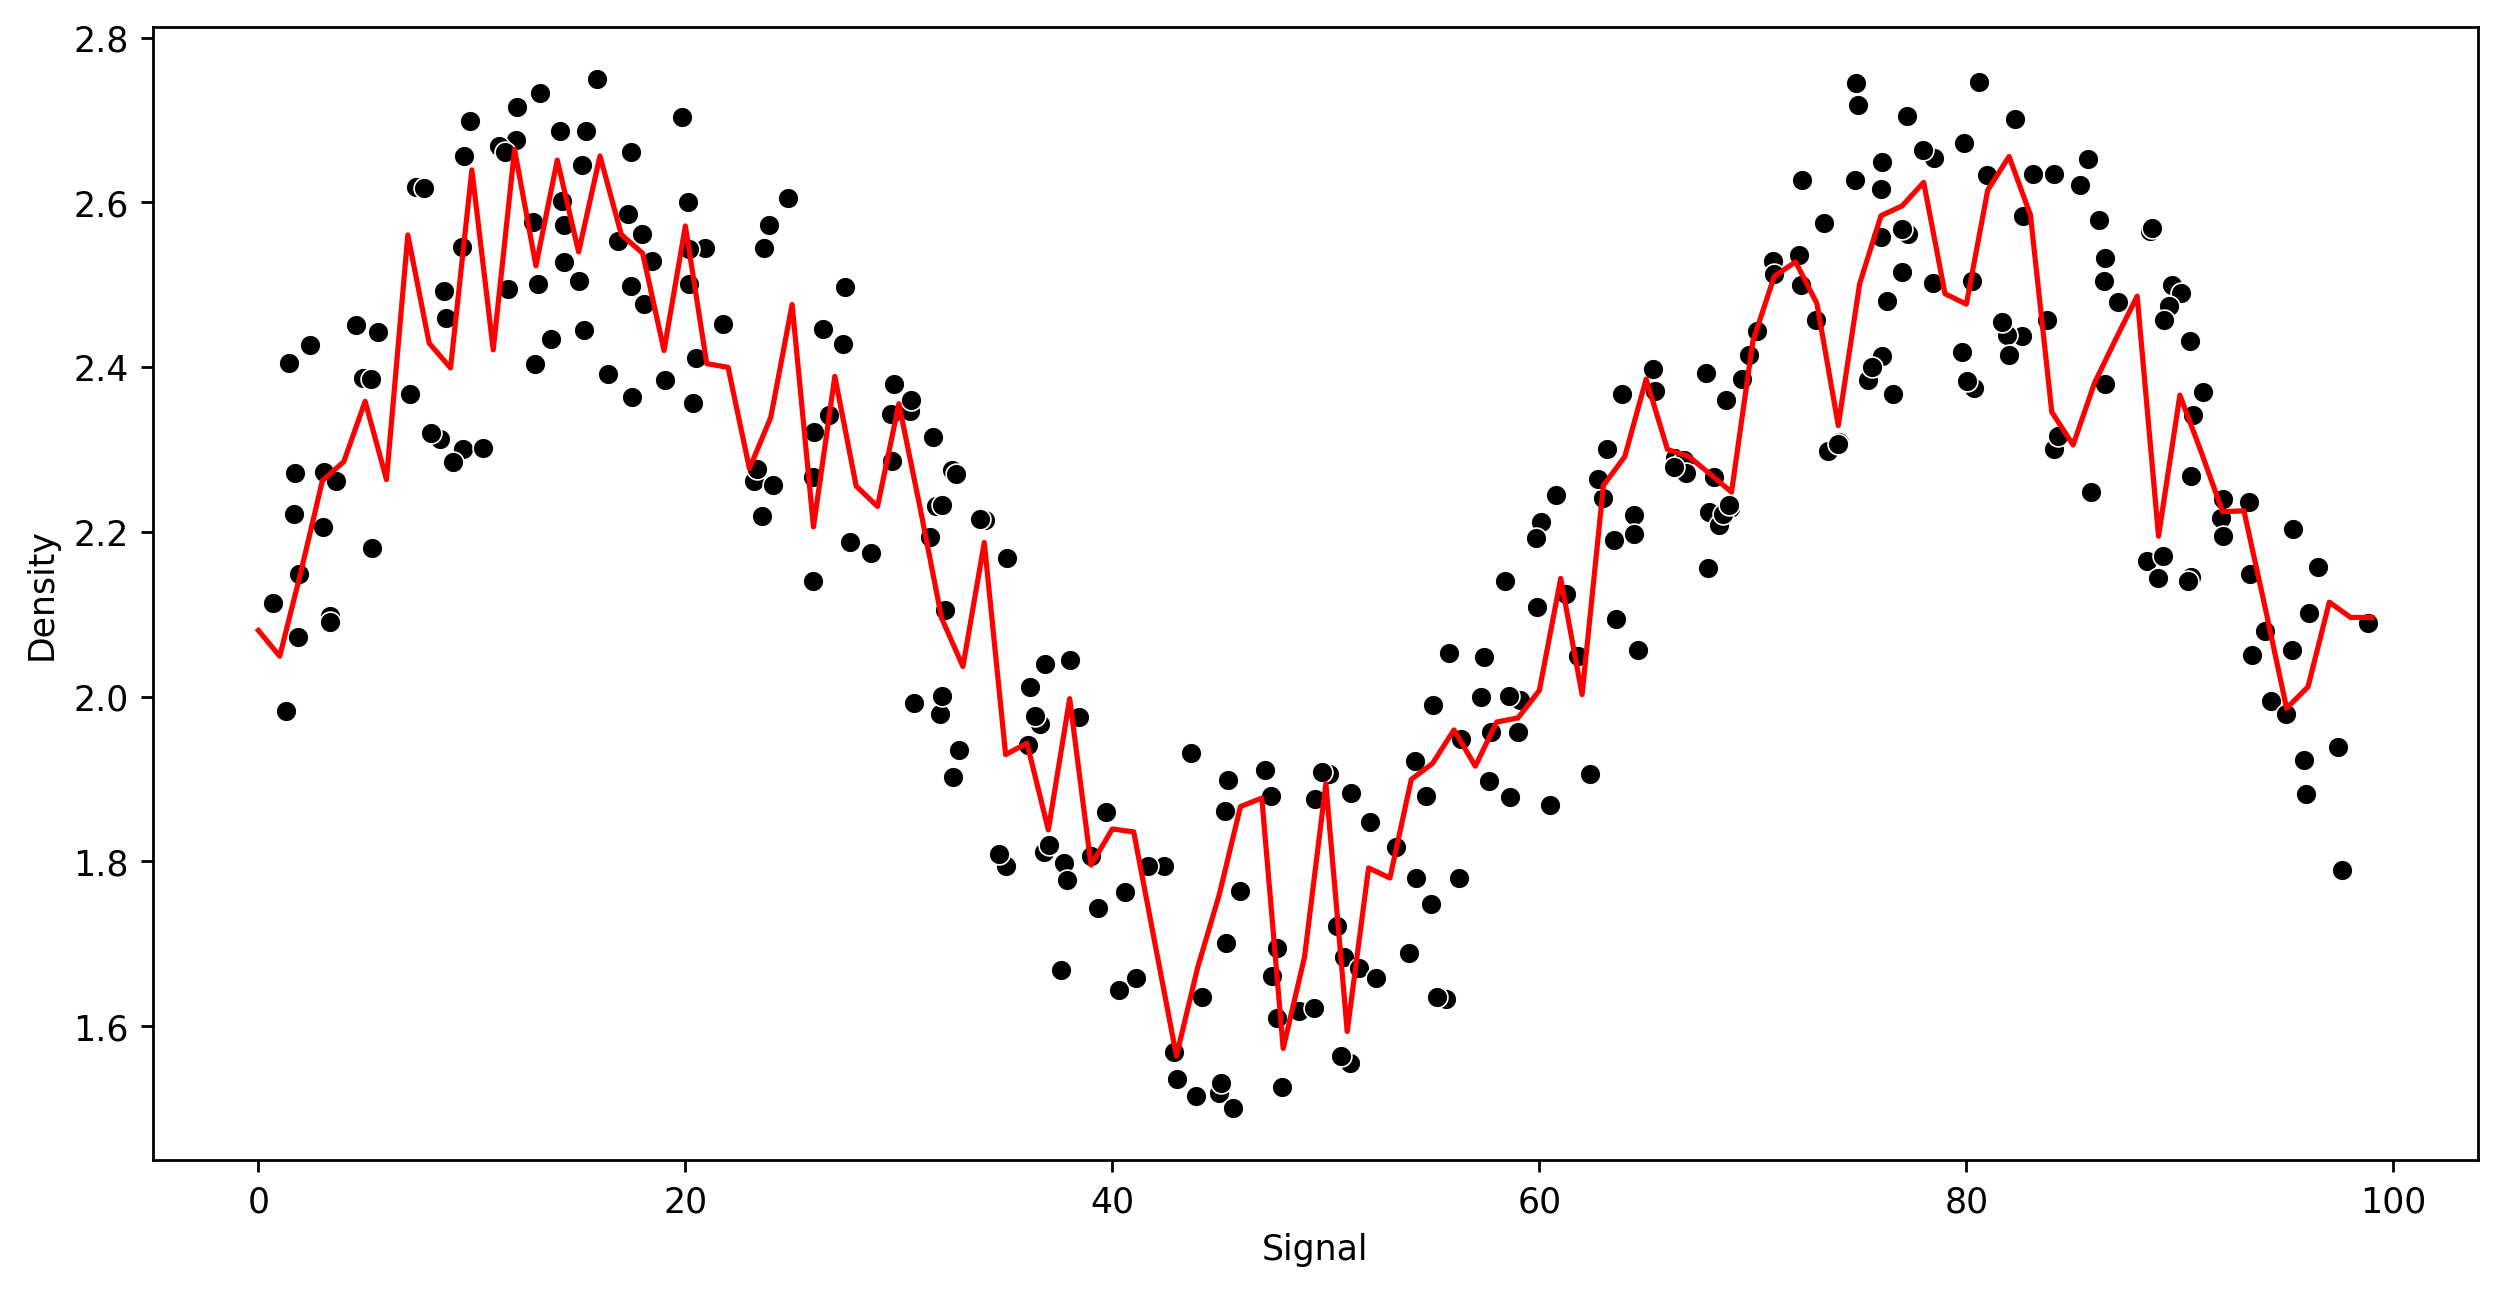

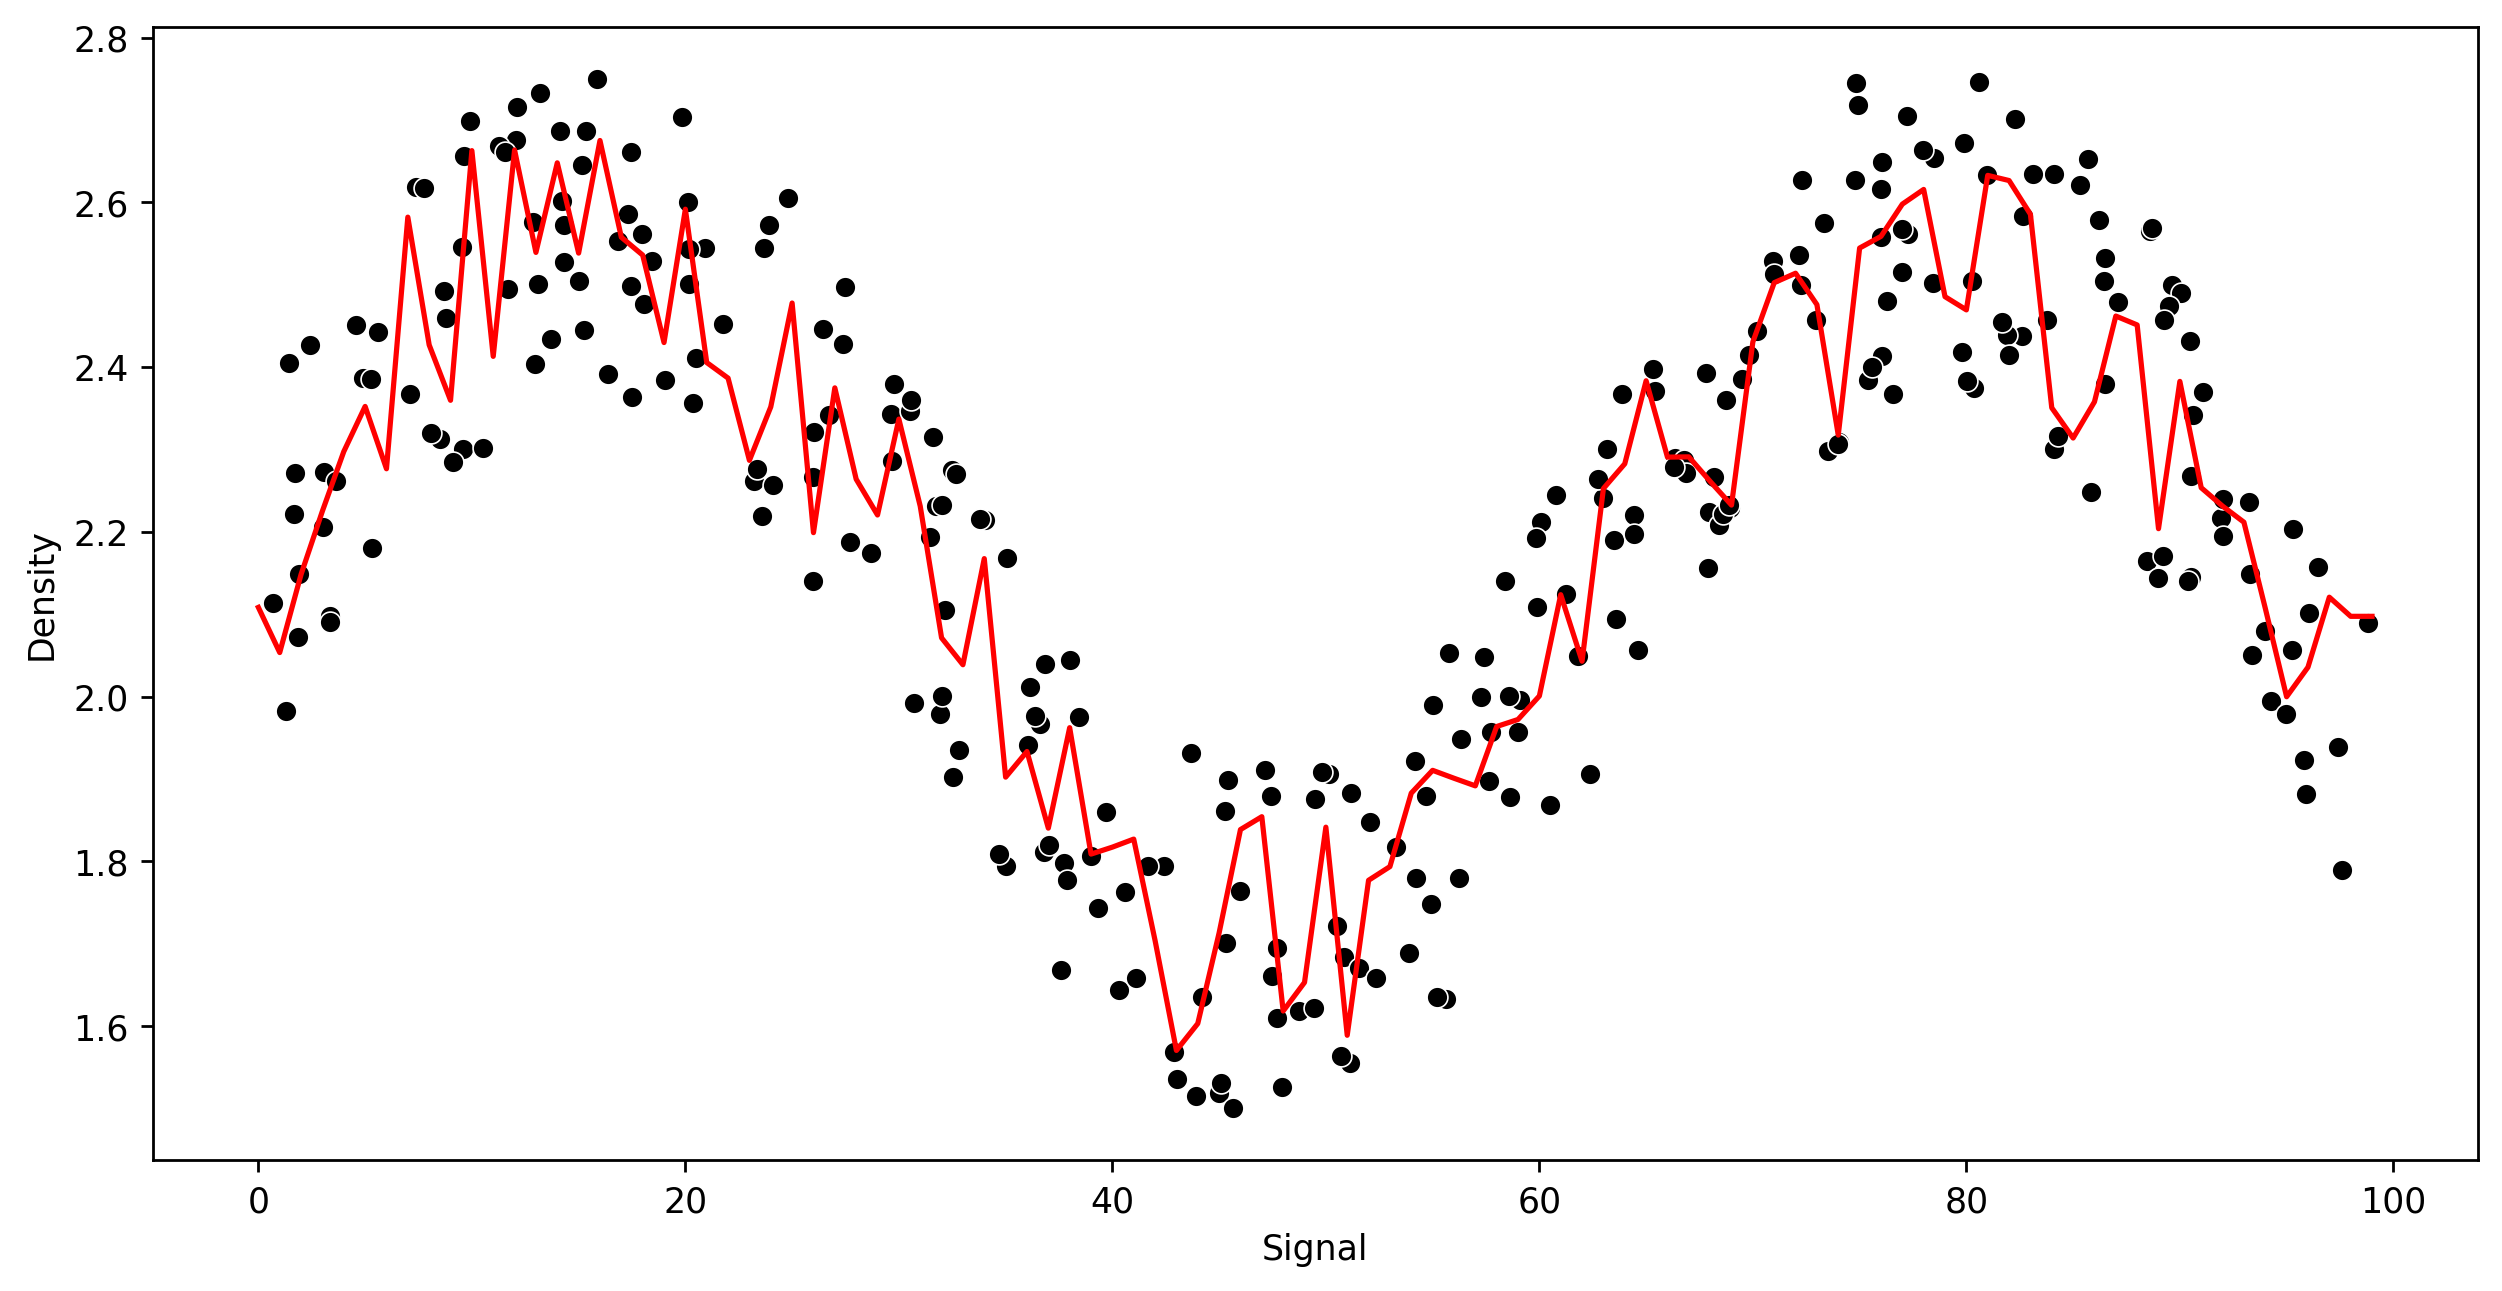

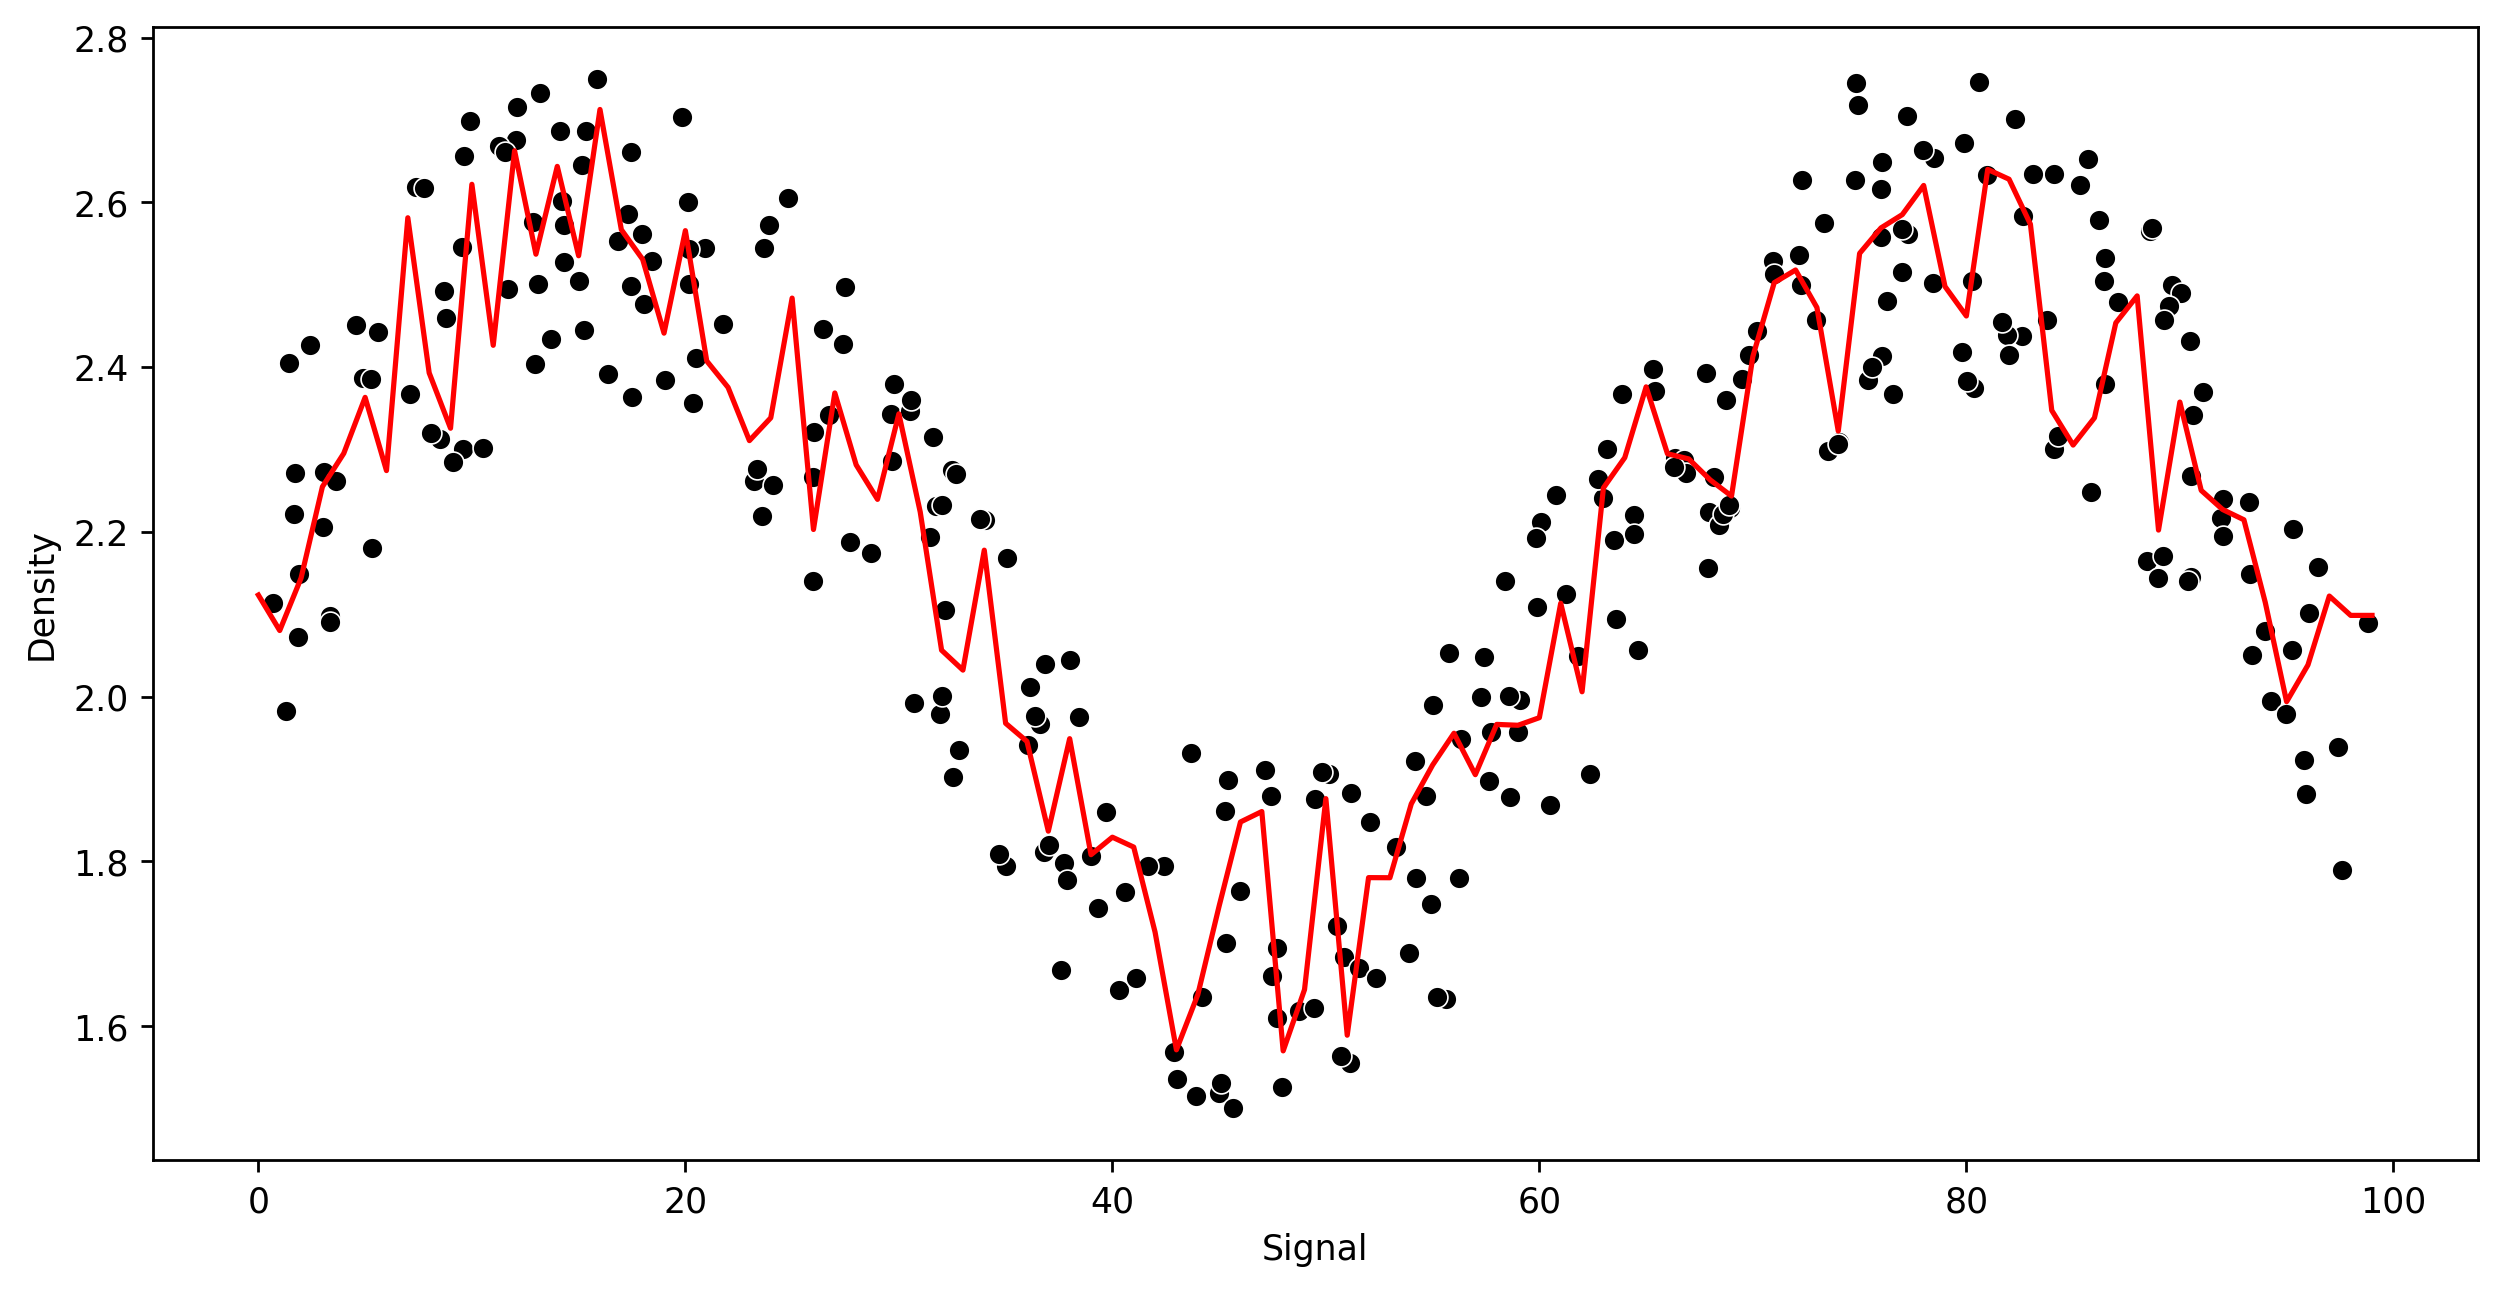

In [42]:
trees = [1,3,5,7,10,13,20,25,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

We will cover this in more detail in next section.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss 

MAE: 0.128786053426129
RMSE : 0.1552113624904825



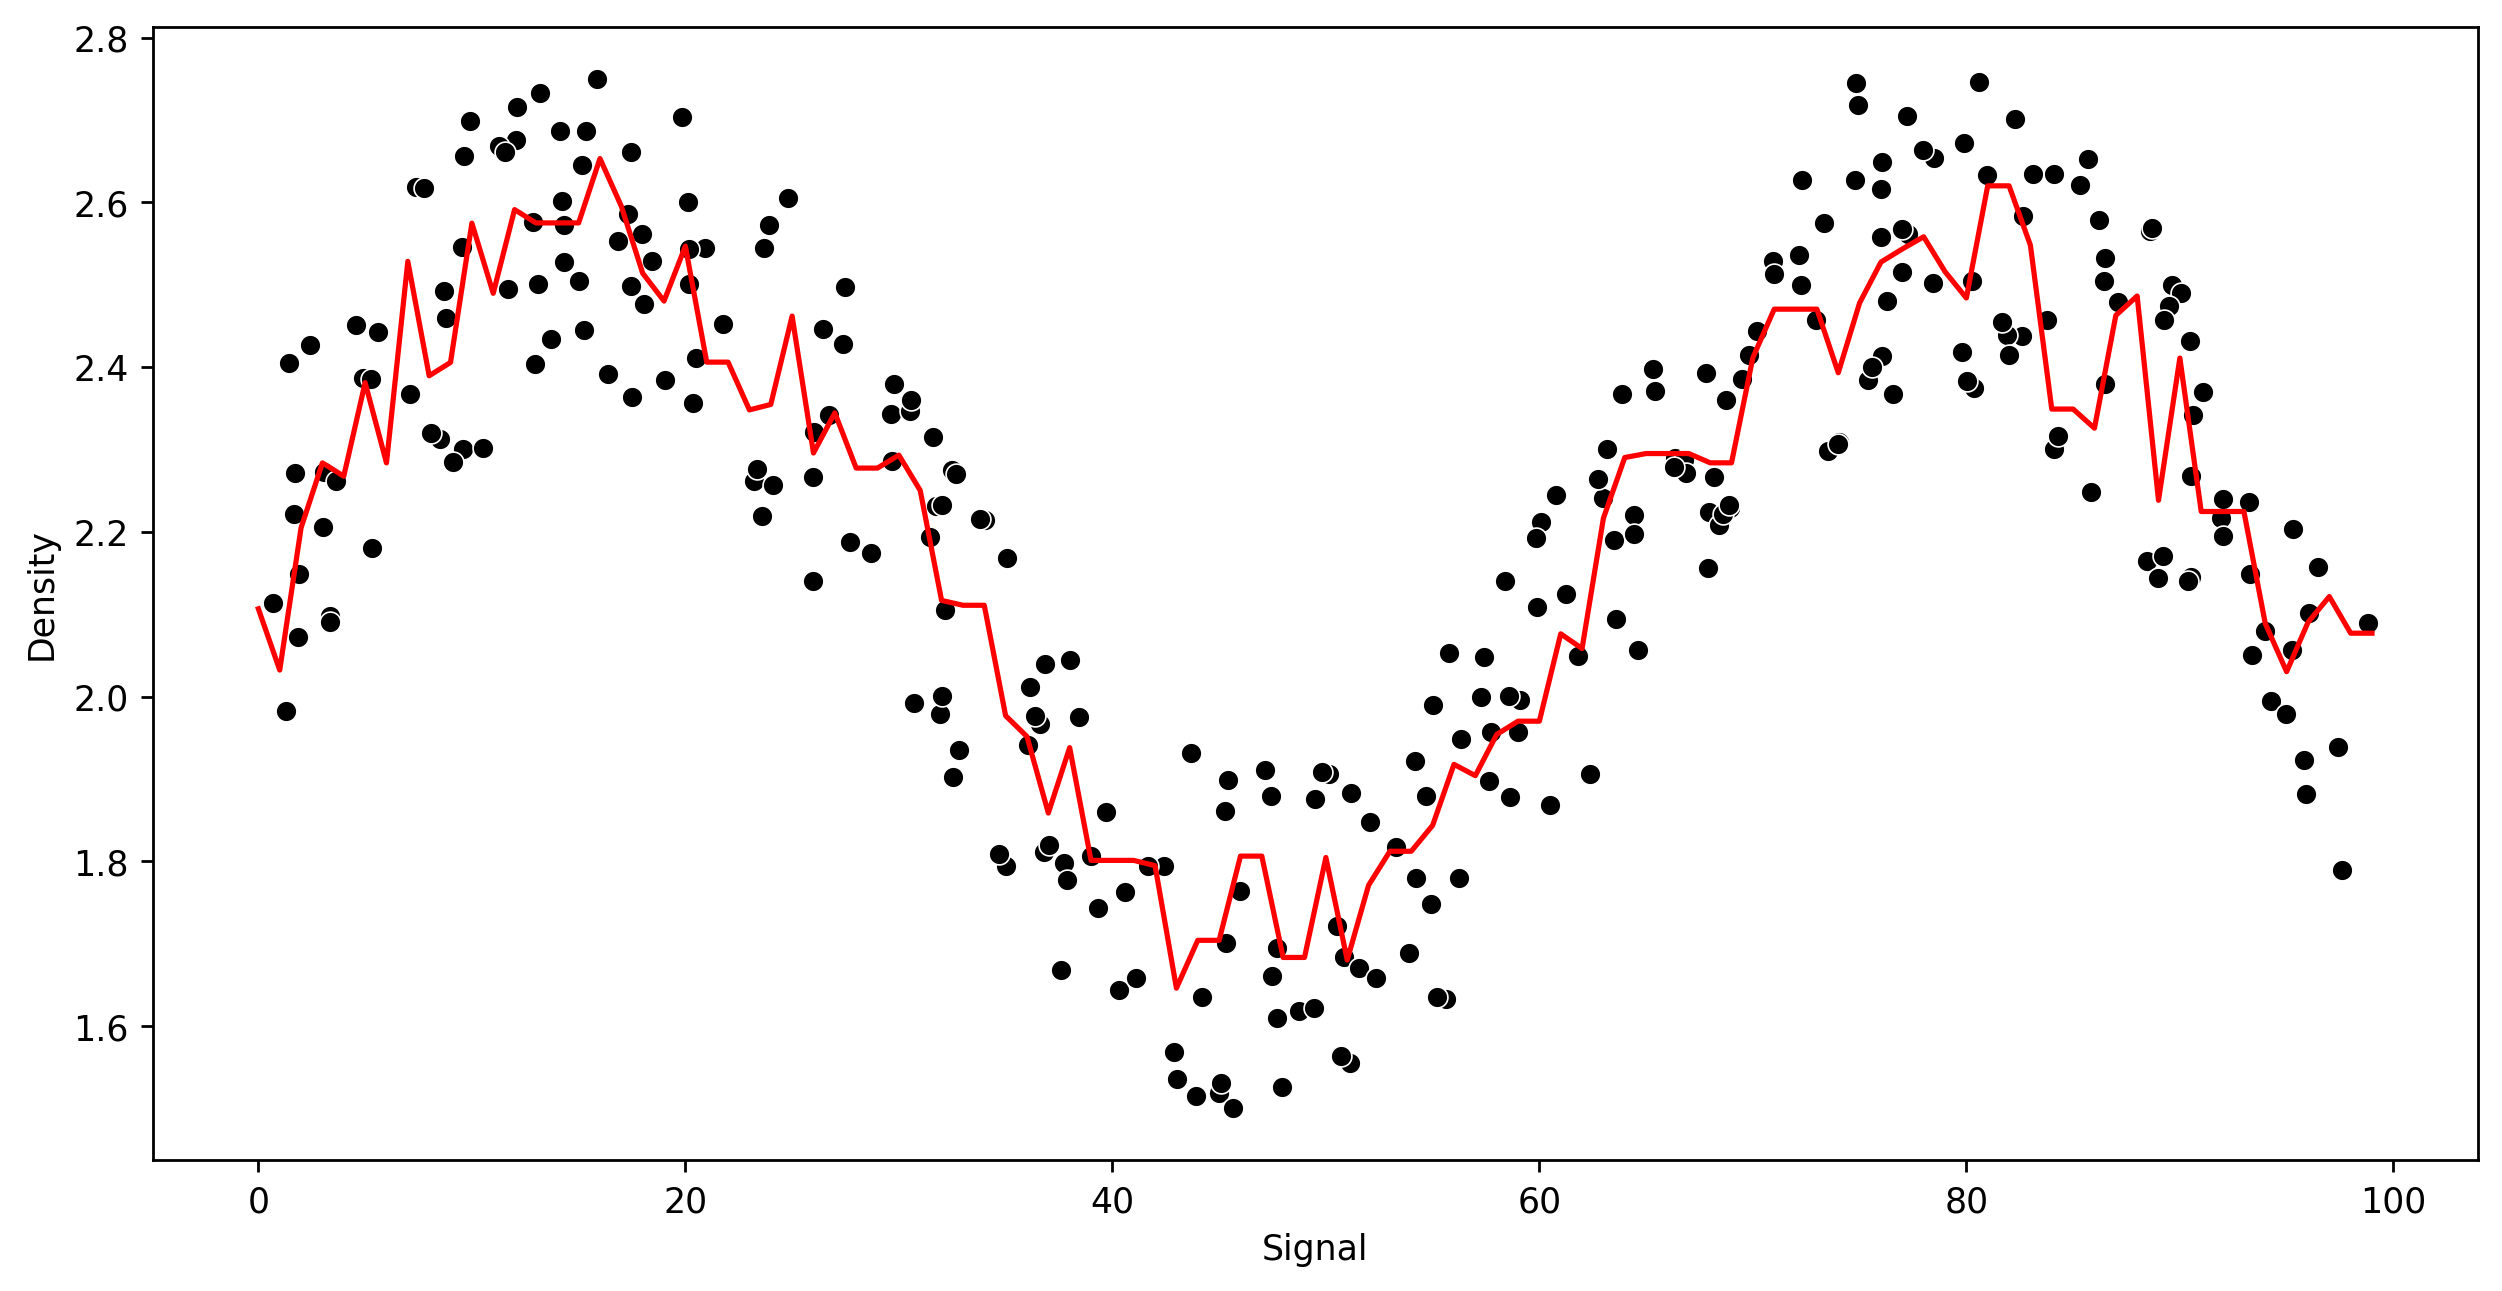

In [45]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [46]:
from sklearn.ensemble import AdaBoostRegressor

MAE: 0.12110765797408914
RMSE : 0.13997013028018082



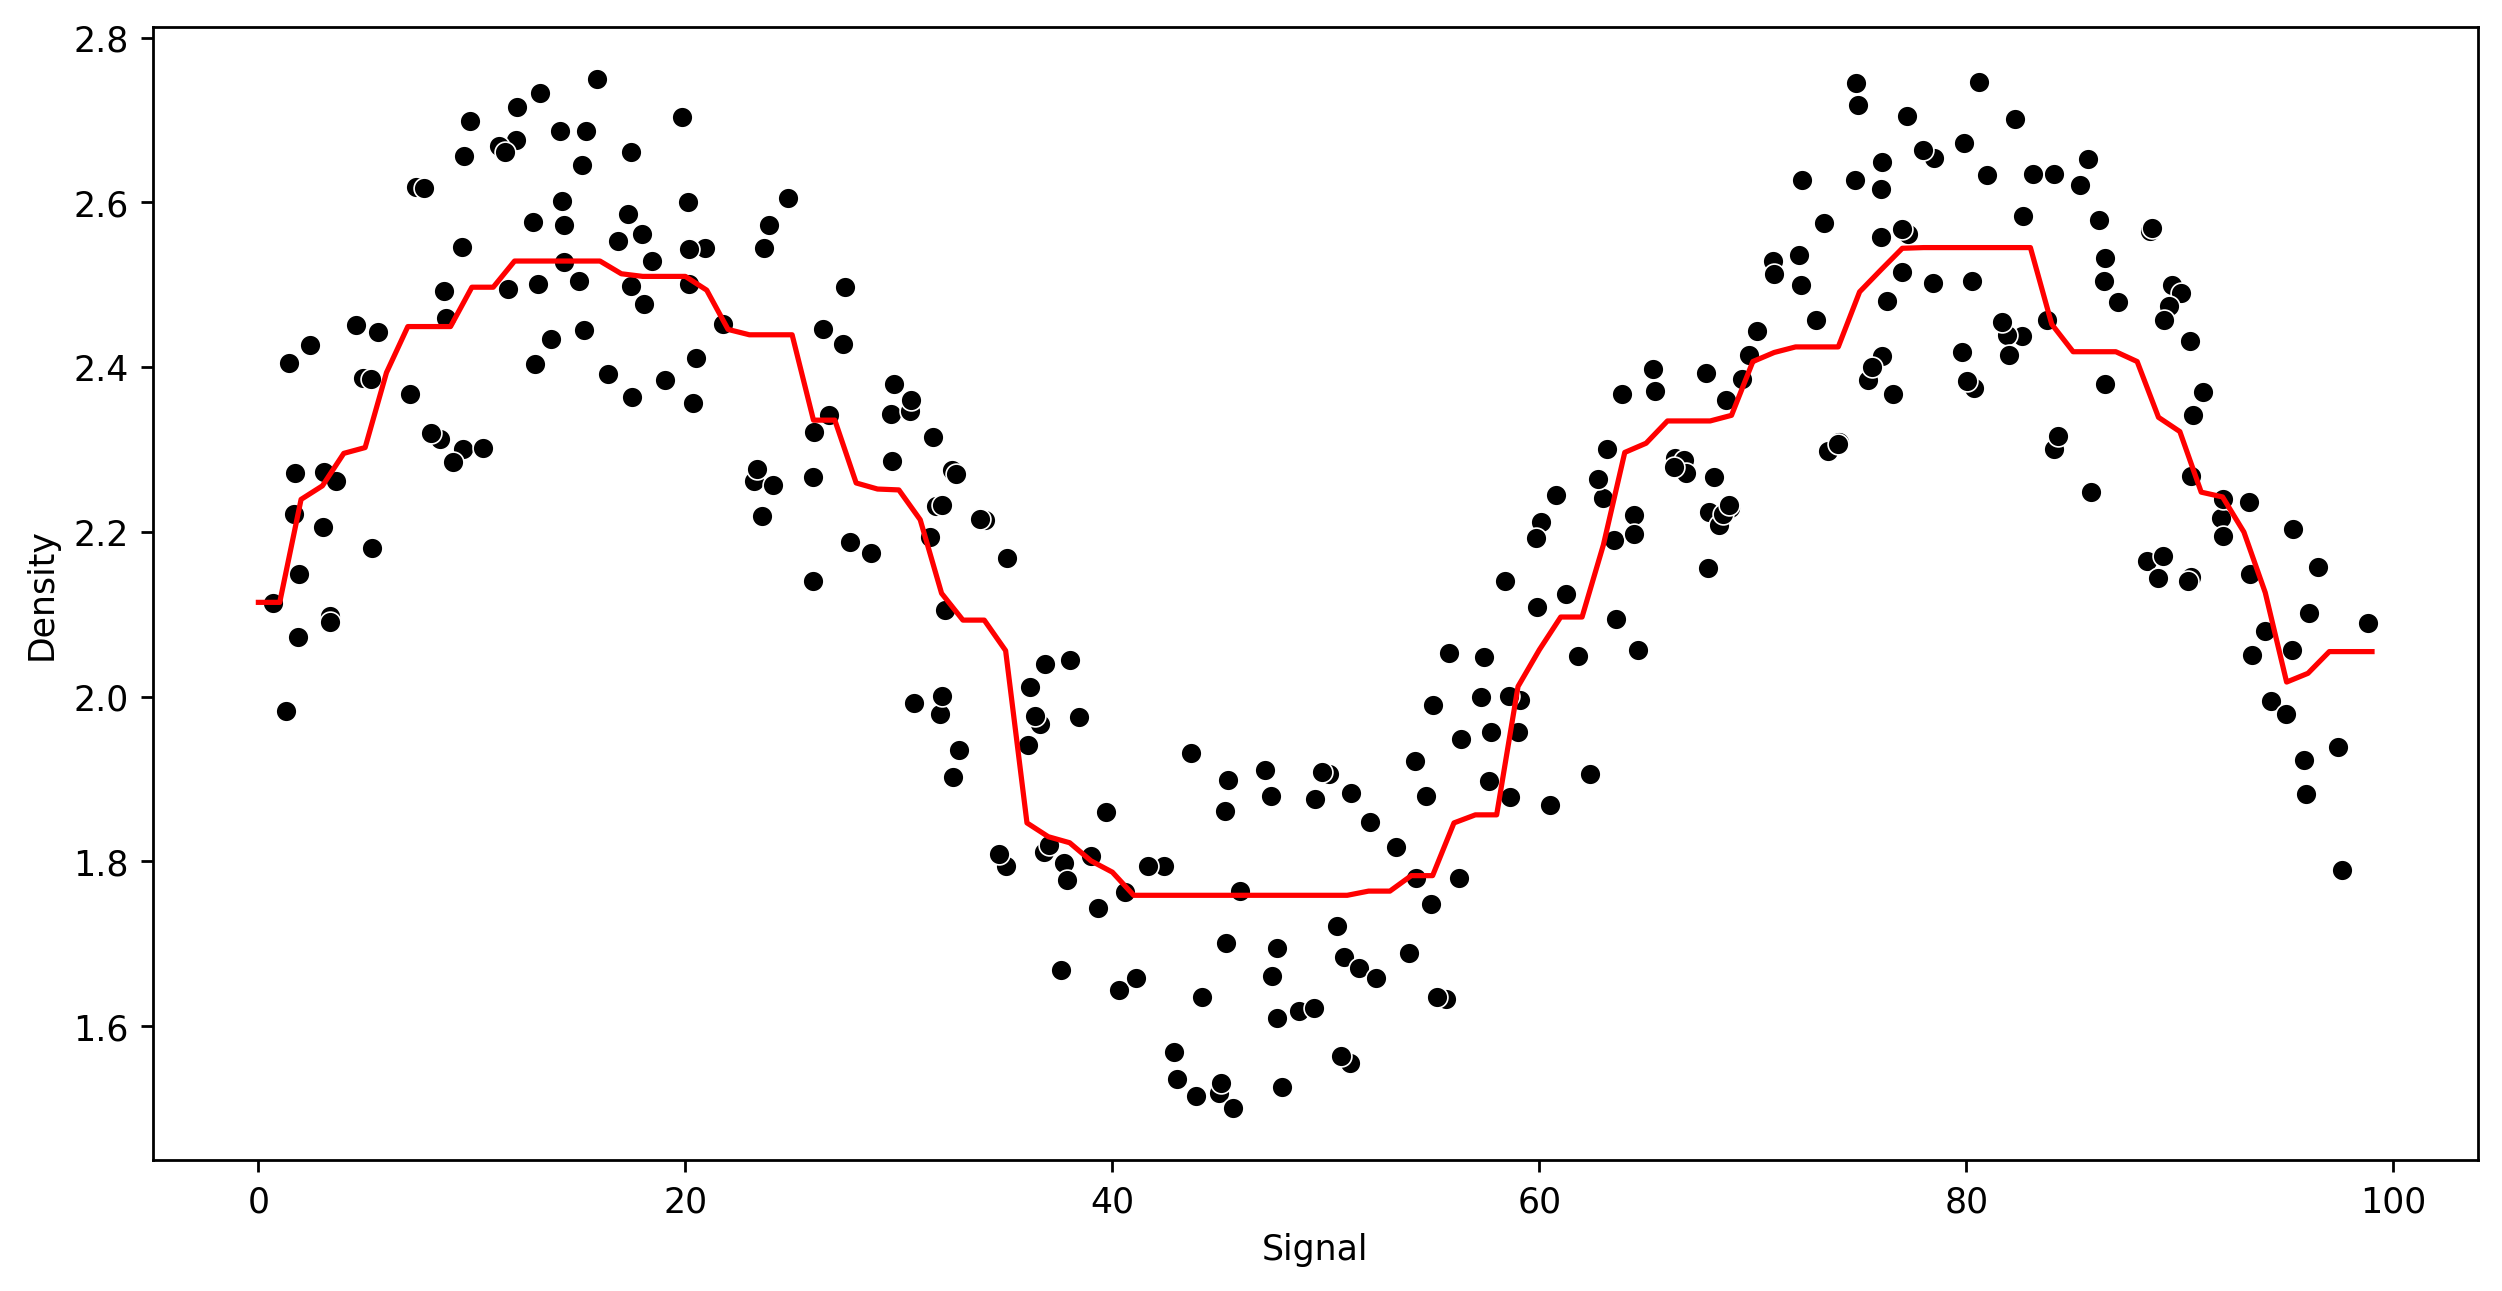

In [47]:
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)

----